In [1]:
import sys
# sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot4/lib/python3.7/site-packages')
# sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot/lib/python3.8/site-packages')
sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot-py39/lib/python3.9/site-packages')
print ( sys.path )

import numpy as np
import pandas as pd
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep
from matplotlib.colors import LogNorm
from joblib import dump, load
# plt.style.use(mplhep.style.CMS)
import matplotlib.font_manager
mpl.rcParams.update(
    {'font.size': 18,
     'font.family': 'sans-serif',
     'legend.fontsize': 14,
     'axes.labelsize': 18,
     'xtick.labelsize': 14,
     'ytick.labelsize': 14
    }
    )
# mpl.rcParams.update(
#     {'font.size': 18,
#      'font.family': 'sans-serif',
#      'font.sans-serif': ['Helvetica'],
#      'legend.fontsize': 14,
#      'axes.labelsize': 18,
#      'xtick.labelsize': 14,
#      'ytick.labelsize': 14
#     }
#     )
mpl.rcParams

['/eos/home-a/antoniov/SWAN_projects/env/uproot-py39/lib/python3.9/site-packages', '/cvmfs/sft.cern.ch/lcg/releases/condor/8.9.11-1f759/x86_64-centos7-gcc8-opt/lib/python3', '/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/itk', '/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/python', '/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib', '', '/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.6-b0f98/x86_64-centos7-gcc8-opt/lib/python39.zip', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.6-b0f98/x86_64-centos7-gcc8-opt/lib/python3.9', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.6-b0f98/x86_64-centos7-gcc8-opt/lib/python3.9/lib-dynload', '/eos/home-a/antoniov/SWAN_projects/env/uproot-py39/lib/python3.9/site-packages', '/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/IPython/exte

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [2]:
# run_ranges_periods, df_run_ranges, fiducial_cuts, fiducial_cuts_all, aperture_period_map, aperture_parametrisation, check_aperture, get_data, process_data_protons_multiRP
from processing import *

norm_to_1fb = True

# lepton_type = 'muon'
lepton_type = 'electron'

# data_sample = '2017'
data_sample = '2018'

save_figures = False

# run_tables = False

Welcome to JupyROOT 6.24/06
{'muon': {'2017B': 2.360904801, '2017C1': 5.313012839, '2017C2': 3.264135878, '2017D': 4.074723964, '2017E': 8.958810514, '2017F1': 1.708478656, '2017F2': 7.877903151, '2017F3': 3.632463163}, 'electron': {'2017B': 2.259685729466727, '2017C1': 5.070112518026598, '2017C2': 3.114906113929596, '2017D': 3.8868791892596004, '2017E': 8.568260128452684, '2017F1': 1.629432474022848, '2017F2': 7.513416205912684, '2017F3': 3.4643999898374793}}
Luminosity 2017 muon: 37.190432966
Luminosity 2017 electron: 35.507092348908216
{'muon': {'2018A': 12.0989473, '2018B1': 6.37152736, '2018B2': 0.3994688, '2018C': 6.5296412326999995, '2018D1': 19.858430199999997, '2018D2': 10.404398965499999}, 'electron': {'2018A': 11.290304299999999, '2018B1': 6.37985326, '2018B2': 0.39999080000000004, '2018C': 6.529556346600001, '2018D1': 19.86785332, '2018D2': 10.409336007299999}}
Luminosity 2018 muon: 55.662413858200004
Luminosity 2018 electron: 54.8768940339


### Event selection

In [3]:
def select_events( df_events, lepton_type, max_num_tracks = 4, label_jet=None, label_muon=None, label_electron=None ):

    max_num_tracks_ = max_num_tracks
    
#     label_jet_ = "_nom"
#     label_muon_ = "_nom"
#     label_WLep_ = "_nom"
#     label_WW_ = "_nom"
    label_jet_ = "_nom"
    if label_jet is not None: label_jet_ = label_jet
        
    label_muon_ = "_nom"
    if label_muon is not None: label_muon_ = label_muon
        
    label_electron_ = "_nom"
    if label_electron is not None: label_electron_ = label_electron
        
    label_WLep_ = "_nom"
    if label_muon is not None:
        label_WLep_ = label_muon
    elif label_electron is not None:
        label_WLep_ = label_electron
        
    label_WW_ = "_nom"
    if label_jet is not None:
        label_WW_ = label_jet
    elif label_muon is not None:
        label_WW_ = label_muon
    elif label_electron is not None:
        label_WW_ = label_electron
        
    label_xiCMS_ = "_nom"
    if label_jet is not None:
        label_xiCMS_ = label_jet
    elif label_muon is not None:
        label_xiCMS_ = label_muon
    elif label_electron is not None:
        label_xiCMS_ = label_electron
    
    lepton_var_phi_ = ""
    lepton_var_eta_ = ""
    if lepton_type == 'muon':
        lepton_var_phi_ = "muon0_phi"
        lepton_var_eta_ = "muon0_eta"
    elif lepton_type == 'electron':
        lepton_var_phi_ = "electron0_phi"
        lepton_var_eta_ = "electron0_eta"
        
    deltaPhi_jet_lep_ = ( df_events.loc[ :, "jet0_phi"] - df_events.loc[ :, lepton_var_phi_ ] )
    msk_dphi_ = ( deltaPhi_jet_lep_ < -np.pi )
    deltaPhi_jet_lep_.loc[ msk_dphi_ ] = deltaPhi_jet_lep_.loc[ msk_dphi_ ] + 2*np.pi
    msk_dphi_ = ( deltaPhi_jet_lep_ >= np.pi )
    deltaPhi_jet_lep_.loc[ msk_dphi_ ] = deltaPhi_jet_lep_.loc[ msk_dphi_ ] - 2*np.pi
    
    deltaEta_jet_lep_ = ( df_events.loc[ :, "jet0_eta"] - df_events.loc[ :, lepton_var_eta_ ] )
    deltaR_jet_lep_ = np.sqrt( ( deltaPhi_jet_lep_ ) ** 2 + ( deltaEta_jet_lep_ ) ** 2 )
    
    deltaPhi_jet_met_ = ( df_events.loc[ :, "jet0_phi"] - df_events.loc[ :, "met_phi"] )
    msk_dphi_ = ( deltaPhi_jet_met_ < -np.pi )
    deltaPhi_jet_met_.loc[ msk_dphi_ ] = deltaPhi_jet_met_.loc[ msk_dphi_ ] + 2*np.pi
    msk_dphi_ = ( deltaPhi_jet_met_ >= np.pi )
    deltaPhi_jet_met_.loc[ msk_dphi_ ] = deltaPhi_jet_met_.loc[ msk_dphi_ ] - 2*np.pi
    
    deltaPhi_jet_Wlep_ = ( df_events.loc[ :, "jet0_phi"] - df_events.loc[ :, "WLeptonicPhi"] )
    msk_dphi_ = ( deltaPhi_jet_Wlep_ < -np.pi )
    deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] = deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] + 2*np.pi
    msk_dphi_ = ( deltaPhi_jet_Wlep_ >= np.pi )
    deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] = deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] - 2*np.pi

    jet0_tau21_ = ( df_events.loc[ :, "jet0_tau2"] / df_events.loc[ :, "jet0_tau1"] )

    msk_All_ = np.full( df_events.shape[0], True, dtype=bool )
    
    msk_lep_ = None
    if lepton_type == 'muon':
        msk_lep_ = ( ( df_events.loc[ :, "muon0_pt" + label_muon_ ] >= 50.0 ) &
                     ( np.abs( df_events.loc[ :, "muon0_eta"] ) <= 2.4 ) & 
                     ( df_events.loc[ :, "muon0_iso"] <= 0.10 ) )
    elif lepton_type == 'electron':
        msk_lep_ = ( ( df_events.loc[ :, "electron0_pt" + label_electron_ ] >= 50.0 ) &
                     ( np.abs( df_events.loc[ :, "electron0_eta"] ) <= 2.4 ) )
        
#     msk_jet_ = ( ( df_events.loc[ :, "jet0_pt" + label_jet_] >= 200.0 ) &
#                  ( np.abs( df_events.loc[ :, "jet0_eta"] ) <= 2.4 ) )
    msk_jet_ = ( ( df_events.loc[ :, "jet0_pt" + label_jet_] >= 220.0 ) &
                 ( np.abs( df_events.loc[ :, "jet0_eta"] ) <= 2.4 ) )
    
    msk_jet_lep_ = ( deltaR_jet_lep_ >= np.pi/2 )
    
    msk_met_ = ( df_events.loc[ :, "met"] >= 40.0 )
    
    msk_jet_met_ = ( np.abs( deltaPhi_jet_met_ ) >= 2.0 )
    
    msk_pruned_mass_ = ( ( df_events.loc[ :, "jet0_corrmass" + label_jet_] >= 50.0 ) &
                         ( df_events.loc[ :, "jet0_corrmass" + label_jet_] <= 110.0 ) )
    
    msk_tau21_       = ( jet0_tau21_ <= 0.60 )
    
    msk_bjet_veto_   = ( df_events.loc[ :, "num_bjets_ak4"] == 0 )
    
#     msk_xiCMS_ = msk_All_.copy()
    msk_xiCMS_       = ( ( df_events.loc[ :, "xiCMS_45" + label_xiCMS_ ] <= 0.20 ) & ( df_events.loc[ :, "xiCMS_56" + label_xiCMS_ ] <= 0.20 ) )
    
    msk_Wlep_ = ( df_events.loc[ :, "WLeptonicPt" + label_WLep_ ] >= 200.0 )
    
    msk_jet_Wlep_ = ( np.abs( deltaPhi_jet_Wlep_ ) >= 2.5 )
    
#     msk_MWW_ = ( df_events.loc[ :, "recoMWW"] >= 500.0 )
    msk_MWW_ = ( df_events.loc[ :, "MWW" + label_WW_ ] >= 500.0 )
    
    msk_extra_tracks_ = ( df_events.loc[ :, "pfcand_nextracks" ] <= max_num_tracks_ )
#     msk_extra_tracks_ = ( df_events.loc[ :, "pfcand_nextracks" ] <= 999 )
    
    masks_ = [ msk_All_, msk_lep_, msk_jet_, msk_jet_lep_, msk_met_, msk_jet_met_,
               msk_pruned_mass_, msk_tau21_, msk_bjet_veto_, msk_xiCMS_,
               msk_Wlep_, msk_jet_Wlep_, msk_MWW_, msk_extra_tracks_ ]
    
    lepton_sel_name_ = ""
    jet_lepton_sel_name_ = ""
    if lepton_type == 'muon':
        lepton_sel_name_ = "Muon"
        jet_lepton_sel_name_ = "Jet_Muon"
    elif lepton_type == 'electron':
        lepton_sel_name_ = "Electron"
        jet_lepton_sel_name_ = "Jet_Electron"
        
    selection_keys_ = [ "All", lepton_sel_name_, "Jet", jet_lepton_sel_name_, "MET", "Jet_MET",
                        "PrunedMass", "Tau21", "BJet_Veto", "Xi_CMS",
                        "WLeptonic", "Jet_WLeptonic", "MWW", "ExtraTracks" ]
    
    selections_ = {}
    msk_ = masks_[ 0 ].copy()
    for idx_, key_ in enumerate( selection_keys_ ):
        msk_ = msk_ & masks_[ idx_ ]
        selections_[ key_ ] = np.sum( msk_ )
        
    df_events = df_events.loc[ msk_ ]
    
    return df_events, selection_keys_, selections_

### Signal

In [4]:
load_signal = True

labels_signals = []
if data_sample == '2017':
    if lepton_type == 'muon':
#         labels_signals = [ "GGToWW-AQGC-A0W1e-6", "GGToWW-AQGC-A0W2e-6", "GGToWW-AQGC-A0W5e-6" ]
#         labels_signals = [ "GGToWW-AQGC-muon-A0W1e-6", "GGToWW-AQGC-muon-A0W2e-6", "GGToWW-AQGC-muon-A0W5e-6" ]
        labels_signals = [ "GGToWW-AQGC-2017-muon-A0W1e-6", "GGToWW-AQGC-2017-muon-A0W2e-6", "GGToWW-AQGC-2017-muon-A0W5e-6" ]
    elif lepton_type == 'electron':
#         labels_signals = [ "GGToWW-AQGC-electron-A0W1e-6", "GGToWW-AQGC-electron-A0W2e-6", "GGToWW-AQGC-electron-A0W5e-6" ]
        labels_signals = [ "GGToWW-AQGC-2017-electron-A0W1e-6", "GGToWW-AQGC-2017-electron-A0W2e-6", "GGToWW-AQGC-2017-electron-A0W5e-6" ]
elif data_sample == '2018':
    if lepton_type == 'muon':
        labels_signals = [ "GGToWW-AQGC-2018-muon-A0W5e-7", "GGToWW-AQGC-2018-muon-A0W1e-6", "GGToWW-AQGC-2018-muon-A0W2e-6", "GGToWW-AQGC-2018-muon-A0W5e-6" ]
    elif lepton_type == 'electron':
        labels_signals = [ "GGToWW-AQGC-2018-electron-A0W5e-7", "GGToWW-AQGC-2018-electron-A0W1e-6", "GGToWW-AQGC-2018-electron-A0W2e-6", "GGToWW-AQGC-2018-electron-A0W5e-6" ]
    
df_counts_signals = {}
df_signals_protons_multiRP_index = {}
df_signals_protons_multiRP_events = {}
if load_signal:
    base_path_ = "output"
    for label_ in labels_signals:
        print ( label_ )
        file_path_ = "{}/data-store-{}.h5".format( base_path_, label_ )
        with pd.HDFStore( file_path_, 'r' ) as store_:
            print ( list( store_ ) )
            df_counts_signals[ label_ ] = store_[ "counts" ]
            df_signals_protons_multiRP_index[ label_ ] = store_[ "protons_multiRP" ]
            df_signals_protons_multiRP_events[ label_ ] = store_[ "events_multiRP" ]

GGToWW-AQGC-2018-electron-A0W5e-7
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-2018-electron-A0W1e-6
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-2018-electron-A0W2e-6
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-2018-electron-A0W5e-6
['/counts', '/events_multiRP', '/protons_multiRP']


In [5]:
# df_signals_protons_multiRP_events[ 'GGToWW-AQGC-2017-muon-A0W1e-6' ]
# df_signals_protons_multiRP_index[ 'GGToWW-AQGC-2018-muon-A0W1e-6' ].columns.values
# df_signals_protons_multiRP_index[ 'GGToWW-AQGC-2018-muon-A0W1e-6' ][ ['pileupWeight','xi','random','arm','ismultirp', 'eff_proton_all'] ]
# df_signals_protons_multiRP_events[ 'GGToWW-AQGC-2018-muon-A0W1e-6' ]
# df_signals_protons_multiRP_events[ 'GGToWW-AQGC-2018-electron-A0W5e-7' ]
label_ref_ = ""
if data_sample == '2017':
    if lepton_type == 'muon':
        label_ref_ = 'GGToWW-AQGC-2017-muon-A0W2e-6'
    elif lepton_type == 'electron':
        label_ref_ = 'GGToWW-AQGC-2017-electron-A0W2e-6'
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ref_ = 'GGToWW-AQGC-2018-muon-A0W1e-6'
    elif lepton_type == 'electron':
        label_ref_ = 'GGToWW-AQGC-2018-electron-A0W1e-6'
df_signals_protons_multiRP_events[ label_ref_ ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   1         1     2566174816238114850  0              155.0       0.4   
                    1944802588617703528  0              155.0       0.4   
    2         2     16211655903997137111 0              155.0       0.4   
    3         3     12272419502714003563 0              160.0       0.4   
    4         4     10525686656389309447 0              156.0       0.4   
...                                                       ...       ...   
    991       991   18396100130215887947 0              130.0       0.4   
    993       993   4022135500799956084  0              143.0       0.4   
    995       995   4475311302969195420  0              160.0       0.4   
    996       996   12874365531286025719 0              145.0       0.4   
                    709149413564031240   0              145.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   1         1     2566174816238114850  0           0.0  557.665649   
                    1944802588617703528  0           0.0  664.139893   
    2         2     16211655903997137111 0           0.0  586.168335   
    3         3     12272419502714003563 0           0.0  323.199982   
    4         4     10525686656389309447 0           0.0  243.359894   
...                                                  ...         ...   
    991       991   18396100130215887947 0           0.0  386.887421   
    993       993   4022135500799956084  0           0.0  308.792084   
    995       995   4475311302969195420  0           0.0  716.522705   
    996       996   12874365531286025719 0           0.0  295.174988   
                    709149413564031240   0           0.0  213.783875   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   1         1     2566174816238114850  0      0.479938  2.984254   
                    1944802588617703528  0      0.370909  2.205878   
    2         2     16211655903997137111 0     -0.356795 -1.623391   
    3         3     12272419502714003563 0      0.870364 -1.353606   
    4         4     10525686656389309447 0     -1.667660  0.683213   
...                                                  ...       ...   
    991       991   18396100130215887947 0     -0.492888 -1.461359   
    993       993   4022135500799956084  0      0.971209 -1.952721   
    995       995   4475311302969195420  0     -0.050619  0.522885   
    996       996   12874365531286025719 0     -1.162811  3.122458   
                    709149413564031240   0      0.236733 -2.554557   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   1         1     2566174816238114850  0       630.438232  71.728279   
                    1944802588617703528  0       713.456665  45.384243   
    2         2     16211655903997137111 0       628.222595  14.063241   
    3         3     12272419502714003563 0       458.697662  25.696383   
    4         4     10525686656389309447 0       672.051880  62.541195   
...                                                     ...        ...   
    991       991   18396100130215887947 0       447.572479  81.043777   
    993       993   4022135500799956084  0       474.377930  73.679192   
    995       995   4475311302969195420  0       723.477783  63.936966   
    996       996   12874365531286025719 0       527.242676  69.175949   
                    709149413564031240   0       230.485626  65.518539   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   1         1     2566174816238114850  0          75.433083   0.167028  ...   
                  

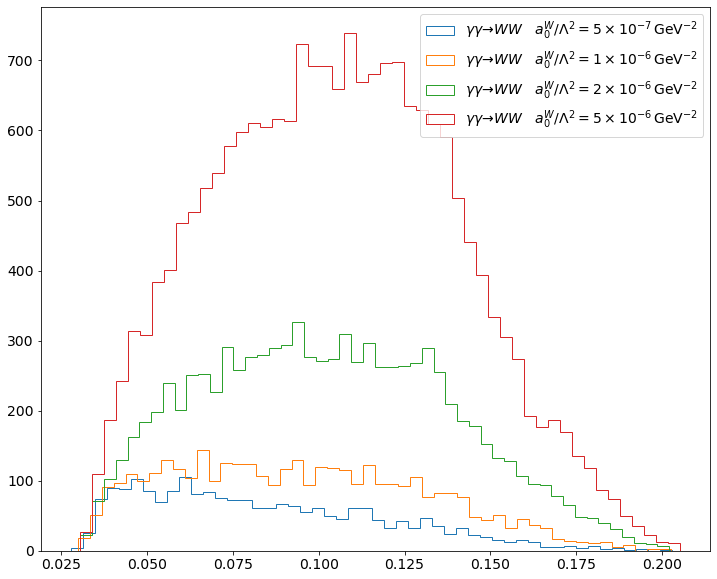

In [6]:
labels_samples = {
    "GGToWW-AQGC-A0W5e-7": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 5 \times 10^{-7} \,\rm{GeV}^{-2}$",
    "GGToWW-AQGC-A0W1e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 1 \times 10^{-6} \,\rm{GeV}^{-2}$",
    "GGToWW-AQGC-A0W2e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 2 \times 10^{-6} \,\rm{GeV}^{-2}$",
    "GGToWW-AQGC-A0W5e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 5 \times 10^{-6} \,\rm{GeV}^{-2}$"
}
labels_samples[ "GGToWW-AQGC-muon-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-muon-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-muon-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-electron-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-electron-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-electron-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-2017-muon-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-2017-muon-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-2017-muon-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-2017-electron-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-2017-electron-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-2017-electron-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-2018-muon-A0W5e-7" ] = labels_samples[ "GGToWW-AQGC-A0W5e-7" ]
labels_samples[ "GGToWW-AQGC-2018-muon-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-2018-muon-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-2018-muon-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-2018-electron-A0W5e-7" ] = labels_samples[ "GGToWW-AQGC-A0W5e-7" ]
labels_samples[ "GGToWW-AQGC-2018-electron-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-2018-electron-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-2018-electron-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]

if load_signal:
    fig = plt.figure( figsize=(12,10) )
    for label_ in labels_signals: 
        plt.hist( df_signals_protons_multiRP_index[ label_ ][ 'xi' ], histtype='step', density=False, bins=50, label=labels_samples[ label_ ] )
    plt.legend( loc='best', fontsize=14 )

### Ouf of acceptance protons

### Signal with mixed protons

In [7]:
labels_signals_mix_protons = []
if data_sample == '2017':
    if lepton_type == 'muon':
#         labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-A0W1e-6", "GGToWW-AQGC-mix_protons-A0W2e-6", "GGToWW-AQGC-mix_protons-A0W5e-6" ]
#         labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-muon-A0W1e-6", "GGToWW-AQGC-mix_protons-muon-A0W2e-6", "GGToWW-AQGC-mix_protons-muon-A0W5e-6" ]
        labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2017-muon-A0W1e-6", "GGToWW-AQGC-mix_protons-2017-muon-A0W2e-6", "GGToWW-AQGC-mix_protons-2017-muon-A0W5e-6" ]
    elif lepton_type == 'electron':
#         labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-electron-A0W1e-6", "GGToWW-AQGC-mix_protons-electron-A0W2e-6", "GGToWW-AQGC-mix_protons-electron-A0W5e-6" ]
        labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2017-electron-A0W1e-6", "GGToWW-AQGC-mix_protons-2017-electron-A0W2e-6", "GGToWW-AQGC-mix_protons-2017-electron-A0W5e-6" ]
elif data_sample == '2018':
    if lepton_type == 'muon':
        labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2018-muon-A0W5e-7", "GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6", "GGToWW-AQGC-mix_protons-2018-muon-A0W2e-6", "GGToWW-AQGC-mix_protons-2018-muon-A0W5e-6" ]
    elif lepton_type == 'electron':
        labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2018-electron-A0W5e-7", "GGToWW-AQGC-mix_protons-2018-electron-A0W1e-6", "GGToWW-AQGC-mix_protons-2018-electron-A0W2e-6", "GGToWW-AQGC-mix_protons-2018-electron-A0W5e-6" ]
df_counts_signals_mix_protons = {}
df_signals_protons_multiRP_mix_protons_index = {}
df_signals_protons_multiRP_mix_protons_events = {}
if load_signal:
    base_path_ = "output"
    for label_ in labels_signals_mix_protons:
        print ( label_ )
        file_path_ = "{}/data-store-{}.h5".format( base_path_, label_ )
        with pd.HDFStore( file_path_, 'r' ) as store_:
            print ( list( store_ ) )
            df_counts_signals_mix_protons[ label_ ] = store_[ "counts" ]
            df_signals_protons_multiRP_mix_protons_index[ label_ ] = store_[ "protons_multiRP" ]
            df_signals_protons_multiRP_mix_protons_events[ label_ ] = store_[ "events_multiRP" ]

GGToWW-AQGC-mix_protons-2018-electron-A0W5e-7
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-mix_protons-2018-electron-A0W1e-6
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-mix_protons-2018-electron-A0W2e-6
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-mix_protons-2018-electron-A0W5e-6
['/counts', '/events_multiRP', '/protons_multiRP']


In [8]:
# df_signals_protons_multiRP_mix_protons_events[ 'GGToWW-AQGC-mix_protons-2017-muon-A0W1e-6' ]
# df_signals_protons_multiRP_mix_protons_index[ 'GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6' ]
# df_signals_protons_multiRP_mix_protons_events[ 'GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6' ]
# df_signals_protons_multiRP_mix_protons_events[ 'GGToWW-AQGC-mix_protons-2018-electron-A0W5e-7' ]
label_ref_ = ""
if data_sample == '2017':
    if lepton_type == 'muon':
        label_ref_ = 'GGToWW-AQGC-mix_protons-2017-muon-A0W2e-6'
    elif lepton_type == 'electron':
        label_ref_ = 'GGToWW-AQGC-mix_protons-2017-electron-A0W2e-6'
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ref_ = 'GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6'
    elif lepton_type == 'electron':
        label_ref_ = 'GGToWW-AQGC-mix_protons-2018-electron-A0W1e-6'
df_signals_protons_multiRP_mix_protons_events[ label_ref_ ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   5         5     5339610529861377610  0              130.0       0.4   
    8         8     9446031773239108120  0              130.0       0.4   
    12        12    15339420394512260264 0              139.0       0.4   
    33        33    16255428128376230373 0              131.0       0.4   
                    2726106374922976758  0              131.0       0.4   
...                                                       ...       ...   
    923       923   4141042517910732571  0              152.0       0.4   
    940       940   15477861846614492704 0              152.0       0.4   
    956       956   8817318314493193207  0              152.0       0.4   
    958       958   5664762168809617373  0              160.0       0.4   
    960       960   6737629890243983930  0              155.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   5         5     5339610529861377610  0           0.0  837.669067   
    8         8     9446031773239108120  0           0.0  201.083176   
    12        12    15339420394512260264 0           0.0  248.689651   
    33        33    16255428128376230373 0           0.0  665.297363   
                    2726106374922976758  0           0.0  560.282043   
...                                                  ...         ...   
    923       923   4141042517910732571  0           0.0  803.507385   
    940       940   15477861846614492704 0           0.0  809.568787   
    956       956   8817318314493193207  0           0.0  257.527191   
    958       958   5664762168809617373  0           0.0  248.785751   
    960       960   6737629890243983930  0           0.0  288.043945   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   5         5     5339610529861377610  0      0.430063 -0.627381   
    8         8     9446031773239108120  0     -0.491799 -1.975299   
    12        12    15339420394512260264 0      0.268847  1.420060   
    33        33    16255428128376230373 0      0.377957 -0.985563   
                    2726106374922976758  0      0.116911  3.124210   
...                                                  ...       ...   
    923       923   4141042517910732571  0      0.305384 -1.407042   
    940       940   15477861846614492704 0     -0.022926 -1.801885   
    956       956   8817318314493193207  0     -0.470100 -0.530304   
    958       958   5664762168809617373  0     -1.532617 -0.209011   
    960       960   6737629890243983930  0     -0.665047  0.200183   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   5         5     5339610529861377610  0       921.232056   2.406795   
    8         8     9446031773239108120  0       240.973053  69.081070   
    12        12    15339420394512260264 0       264.848877  16.936157   
    33        33    16255428128376230373 0       717.429504   9.528005   
                    2726106374922976758  0       567.501831  41.178581   
...                                                     ...        ...   
    923       923   4141042517910732571  0       846.798828  60.154987   
    940       940   15477861846614492704 0       818.446472  77.873322   
    956       956   8817318314493193207  0       296.781891  66.359024   
    958       958   5664762168809617373  0       604.112671  14.496469   
    960       960   6737629890243983930  0       356.607300  14.560109   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   5         5     5339610529861377610  0           2.524711   0.052525  ...   
    8         8   

In [9]:
# label_signal_to_mix_protons = {
#     "GGToWW-AQGC-A0W1e-6" : "GGToWW-AQGC-mix_protons-A0W1e-6",
#     "GGToWW-AQGC-A0W2e-6" : "GGToWW-AQGC-mix_protons-A0W2e-6",
#     "GGToWW-AQGC-A0W5e-6" : "GGToWW-AQGC-mix_protons-A0W5e-6",
#     "GGToWW-AQGC-muon-A0W1e-6" : "GGToWW-AQGC-mix_protons-muon-A0W1e-6",
#     "GGToWW-AQGC-muon-A0W2e-6" : "GGToWW-AQGC-mix_protons-muon-A0W2e-6",
#     "GGToWW-AQGC-muon-A0W5e-6" : "GGToWW-AQGC-mix_protons-muon-A0W5e-6",
#     "GGToWW-AQGC-electron-A0W1e-6" : "GGToWW-AQGC-mix_protons-electron-A0W1e-6",
#     "GGToWW-AQGC-electron-A0W2e-6" : "GGToWW-AQGC-mix_protons-electron-A0W2e-6",
#     "GGToWW-AQGC-electron-A0W5e-6" : "GGToWW-AQGC-mix_protons-electron-A0W5e-6",
#     "GGToWW-AQGC-2017-muon-A0W1e-6" : "GGToWW-AQGC-mix_protons-2017-muon-A0W1e-6",
#     "GGToWW-AQGC-2017-muon-A0W2e-6" : "GGToWW-AQGC-mix_protons-2017-muon-A0W2e-6",
#     "GGToWW-AQGC-2017-muon-A0W5e-6" : "GGToWW-AQGC-mix_protons-2017-muon-A0W5e-6",
#     "GGToWW-AQGC-2017-electron-A0W1e-6" : "GGToWW-AQGC-mix_protons-2017-electron-A0W1e-6",
#     "GGToWW-AQGC-2017-electron-A0W2e-6" : "GGToWW-AQGC-mix_protons-2017-electron-A0W2e-6",
#     "GGToWW-AQGC-2017-electron-A0W5e-6" : "GGToWW-AQGC-mix_protons-2017-electron-A0W5e-6",
#     "GGToWW-AQGC-2018-muon-A0W1e-6" : "GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6",
#     "GGToWW-AQGC-2018-muon-A0W2e-6" : "GGToWW-AQGC-mix_protons-2018-muon-A0W2e-6",
#     "GGToWW-AQGC-2018-muon-A0W5e-6" : "GGToWW-AQGC-mix_protons-2018-muon-A0W5e-6",
#     "GGToWW-AQGC-2018-electron-A0W1e-6" : "GGToWW-AQGC-mix_protons-2018-electron-A0W1e-6",
#     "GGToWW-AQGC-2018-electron-A0W2e-6" : "GGToWW-AQGC-mix_protons-2018-electron-A0W2e-6",
#     "GGToWW-AQGC-2018-electron-A0W5e-6" : "GGToWW-AQGC-mix_protons-2018-electron-A0W5e-6"
# }

### Signal with event mixing

In [10]:
df_signals_protons_multiRP_sig_plus_mix_2protons_events = {}
df_signals_protons_multiRP_sig_plus_mix_events_categories = {}
base_path_ = "output"
for label_ in labels_signals:
    print ( label_ )
    file_path_ = "{}/data-store-signal-plus-mix-events-{}.h5".format( base_path_, label_ )
    with pd.HDFStore( file_path_, 'r' ) as store_:
        df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ] = store_[ "/events_multiRP/all" ]
        df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ] = {}
        for key_ in [ '2protons_sig', '1proton_sig_Arm0', '1proton_sig_Arm1', '2protons_mix' ]:
            print ( key_ )
            df_protons_multiRP_events__ = store_[ "events_multiRP/{}".format( key_ ) ]
            df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ key_ ] = df_protons_multiRP_events__

GGToWW-AQGC-2018-electron-A0W5e-7
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
GGToWW-AQGC-2018-electron-A0W1e-6
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
GGToWW-AQGC-2018-electron-A0W2e-6
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
GGToWW-AQGC-2018-electron-A0W5e-6
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix


In [11]:
label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_
    
# columns__ = df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ].columns.values
# columns_electron__ = columns__[ [ key_.find( "electron" ) >= 0 for key_ in columns__ ] ]
# df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ][ columns_electron__ ]
df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   1         1     1944802588617703528  0              155.0       0.4   
    2         2     16211655903997137111 0              155.0       0.4   
    3         3     12272419502714003563 0              160.0       0.4   
    4         4     10525686656389309447 0              156.0       0.4   
                    15856783609862603967 0              156.0       0.4   
...                                                       ...       ...   
    994       994   5914254560329412260  0              144.0       0.4   
    995       995   4475311302969195420  0              160.0       0.4   
    996       996   5017783708952751576  0              145.0       0.4   
                    12874365531286025719 0              145.0       0.4   
    997       997   17757470173017801993 0              153.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   1         1     1944802588617703528  0           0.0  664.139893   
    2         2     16211655903997137111 0           0.0  586.168335   
    3         3     12272419502714003563 0           0.0  323.199982   
    4         4     10525686656389309447 0           0.0  243.359894   
                    15856783609862603967 0           0.0  414.572083   
...                                                  ...         ...   
    994       994   5914254560329412260  0           0.0  342.203339   
    995       995   4475311302969195420  0           0.0  716.522705   
    996       996   5017783708952751576  0           0.0  329.997101   
                    12874365531286025719 0           0.0  295.174988   
    997       997   17757470173017801993 0           0.0  621.233826   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   1         1     1944802588617703528  0      0.370909  2.205878   
    2         2     16211655903997137111 0     -0.356795 -1.623391   
    3         3     12272419502714003563 0      0.870364 -1.353606   
    4         4     10525686656389309447 0     -1.667660  0.683213   
                    15856783609862603967 0      0.038023  1.131099   
...                                                  ...       ...   
    994       994   5914254560329412260  0      1.620885 -2.644326   
    995       995   4475311302969195420  0     -0.050619  0.522885   
    996       996   5017783708952751576  0     -1.584534  2.468230   
                    12874365531286025719 0     -1.162811  3.122458   
    997       997   17757470173017801993 0      1.006770  1.312469   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   1         1     1944802588617703528  0       713.456665  45.384243   
    2         2     16211655903997137111 0       628.222595  14.063241   
    3         3     12272419502714003563 0       458.697662  25.696383   
    4         4     10525686656389309447 0       672.051880  62.541195   
                    15856783609862603967 0       427.339203  68.818352   
...                                                     ...        ...   
    994       994   5914254560329412260  0       903.198914  61.725346   
    995       995   4475311302969195420  0       723.477783  63.936966   
    996       996   5017783708952751576  0       843.809143  75.664619   
                    12874365531286025719 0       527.242676  69.175949   
    997       997   17757470173017801993 0       969.993896  52.506653   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   1         1     1944802588617703528  0          47.711678   0.076399  ...   
    2         2   

In [12]:
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_sig' ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   1         1     1944802588617703528  0              155.0       0.4   
    2         2     16211655903997137111 0              155.0       0.4   
    3         3     12272419502714003563 0              160.0       0.4   
    4         4     10525686656389309447 0              156.0       0.4   
    5         5     740854441413864254   0              130.0       0.4   
...                                                       ...       ...   
    990       990   10390198840563020236 0              130.0       0.4   
    991       991   18396100130215887947 0              130.0       0.4   
    993       993   4022135500799956084  0              143.0       0.4   
    995       995   4475311302969195420  0              160.0       0.4   
    996       996   12874365531286025719 0              145.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   1         1     1944802588617703528  0           0.0  664.139893   
    2         2     16211655903997137111 0           0.0  586.168335   
    3         3     12272419502714003563 0           0.0  323.199982   
    4         4     10525686656389309447 0           0.0  243.359894   
    5         5     740854441413864254   0           0.0  937.817688   
...                                                  ...         ...   
    990       990   10390198840563020236 0           0.0  521.710571   
    991       991   18396100130215887947 0           0.0  386.887421   
    993       993   4022135500799956084  0           0.0  308.792084   
    995       995   4475311302969195420  0           0.0  716.522705   
    996       996   12874365531286025719 0           0.0  295.174988   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   1         1     1944802588617703528  0      0.370909  2.205878   
    2         2     16211655903997137111 0     -0.356795 -1.623391   
    3         3     12272419502714003563 0      0.870364 -1.353606   
    4         4     10525686656389309447 0     -1.667660  0.683213   
    5         5     740854441413864254   0     -0.110350 -0.238838   
...                                                  ...       ...   
    990       990   10390198840563020236 0      0.259746  0.222885   
    991       991   18396100130215887947 0     -0.492888 -1.461359   
    993       993   4022135500799956084  0      0.971209 -1.952721   
    995       995   4475311302969195420  0     -0.050619  0.522885   
    996       996   12874365531286025719 0     -1.162811  3.122458   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   1         1     1944802588617703528  0       713.456665  45.384243   
    2         2     16211655903997137111 0       628.222595  14.063241   
    3         3     12272419502714003563 0       458.697662  25.696383   
    4         4     10525686656389309447 0       672.051880  62.541195   
    5         5     740854441413864254   0       949.788635  68.408958   
...                                                     ...        ...   
    990       990   10390198840563020236 0       546.702637  53.309116   
    991       991   18396100130215887947 0       447.572479  81.043777   
    993       993   4022135500799956084  0       474.377930  73.679192   
    995       995   4475311302969195420  0       723.477783  63.936966   
    996       996   12874365531286025719 0       527.242676  69.175949   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   1         1     1944802588617703528  0          47.711678   0.076399  ...   
    2         2   

In [13]:
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '1proton_sig_Arm0' ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   9         9     12317187692446095069 0              140.0       0.4   
    10        10    7558368219141528418  0              130.0       0.4   
    14        14    13454563556953843306 0              155.0       0.4   
    23        23    15887448275697464863 0              137.0       0.4   
    24        24    10625862581123029062 0              154.0       0.4   
...                                                       ...       ...   
    985       985   914473994837322239   0              150.0       0.4   
    987       987   1344653564590561033  0              130.0       0.4   
    988       988   277150931261033176   0              137.0       0.4   
                    2512922780068261068  0              137.0       0.4   
    991       991   9695500868524740689  0              130.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   9         9     12317187692446095069 0           0.0  203.956818   
    10        10    7558368219141528418  0           0.0  521.509949   
    14        14    13454563556953843306 0           0.0  566.433289   
    23        23    15887448275697464863 0           0.0  209.384369   
    24        24    10625862581123029062 0           0.0  212.454346   
...                                                  ...         ...   
    985       985   914473994837322239   0           0.0  833.359802   
    987       987   1344653564590561033  0           0.0  233.717560   
    988       988   277150931261033176   0           0.0  264.144531   
                    2512922780068261068  0           0.0  211.184509   
    991       991   9695500868524740689  0           0.0  750.748779   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   9         9     12317187692446095069 0      1.313155 -0.796022   
    10        10    7558368219141528418  0     -0.398828  2.480154   
    14        14    13454563556953843306 0     -1.200331  0.135064   
    23        23    15887448275697464863 0      1.869602  0.561624   
    24        24    10625862581123029062 0      0.638194  2.610016   
...                                                  ...       ...   
    985       985   914473994837322239   0     -0.111346  2.722611   
    987       987   1344653564590561033  0     -0.832136 -0.422930   
    988       988   277150931261033176   0      0.972642  2.921278   
                    2512922780068261068  0     -2.334644  0.340692   
    991       991   9695500868524740689  0     -0.492037  1.785320   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   9         9     12317187692446095069 0       409.184143   5.731001   
    10        10    7558368219141528418  0       572.279785  67.312225   
    14        14    13454563556953843306 0      1029.195190  10.886225   
    23        23    15887448275697464863 0       696.699463   9.083841   
    24        24    10625862581123029062 0       263.395081  39.638199   
...                                                     ...        ...   
    985       985   914473994837322239   0       843.907654  75.310913   
    987       987   1344653564590561033  0       335.174561  93.303123   
    988       988   277150931261033176   0       410.027802  77.252090   
                    2512922780068261068  0      1103.213867  53.296406   
    991       991   9695500868524740689  0       849.021179  10.144919   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   9         9     12317187692446095069 0           6.352411   0.110385  ...   
    10        10  

In [14]:
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '1proton_sig_Arm1' ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   4         4     15856783609862603967 0              156.0       0.4   
    5         5     5339610529861377610  0              130.0       0.4   
    6         6     4611183543600987384  0              137.0       0.4   
                    11295334870207839714 0              137.0       0.4   
    10        10    16053909617580604050 0              130.0       0.4   
...                                                       ...       ...   
    987       987   8294192029043213037  0              130.0       0.4   
    991       991   14216653516380316186 0              130.0       0.4   
    993       993   7831194486295188689  0              143.0       0.4   
    994       994   5914254560329412260  0              144.0       0.4   
    997       997   17757470173017801993 0              153.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   4         4     15856783609862603967 0           0.0  414.572083   
    5         5     5339610529861377610  0           0.0  837.669067   
    6         6     4611183543600987384  0           0.0  721.702881   
                    11295334870207839714 0           0.0  256.303925   
    10        10    16053909617580604050 0           0.0  948.081299   
...                                                  ...         ...   
    987       987   8294192029043213037  0           0.0  737.745361   
    991       991   14216653516380316186 0           0.0  735.052368   
    993       993   7831194486295188689  0           0.0  509.769928   
    994       994   5914254560329412260  0           0.0  342.203339   
    997       997   17757470173017801993 0           0.0  621.233826   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   4         4     15856783609862603967 0      0.038023  1.131099   
    5         5     5339610529861377610  0      0.430063 -0.627381   
    6         6     4611183543600987384  0      0.637583 -0.931944   
                    11295334870207839714 0      1.222754 -2.446516   
    10        10    16053909617580604050 0     -0.544411  2.140907   
...                                                  ...       ...   
    987       987   8294192029043213037  0     -0.341826  1.870522   
    991       991   14216653516380316186 0      0.957003 -0.612172   
    993       993   7831194486295188689  0      0.691882  1.321828   
    994       994   5914254560329412260  0      1.620885 -2.644326   
    997       997   17757470173017801993 0      1.006770  1.312469   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   4         4     15856783609862603967 0       427.339203  68.818352   
    5         5     5339610529861377610  0       921.232056   2.406795   
    6         6     4611183543600987384  0       878.948425  69.641640   
                    11295334870207839714 0       474.785370   8.576097   
    10        10    16053909617580604050 0      1096.242188  61.718513   
...                                                     ...        ...   
    987       987   8294192029043213037  0       789.541077  75.239532   
    991       991   14216653516380316186 0      1104.438477  74.860344   
    993       993   7831194486295188689  0       644.054993  26.583155   
    994       994   5914254560329412260  0       903.198914  61.725346   
    997       997   17757470173017801993 0       969.993896  52.506653   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   4         4     15856783609862603967 0          72.347588   0.180973  ...   
    5         5   

In [15]:
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_mix' ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   8         8     9446031773239108120  0              130.0       0.4   
    12        12    63729640924155100    0              139.0       0.4   
                    15339420394512260264 0              139.0       0.4   
    14        14    8094112139803667553  0              155.0       0.4   
    17        17    6659892569308201406  0              160.0       0.4   
...                                                       ...       ...   
    982       982   1807345057537903271  0              139.0       0.4   
                    4233250167475802640  0              139.0       0.4   
    985       985   7596321733057531248  0              150.0       0.4   
    988       988   8963764106123360225  0              137.0       0.4   
    996       996   5017783708952751576  0              145.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   8         8     9446031773239108120  0           0.0  201.083176   
    12        12    63729640924155100    0           0.0  567.967712   
                    15339420394512260264 0           0.0  248.689651   
    14        14    8094112139803667553  0           0.0  553.144165   
    17        17    6659892569308201406  0           0.0  982.247253   
...                                                  ...         ...   
    982       982   1807345057537903271  0           0.0  650.994202   
                    4233250167475802640  0           0.0  872.907349   
    985       985   7596321733057531248  0           0.0  201.872055   
    988       988   8963764106123360225  0           0.0  205.939529   
    996       996   5017783708952751576  0           0.0  329.997101   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   8         8     9446031773239108120  0     -0.491799 -1.975299   
    12        12    63729640924155100    0      1.044214 -1.824368   
                    15339420394512260264 0      0.268847  1.420060   
    14        14    8094112139803667553  0      0.219265  2.324556   
    17        17    6659892569308201406  0     -0.438888  0.256059   
...                                                  ...       ...   
    982       982   1807345057537903271  0     -0.552931  1.776908   
                    4233250167475802640  0     -0.343501  1.947001   
    985       985   7596321733057531248  0     -0.844108  3.113474   
    988       988   8963764106123360225  0     -0.957636  1.620354   
    996       996   5017783708952751576  0     -1.584534  2.468230   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   8         8     9446031773239108120  0       240.973053  69.081070   
    12        12    63729640924155100    0       909.785034  49.218643   
                    15339420394512260264 0       264.848877  16.936157   
    14        14    8094112139803667553  0       574.445740  18.857515   
    17        17    6659892569308201406  0      1082.179565  67.777885   
...                                                     ...        ...   
    982       982   1807345057537903271  0       761.359802  62.911411   
                    4233250167475802640  0       929.730530  27.271296   
    985       985   7596321733057531248  0       289.262482  77.834053   
    988       988   8963764106123360225  0       312.292755  38.210075   
    996       996   5017783708952751576  0       843.809143  75.664619   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   8         8     9446031773239108120  0          72.720047   0.472296  ...   
    12        12  

### Select events

In [16]:
df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events = {}
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories = {}

variations_ = { "jet": [ "_jes_up", "_jes_dw", "_jer_up", "_jer_dw" ] }
for label_ in labels_signals:
    print ( label_ )
    df_events__ = df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ]
    print ( df_events__.shape[0] )
#     df_selected_events__, selection_keys__, selections__  = select_events( df_events__ )
    df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type )
    print ( df_selected_events__.shape[0] )
    print ( selection_keys__ )
    print ( selections__ )
    df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ] = {}
    df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_nom" ] = df_selected_events__
    for var_label__ in variations_:
        print ( var_label__ )
        for variation__ in variations_[ var_label__ ]:
            opt__ = { "label_" + var_label__ : variation__ }
            print ( opt__ )
            df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type, **opt__ )
            print ( df_selected_events__.shape[0] )
            print ( selection_keys__ )
            print ( selections__ )
            df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ variation__ ] = df_selected_events__
            
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ] = {}
    for cat__ in df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ]:
        print ( cat__ )
        df_events__ = df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ cat__ ]
        print ( df_events__.shape[0] )
        df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type )
        print ( df_selected_events__.shape[0] )
        print ( selection_keys__ )
        print ( selections__ )
        df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ] = {}
        df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ "_nom" ] = df_selected_events__
        for var_label__ in variations_:
            print ( var_label__ )
            for variation__ in variations_[ var_label__ ]:
                opt__ = { "label_" + var_label__ : variation__ }
                print ( opt__ )
                df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type, **opt__ )
                print ( df_selected_events__.shape[0] )
                print ( selection_keys__ )
                print ( selections__ )
                df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ] = df_selected_events__

GGToWW-AQGC-2018-electron-A0W5e-7
899
347
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 899, 'Electron': 899, 'Jet': 781, 'Jet_Electron': 781, 'MET': 689, 'Jet_MET': 631, 'PrunedMass': 448, 'Tau21': 427, 'BJet_Veto': 427, 'Xi_CMS': 417, 'WLeptonic': 399, 'Jet_WLeptonic': 399, 'MWW': 394, 'ExtraTracks': 347}
jet
{'label_jet': '_jes_up'}
348
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 899, 'Electron': 899, 'Jet': 792, 'Jet_Electron': 792, 'MET': 696, 'Jet_MET': 637, 'PrunedMass': 454, 'Tau21': 432, 'BJet_Veto': 432, 'Xi_CMS': 421, 'WLeptonic': 403, 'Jet_WLeptonic': 403, 'MWW': 396, 'ExtraTracks': 348}
{'label_jet': '_jes_dw'}
347
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 

63
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 162, 'Electron': 162, 'Jet': 146, 'Jet_Electron': 146, 'MET': 136, 'Jet_MET': 122, 'PrunedMass': 86, 'Tau21': 82, 'BJet_Veto': 82, 'Xi_CMS': 75, 'WLeptonic': 71, 'Jet_WLeptonic': 71, 'MWW': 70, 'ExtraTracks': 63}
{'label_jet': '_jes_dw'}
64
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 162, 'Electron': 162, 'Jet': 143, 'Jet_Electron': 143, 'MET': 134, 'Jet_MET': 121, 'PrunedMass': 84, 'Tau21': 80, 'BJet_Veto': 80, 'Xi_CMS': 74, 'WLeptonic': 70, 'Jet_WLeptonic': 70, 'MWW': 70, 'ExtraTracks': 64}
{'label_jet': '_jer_up'}
64
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 162, 'Electron

192
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 436, 'Electron': 436, 'Jet': 410, 'Jet_Electron': 410, 'MET': 370, 'Jet_MET': 348, 'PrunedMass': 259, 'Tau21': 239, 'BJet_Veto': 239, 'Xi_CMS': 228, 'WLeptonic': 224, 'Jet_WLeptonic': 224, 'MWW': 223, 'ExtraTracks': 192}
{'label_jet': '_jer_dw'}
193
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 436, 'Electron': 436, 'Jet': 410, 'Jet_Electron': 410, 'MET': 370, 'Jet_MET': 348, 'PrunedMass': 258, 'Tau21': 239, 'BJet_Veto': 239, 'Xi_CMS': 229, 'WLeptonic': 225, 'Jet_WLeptonic': 225, 'MWW': 224, 'ExtraTracks': 193}
2protons_mix
315
133
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 315

402
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 825, 'Electron': 825, 'Jet': 791, 'Jet_Electron': 791, 'MET': 717, 'Jet_MET': 666, 'PrunedMass': 499, 'Tau21': 467, 'BJet_Veto': 467, 'Xi_CMS': 453, 'WLeptonic': 448, 'Jet_WLeptonic': 448, 'MWW': 443, 'ExtraTracks': 402}
1proton_sig_Arm1
1035
494
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 1035, 'Electron': 1035, 'Jet': 1009, 'Jet_Electron': 1009, 'MET': 933, 'Jet_MET': 862, 'PrunedMass': 641, 'Tau21': 607, 'BJet_Veto': 606, 'Xi_CMS': 565, 'WLeptonic': 561, 'Jet_WLeptonic': 561, 'MWW': 560, 'ExtraTracks': 494}
jet
{'label_jet': '_jes_up'}
492
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks'

951
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 1941, 'Electron': 1941, 'Jet': 1911, 'Jet_Electron': 1911, 'MET': 1762, 'Jet_MET': 1624, 'PrunedMass': 1229, 'Tau21': 1153, 'BJet_Veto': 1153, 'Xi_CMS': 1094, 'WLeptonic': 1091, 'Jet_WLeptonic': 1091, 'MWW': 1090, 'ExtraTracks': 951}
jet
{'label_jet': '_jes_up'}
946
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 1941, 'Electron': 1941, 'Jet': 1914, 'Jet_Electron': 1914, 'MET': 1765, 'Jet_MET': 1626, 'PrunedMass': 1230, 'Tau21': 1153, 'BJet_Veto': 1153, 'Xi_CMS': 1089, 'WLeptonic': 1086, 'Jet_WLeptonic': 1086, 'MWW': 1085, 'ExtraTracks': 946}
{'label_jet': '_jes_dw'}
953
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLepton

In [17]:
import json
samples_info = None
if data_sample == '2017':
    samples_info = json.load( open( 'samples_info_2017.json' ) )
elif data_sample == '2018':
    samples_info = json.load( open( 'samples_info_2018.json' ) )
samples_info

{'QCD_Pt_170to300_TuneCP5_13TeV_pythia8': [29829920.0, 103500, 2],
 'ExclusiveWW_a0w1e-6-SingleLepton-2017': [15000.0, 0.062086, 6],
 'GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6': [993000.0, 0.148132, 6],
 'GGToWWToJJENu_PtL-15_13TeV-fpmc-herwig6': [295401.0, 0.0049534, 1],
 'QCD_Pt_1800to2400_TuneCP5_13TeV_pythia8': [2923941.0, 0.08743, 2],
 'ST_s-channel_4f_leptonDecays_TuneCP5_13TeV-madgraph-pythia8': [9420547.0,
  3.36,
  7],
 'GGToWW_bSM-ACW5e-6_13TeV-fpmc-herwig6': [99500.0, 0.0487, 6],
 'QCD_Pt-300to470_MuEnrichedPt5_TuneCP5_13TeV_pythia8': [15679722.0,
  797.3526899999999,
  2],
 'GGToWW-SM-fpmc-herwig6-noXiCut': [54019.0, 0.085521, 6],
 'W2JetsToLNu_LHEWpT_400-inf_TuneCP5_13TeV-amcnloFXFX-pythia8': [18019964.0,
  3.037,
  862],
 'WJetsToLNu_HT-1200To2500_TuneCP5_13TeV-madgraphMLM-pythia8': [20258624.0,
  1.02333,
  862],
 'W1JetsToLNu_LHEWpT_100-150_TuneCP5_13TeV-amcnloFXFX-pythia8': [73508344.0,
  286.1,
  862],
 'ST_t-channel_antitop_4f_inclusiveDecays_TuneCP5_13TeV-powhegV2-mads

In [18]:
lumi_periods = None
if data_sample == '2017':
    if lepton_type == 'muon':
        lumi_periods = lumi_periods_2017[ 'muon' ]
    elif lepton_type == 'electron':
        lumi_periods = lumi_periods_2017[ 'electron' ]
elif data_sample == '2018':
    if lepton_type == 'muon':
        lumi_periods = lumi_periods_2018[ 'muon' ]
    elif lepton_type == 'electron':
        lumi_periods = lumi_periods_2018[ 'electron' ]
    
lumi = np.sum( list( lumi_periods.values() ) )
print ( lumi )

#labels_signals = [ "GGToWW-AQGC-test-A0W1e-6", "GGToWW-AQGC-test-A0W2e-6", "GGToWW-AQGC-test-A0W5e-6" ]
sample_names = {}
if data_sample == '2017':
#     sample_names[ "GGToWW-AQGC-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-muon-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-muon-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-muon-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-electron-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-electron-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-electron-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
    sample_names[ "GGToWW-AQGC-2017-muon-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
    sample_names[ "GGToWW-AQGC-2017-muon-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
    sample_names[ "GGToWW-AQGC-2017-muon-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
    sample_names[ "GGToWW-AQGC-2017-electron-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
    sample_names[ "GGToWW-AQGC-2017-electron-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
    sample_names[ "GGToWW-AQGC-2017-electron-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
elif data_sample == '2018':
    sample_names[ "GGToWW-AQGC-2018-muon-A0W5e-7" ] = "GGToWW_bSM-A0W5e-7_13TeV-fpmc-herwig6-2018"
    sample_names[ "GGToWW-AQGC-2018-muon-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6-2018"
    sample_names[ "GGToWW-AQGC-2018-muon-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6-2018"
    sample_names[ "GGToWW-AQGC-2018-muon-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6-2018"
    sample_names[ "GGToWW-AQGC-2018-electron-A0W5e-7" ] = "GGToWW_bSM-A0W5e-7_13TeV-fpmc-herwig6-2018"
    sample_names[ "GGToWW-AQGC-2018-electron-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6-2018"
    sample_names[ "GGToWW-AQGC-2018-electron-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6-2018"
    sample_names[ "GGToWW-AQGC-2018-electron-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6-2018"
    
norm_factors = {}
for label_ in labels_signals:
    print ( label_ )
    sample_nevents_, sample_cross_section_, _ = samples_info[ sample_names[ label_ ] ]
    if norm_to_1fb:
        sample_cross_section_ = 1.e-03
    if data_sample == '2018':
        sample_cross_section_ *= ( 0.14271*(1.174) )
    norm_factors[ label_ ] = np.array( [ lumi / ( sample_nevents_ ), sample_cross_section_*1000, 1.0 ] )
    print ( samples_info[ sample_names[ label_] ] )
    print ( norm_factors[ label_ ] )
    norm_factors_product_ = np.product( norm_factors[ label_ ] )
#     df_signals_protons_multiRP_events[ label_ ].loc[ :, "norm" ] = norm_factors_product_
    df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_nom" ].loc[ :, "norm" ] = norm_factors_product_
    for variation__ in df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ]:
        print ( variation__ )
        df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ variation__ ].loc[ :, "norm" ] = norm_factors_product_
    for cat__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
        print ( cat__ )
#     for cat__ in df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ]:
#         print ( cat__ )
#         df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ][ cat__ ].loc[ :, "norm" ] = norm_factors_product_
        for variation__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ]:
            print ( variation__ )
            df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ].loc[ :, "norm" ] = norm_factors_product_

54.8768940339
GGToWW-AQGC-2018-electron-A0W5e-7
[50000, 0.041579, 6]
[0.00109754 0.16754154 1.        ]
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_sig
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm0
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm1
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_mix
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
GGToWW-AQGC-2018-electron-A0W1e-6
[40000, 0.04931, 6]
[0.00137192 0.16754154 1.        ]


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_sig
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm0
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm1
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_mix
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
GGToWW-AQGC-2018-electron-A0W2e-6
[50000.0, 0.058177, 6]
[0.00109754 0.16754154 1.        ]
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_sig
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm0
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm1
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_mix
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
GGToWW-AQGC-2018-electron-A0W5e-6
[39001, 0.1503, 6]
[0.00140706 0.16754154 1.        ]
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_sig
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm0
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm1
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_mix
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw


In [19]:
label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_
    
print ( df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ].columns.values )

['crossingAngle' 'betaStar' 'instLumi' 'jet0_pt' 'jet0_eta' 'jet0_phi'
 'jet0_energy' 'jet0_mass' 'jet0_corrmass' 'jet0_tau1' 'jet0_tau2'
 'jet0_vertexz' 'jet0_px' 'jet0_py' 'jet0_pz' 'met' 'met_x' 'met_y'
 'met_phi' 'nVertices' 'num_bjets_ak8' 'num_bjets_ak4' 'num_jets_ak4'
 'pfcand_nextracks' 'pfcand_nextracks_noDRl' 'recoMWhad' 'recoMWlep'
 'recoMWW' 'recoRapidityWW' 'dphiWW' 'WLeptonicPt' 'WLeptonicEta'
 'WLeptonicPhi' 'electron0_pt' 'electron0_eta' 'electron0_phi'
 'electron0_energy' 'electron0_charge' 'electron0_dxy' 'electron0_dz'
 'run_mc' 'pileupWeight' 'mc_pu_trueinteractions' 'mcWeight'
 'jet0_jer_res' 'jet0_jer_sf' 'jet0_jer_sfup' 'jet0_jer_sfdown'
 'gen_jet0_pt' 'gen_jet0_eta' 'gen_jet0_phi' 'gen_jet0_energy' 'period'
 'jet0_unc' 'jet0_pt_unsmeared' 'C_JER_ref' 'deltaR_jet_genjet'
 'deltaPt_jet_genjet' 'match_jet_genjet' 'C_JER' 'JER_rand' 'C_JER_jer_up'
 'C_JER_jer_dw' 'jet0_pt_nom' 'jet0_energy_nom' 'jet0_mass_nom'
 'jet0_corrmass_nom' 'jet0_px_nom' 'jet0_py_nom' 'jet0_p

In [20]:
df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_jes_up" ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   4         4     15856783609862603967 0              156.0       0.4   
    6         6     4611183543600987384  0              137.0       0.4   
    10        10    7558368219141528418  0              130.0       0.4   
                    16053909617580604050 0              130.0       0.4   
    12        12    63729640924155100    0              139.0       0.4   
...                                                       ...       ...   
    993       993   4022135500799956084  0              143.0       0.4   
    994       994   5914254560329412260  0              144.0       0.4   
    995       995   4475311302969195420  0              160.0       0.4   
    996       996   5017783708952751576  0              145.0       0.4   
    997       997   17757470173017801993 0              153.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   4         4     15856783609862603967 0           0.0  414.572083   
    6         6     4611183543600987384  0           0.0  721.702881   
    10        10    7558368219141528418  0           0.0  521.509949   
                    16053909617580604050 0           0.0  948.081299   
    12        12    63729640924155100    0           0.0  567.967712   
...                                                  ...         ...   
    993       993   4022135500799956084  0           0.0  308.792084   
    994       994   5914254560329412260  0           0.0  342.203339   
    995       995   4475311302969195420  0           0.0  716.522705   
    996       996   5017783708952751576  0           0.0  329.997101   
    997       997   17757470173017801993 0           0.0  621.233826   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   4         4     15856783609862603967 0      0.038023  1.131099   
    6         6     4611183543600987384  0      0.637583 -0.931944   
    10        10    7558368219141528418  0     -0.398828  2.480154   
                    16053909617580604050 0     -0.544411  2.140907   
    12        12    63729640924155100    0      1.044214 -1.824368   
...                                                  ...       ...   
    993       993   4022135500799956084  0      0.971209 -1.952721   
    994       994   5914254560329412260  0      1.620885 -2.644326   
    995       995   4475311302969195420  0     -0.050619  0.522885   
    996       996   5017783708952751576  0     -1.584534  2.468230   
    997       997   17757470173017801993 0      1.006770  1.312469   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   4         4     15856783609862603967 0       427.339203  68.818352   
    6         6     4611183543600987384  0       878.948425  69.641640   
    10        10    7558368219141528418  0       572.279785  67.312225   
                    16053909617580604050 0      1096.242188  61.718513   
    12        12    63729640924155100    0       909.785034  49.218643   
...                                                     ...        ...   
    993       993   4022135500799956084  0       474.377930  73.679192   
    994       994   5914254560329412260  0       903.198914  61.725346   
    995       995   4475311302969195420  0       723.477783  63.936966   
    996       996   5017783708952751576  0       843.809143  75.664619   
    997       997   17757470173017801993 0       969.993896  52.506653   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   4         4     15856783609862603967 0          72.347588   0.180973  ...   
    6         6   

In [21]:
var_name__ = ""
if lepton_type == 'muon':
    var_name__ = "sf_muon_id"
elif lepton_type == 'electron':
    var_name__ = "sf_electron_id"
var_name_up__ = var_name__ + "_up"
var_name_dw__ = var_name__ + "_dw"

df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ '2protons_sig' ][ "_nom" ][ [ var_name__, var_name_up__, var_name_dw__ ] ]

sf_electron_id  \
run lumiblock event hash_id              slice                   
1   16        16    4395480019753677143  0            0.958888   
    22        22    2868353684786952927  0            0.963636   
    27        27    10444594619543597277 0            0.985126   
    32        32    16104278232427837468 0            1.026196   
    34        34    6375426165694434385  0            1.026196   
...                                                        ...   
    987       987   5997265492819483907  0            0.956473   
    990       990   10390198840563020236 0            0.964203   
    991       991   18396100130215887947 0            1.000000   
    993       993   4022135500799956084  0            0.964203   
    995       995   4475311302969195420  0            1.026196   

                                                sf_electron_id_up  \
run lumiblock event hash_id              slice                      
1   16        16    4395480019753677143  0               0.970361   
    22        22    2868353684786952927  0               0.992036   
    27        27    10444594619543597277 0               1.001245   
    32        32    16104278232427837468 0               1.057777   
    34        34    6375426165694434385  0               1.057777   
...                                                           ...   
    987       987   5997265492819483907  0               0.972592   
    990       990   10390198840563020236 0               0.992920   
    991       991   18396100130215887947 0               2.000000   
    993       993   4022135500799956084  0               0.992920   
    995       995   4475311302969195420  0               1.057777   

                                                sf_electron_id_dw  
run lumiblock event hash_id              slice                     
1   16        16    4395480019753677143  0               0.947414  
    22        22    2868353684786952927  0               0.935237  
    27        27    10444594619543597277 0               0.969007  
    32        32    16104278232427837468 0               0.994615  
    34        34    6375426165694434385  0               0.994615  
...                                                           ...  
    987       987   5997265492819483907  0               0.940354  
    990       990   10390198840563020236 0               0.935487  
    991       991   18396100130215887947 0               0.000000  
    993       993   4022135500799956084  0               0.935487  
    995       995   4475311302969195420  0               0.994615  

[232 rows x 3 columns]

In [22]:
variations_weights_ = [ "nom" ]

if lepton_type == 'muon':
    variations_weights_sf_muon_id_ = [ "sf_muon_id_up", "sf_muon_id_dw" ]
    variations_weights_.extend( variations_weights_sf_muon_id_ )
elif lepton_type == 'electron':
    variations_weights_sf_electron_id_ = [ "sf_electron_id_up", "sf_electron_id_dw" ]
    variations_weights_.extend( variations_weights_sf_electron_id_ )

variations_weights_proton_eff_ = [ "proton_eff_up", "proton_eff_dw" ]
variations_weights_.extend( variations_weights_proton_eff_ )

var_names_sf_lepton_id__ = {}
if lepton_type == 'muon':
    for key_ in [ "nom", "proton_eff_up", "proton_eff_dw" ]: var_names_sf_lepton_id__[ key_ ] = "sf_muon_id"
    var_names_sf_lepton_id__[ "sf_muon_id_up" ] = "sf_muon_id_up"
    var_names_sf_lepton_id__[ "sf_muon_id_dw" ] = "sf_muon_id_dw"
elif lepton_type == 'electron':
    for key_ in [ "nom", "proton_eff_up", "proton_eff_dw" ]: var_names_sf_lepton_id__[ key_ ] = "sf_electron_id"
    var_names_sf_lepton_id__[ "sf_electron_id_up" ] = "sf_electron_id_up"
    var_names_sf_lepton_id__[ "sf_electron_id_dw" ] = "sf_electron_id_dw"
    
var_names_proton_eff__ = {}
var_names_proton_eff__[ "proton_eff_up" ] = "eff_proton_var_up"
var_names_proton_eff__[ "proton_eff_dw" ] = "eff_proton_var_dw"

print ( variations_weights_ )
print ( var_names_sf_lepton_id__ )
print ( var_names_proton_eff__)

weights_mc = {}
weights_sig_plus_mix_2protons = {}
weights_sig_plus_mix_categories = {}
# weights_out_acceptance_misreconstructed = {}
for label_ in labels_signals:
    print ( label_ )
    weights_mc[ label_ ] = {}
    weights_sig_plus_mix_2protons[ label_ ] = {}
    weights_sig_plus_mix_categories[ label_ ] = {}
    
    for var_weights_ in variations_weights_:
#         weights_mc[ label_ ][ var_weights_ ] = ( df_signals_protons_multiRP_events[ label_ ][ "norm" ] * 
#                                                  df_signals_protons_multiRP_events[ label_ ][ "pileupWeight" ] *
#                                                  df_signals_protons_multiRP_events[ label_ ][ var_names_sf_muon_id__[ var_weights_ ] ] *
#                                                  df_signals_protons_multiRP_events[ label_ ][ "eff_proton_all" ] *
#                                                  ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_signals_protons_multiRP_events[ label_ ][ var_names_proton_eff__[ var_weights_ ] ] ) *
#                                                  df_signals_protons_multiRP_events[ label_ ][ "eff_multitrack" ] )

    #     weights_sig_plus_mix_2protons[ label_ ] = ( df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "norm" ] * 
    #                                                 df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "pileupWeight" ] *
    #                                                 df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "sf_muon_id" ] *
    #                                                 df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "eff_proton_all" ] *
    #                                                 df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "eff_strictzero" ] )
        weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ] = {}
        for variation__ in df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ]:
            df_selected_events__ = df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ variation__ ]
#             weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
#                                                                                        df_selected_events__[ "pileupWeight" ] *
#                                                                                        df_selected_events__[ var_names_sf_lepton_id__[ var_weights_ ] ] *
#                                                                                        ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_selected_events__[ var_names_proton_eff__[ var_weights_ ] ] ) *
#                                                                                        df_selected_events__[ "eff_strictzero" ] )
            weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
                                                                                       # df_selected_events__[ "pileupWeight" ] *
                                                                                       df_selected_events__[ var_names_sf_lepton_id__[ var_weights_ ] ] *
                                                                                       ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_selected_events__[ var_names_proton_eff__[ var_weights_ ] ] ) )
            if data_sample == '2017':
                weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ][ variation__ ] = ( weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ][ variation__ ] *
                                                                                           df_selected_events__[ "eff_strictzero" ] )


        weights_sig_plus_mix_categories[ label_ ][ var_weights_ ] = {}
        for cat__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
            print ( cat__ )
    #         weights_sig_plus_mix_categories[ label_ ][ cat__ ] = ( df_selected_events__[ "norm" ] * 
    #                                                               df_selected_events__[ "pileupWeight" ] *
    #                                                               df_selected_events__[ "sf_muon_id" ] *
    #                                                               df_selected_events__[ "eff_proton_all" ] *
    #                                                               df_selected_events__[ "eff_strictzero" ] )
            weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ] = {}
            for variation__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ]:
                df_selected_events__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ]
#                 weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
#                                                                                                       df_selected_events__[ "pileupWeight" ] *
#                                                                                                       df_selected_events__[ var_names_sf_lepton_id__[ var_weights_ ] ] *
#                                                                                                       ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_selected_events__[ var_names_proton_eff__[ var_weights_ ] ] ) *
#                                                                                                       df_selected_events__[ "eff_strictzero" ] )
                weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
                                                                                                      # df_selected_events__[ "pileupWeight" ] *
                                                                                                      df_selected_events__[ var_names_sf_lepton_id__[ var_weights_ ] ] *
                                                                                                      ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_selected_events__[ var_names_proton_eff__[ var_weights_ ] ] ) )
                if data_sample == '2017':
                    weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ] = ( weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ] *
                                                                                                          df_selected_events__[ "eff_strictzero" ] )

    #     weights_out_acceptance_misreconstructed[ label_ ] = {}
    #     for cat__ in df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ]:
    #         print ( cat__ )
    #         df_selected_events__ = df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ][ cat__ ]
    #         weights_out_acceptance_misreconstructed[ label_ ][ cat__ ] = ( df_selected_events__[ "norm" ] * 
    #                                                                       df_selected_events__[ "pileupWeight" ] *
    #                                                                       df_selected_events__[ "sf_muon_id" ] *
    #                                                                       df_selected_events__[ "eff_proton_all" ] *
    #                                                                       df_selected_events__[ "eff_multitrack" ] )
        
print ( weights_mc )
print ( weights_sig_plus_mix_2protons )
print ( weights_sig_plus_mix_categories )
# print ( weights_out_acceptance_misreconstructed )

['nom', 'sf_electron_id_up', 'sf_electron_id_dw', 'proton_eff_up', 'proton_eff_dw']
{'nom': 'sf_electron_id', 'proton_eff_up': 'sf_electron_id', 'proton_eff_dw': 'sf_electron_id', 'sf_electron_id_up': 'sf_electron_id_up', 'sf_electron_id_dw': 'sf_electron_id_dw'}
{'proton_eff_up': 'eff_proton_var_up', 'proton_eff_dw': 'eff_proton_var_dw'}
GGToWW-AQGC-2018-electron-A0W5e-7
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
GGToWW-AQGC-2018-electron-A0W1e-6
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2pro

{'GGToWW-AQGC-2018-electron-A0W5e-7': {'nom': {'2protons_sig': {'_nom': run  lumiblock  event  hash_id               slice
1    3          3      15779954476848197283  0        0.000176
                       18162712741211411715  0        0.000177
     21         21     6957185493937168475   0        0.000177
     35         35     4338258345323806162   0        0.000175
     46         46     938037203735837286    0        0.000177
                                                        ...   
     972        972    1303564918325908606   0        0.000189
     978        978    3245627205523902567   0        0.000185
     981        981    17440461561485462285  0        0.000175
     985        985    136831710507165994    0        0.000181
     991        991    12063825817839840880  0        0.000189
Length: 113, dtype: float64, '_jes_up': run  lumiblock  event  hash_id               slice
1    3          3      15779954476848197283  0        0.000176
                       1816271

In [23]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat = {}
weights_sig_plus_mix_categories_concat = {}
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig = {}
weights_sig_plus_mix_categories_concat_skip_sig = {}
for label_ in labels_signals:
    print ( label_ )
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ] = {}
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ] = {}
    weights_sig_plus_mix_categories_concat[ label_ ] = {}
    weights_sig_plus_mix_categories_concat_skip_sig[ label_ ] = {}
    for var_weights_ in variations_weights_:
        weights_sig_plus_mix_categories_concat[ label_ ][ var_weights_ ] = {}
        weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights_ ] = {}
        
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__ = {}
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_skip_sig__ = {}
    weights_sig_plus_mix_categories__ = {}
    weights_sig_plus_mix_categories_skip_sig__ = {}
    for var_weights_ in variations_weights_:
        weights_sig_plus_mix_categories__[ var_weights_ ] = {}
        weights_sig_plus_mix_categories_skip_sig__[ var_weights_ ] = {}
    idx_cat__ = 0
    for cat__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
        for variation__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ]:
            if idx_cat__ == 0:
                df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__[ variation__ ] = {}
                df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_skip_sig__[ variation__ ] = {}
                for var_weights_ in variations_weights_:
                    weights_sig_plus_mix_categories__[ var_weights_ ][ variation__ ] = {}
                    weights_sig_plus_mix_categories_skip_sig__[ var_weights_ ][ variation__ ] = {}
            df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__[ variation__ ][ cat__ ] = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ]
            for var_weights_ in variations_weights_:
                weights_sig_plus_mix_categories__[ var_weights_ ][ variation__ ][ cat__ ] = weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ]
            if cat__ != '2protons_sig':
                df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_skip_sig__[ variation__ ][ cat__ ] = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ]
                for var_weights_ in variations_weights_:
                    weights_sig_plus_mix_categories_skip_sig__[ var_weights_ ][ variation__ ][ cat__ ] = weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ]
        idx_cat__ += 1

    for variation__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__:
        df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ] = pd.concat( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__[ variation__ ] )
        df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ variation__ ] = pd.concat( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_skip_sig__[ variation__ ] )
        for var_weights_ in variations_weights_:
            weights_sig_plus_mix_categories_concat[ label_ ][ var_weights_ ][ variation__ ] = pd.concat( weights_sig_plus_mix_categories__[ var_weights_ ][ variation__ ] )
            weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights_ ][ variation__ ] = pd.concat( weights_sig_plus_mix_categories_skip_sig__[ var_weights_ ][ variation__ ] )
    
    print ( weights_sig_plus_mix_categories_concat[ label_ ] )
    print ( weights_sig_plus_mix_categories_concat_skip_sig[ label_ ] )

GGToWW-AQGC-2018-electron-A0W5e-7
{'nom': {'_nom':               run  lumiblock  event  hash_id               slice
2protons_sig  1    3          3      15779954476848197283  0        0.000176
                                     18162712741211411715  0        0.000177
                   21         21     6957185493937168475   0        0.000177
                   35         35     4338258345323806162   0        0.000175
                   46         46     938037203735837286    0        0.000177
                                                                      ...   
2protons_mix  1    937        937    2726781168471292418   0        0.000181
                   977        977    6040692516863764948   0        0.000185
                   995        995    9950270156713011009   0        0.000185
                                     18017312911494955624  0        0.000184
                   998        998    4943735841870063991   0        0.000177
Length: 347, dtype: float64, '_jes_up

{'nom': {'_nom':               run  lumiblock  event  hash_id               slice
2protons_sig  1    16         16     4395480019753677143   0        0.000220
                   22         22     2868353684786952927   0        0.000221
                   27         27     10444594619543597277  0        0.000226
                   32         32     16104278232427837468  0        0.000236
                   34         34     6375426165694434385   0        0.000236
                                                                      ...   
2protons_mix  1    967        967    7446386605218091813   0        0.000220
                   977        977    16177234424727784228  0        0.000236
                   981        981    14654945844828009215  0        0.000221
                                     17489582256347438796  0        0.000236
                   996        996    5017783708952751576   0        0.000226
Length: 725, dtype: float64, '_jes_up':               run  lumiblock  e

{'nom': {'_nom':               run  lumiblock  event  hash_id               slice
2protons_sig  1    3          3      8542439614455839356   0        0.000189
                                     11720989230169259160  0        0.000183
                                     15610634447386464126  0        0.000176
                   6          6      1581192235013303144   0        0.000176
                                     8186113187004458090   0        0.000177
                                                                      ...   
2protons_mix  1    983        983    5967922423875725293   0        0.000185
                   987        987    3765419582672547660   0        0.000177
                   990        990    9587449492569164646   0        0.000189
                   993        993    10326851160924767117  0        0.000177
                   994        994    9560975091534317270   0        0.000177
Length: 1899, dtype: float64, '_jes_up':               run  lumiblock  

{'nom': {'_nom':               run  lumiblock  event  hash_id               slice
2protons_sig  1    1          1      16227992055503871828  0        0.000242
                   2          2      1830372422970509901   0        0.000232
                                     17765546077091345740  0        0.000227
                   4          4      2419855106473769816   0        0.000224
                   6          6      3427558115364157187   0        0.000232
                                                                      ...   
2protons_mix  1    994        994    8185795023017832855   0        0.000226
                                     10299184798914664355  0        0.000242
                   995        995    13015538107203993129  0        0.000225
                                     15523961536369640236  0        0.000242
                   996        996    4549730796521874101   0        0.000227
Length: 4312, dtype: float64, '_jes_up':               run  lumiblock  

In [24]:
# df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events_concat = {}
# weights_out_acceptance_misreconstructed_concat = {}
# for label_ in labels_signals:
#     print ( label_ )
#     df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events_concat[ label_ ] = pd.concat( df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ] )
#     print ( df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events_concat[ label_ ].shape[0] )
#     weights_out_acceptance_misreconstructed_concat[ label_ ] = pd.concat( weights_out_acceptance_misreconstructed[ label_ ] )
#     print ( weights_out_acceptance_misreconstructed_concat[ label_ ] )

In [25]:
label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_
        
df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_nom" ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   4         4     15856783609862603967 0              156.0       0.4   
    6         6     4611183543600987384  0              137.0       0.4   
    10        10    7558368219141528418  0              130.0       0.4   
                    16053909617580604050 0              130.0       0.4   
    12        12    63729640924155100    0              139.0       0.4   
...                                                       ...       ...   
    993       993   4022135500799956084  0              143.0       0.4   
    994       994   5914254560329412260  0              144.0       0.4   
    995       995   4475311302969195420  0              160.0       0.4   
    996       996   5017783708952751576  0              145.0       0.4   
    997       997   17757470173017801993 0              153.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   4         4     15856783609862603967 0           0.0  414.572083   
    6         6     4611183543600987384  0           0.0  721.702881   
    10        10    7558368219141528418  0           0.0  521.509949   
                    16053909617580604050 0           0.0  948.081299   
    12        12    63729640924155100    0           0.0  567.967712   
...                                                  ...         ...   
    993       993   4022135500799956084  0           0.0  308.792084   
    994       994   5914254560329412260  0           0.0  342.203339   
    995       995   4475311302969195420  0           0.0  716.522705   
    996       996   5017783708952751576  0           0.0  329.997101   
    997       997   17757470173017801993 0           0.0  621.233826   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   4         4     15856783609862603967 0      0.038023  1.131099   
    6         6     4611183543600987384  0      0.637583 -0.931944   
    10        10    7558368219141528418  0     -0.398828  2.480154   
                    16053909617580604050 0     -0.544411  2.140907   
    12        12    63729640924155100    0      1.044214 -1.824368   
...                                                  ...       ...   
    993       993   4022135500799956084  0      0.971209 -1.952721   
    994       994   5914254560329412260  0      1.620885 -2.644326   
    995       995   4475311302969195420  0     -0.050619  0.522885   
    996       996   5017783708952751576  0     -1.584534  2.468230   
    997       997   17757470173017801993 0      1.006770  1.312469   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   4         4     15856783609862603967 0       427.339203  68.818352   
    6         6     4611183543600987384  0       878.948425  69.641640   
    10        10    7558368219141528418  0       572.279785  67.312225   
                    16053909617580604050 0      1096.242188  61.718513   
    12        12    63729640924155100    0       909.785034  49.218643   
...                                                     ...        ...   
    993       993   4022135500799956084  0       474.377930  73.679192   
    994       994   5914254560329412260  0       903.198914  61.725346   
    995       995   4475311302969195420  0       723.477783  63.936966   
    996       996   5017783708952751576  0       843.809143  75.664619   
    997       997   17757470173017801993 0       969.993896  52.506653   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   4         4     15856783609862603967 0          72.347588   0.180973  ...   
    6         6   

In [26]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]

crossingAngle  \
             run lumiblock event hash_id              slice                  
2protons_sig 1   16        16    4395480019753677143  0              150.0   
                 22        22    2868353684786952927  0              130.0   
                 27        27    10444594619543597277 0              153.0   
                 32        32    16104278232427837468 0              154.0   
                 34        34    6375426165694434385  0              140.0   
...                                                                    ...   
2protons_mix 1   967       967   7446386605218091813  0              135.0   
                 977       977   16177234424727784228 0              160.0   
                 981       981   14654945844828009215 0              142.0   
                                 17489582256347438796 0              142.0   
                 996       996   5017783708952751576  0              145.0   

                                                             betaStar  \
             run lumiblock event hash_id              slice             
2protons_sig 1   16        16    4395480019753677143  0           0.4   
                 22        22    2868353684786952927  0           0.4   
                 27        27    10444594619543597277 0           0.4   
                 32        32    16104278232427837468 0           0.4   
                 34        34    6375426165694434385  0           0.4   
...                                                               ...   
2protons_mix 1   967       967   7446386605218091813  0           0.4   
                 977       977   16177234424727784228 0           0.4   
                 981       981   14654945844828009215 0           0.4   
                                 17489582256347438796 0           0.4   
                 996       996   5017783708952751576  0           0.4   

                                                             instLumi  \
             run lumiblock event hash_id              slice             
2protons_sig 1   16        16    4395480019753677143  0           0.0   
                 22        22    2868353684786952927  0           0.0   
                 27        27    10444594619543597277 0           0.0   
                 32        32    16104278232427837468 0           0.0   
                 34        34    6375426165694434385  0           0.0   
...                                                               ...   
2protons_mix 1   967       967   7446386605218091813  0           0.0   
                 977       977   16177234424727784228 0           0.0   
                 981       981   14654945844828009215 0           0.0   
                                 17489582256347438796 0           0.0   
                 996       996   5017783708952751576  0           0.0   

                                                                 jet0_pt  \
             run lumiblock event hash_id              slice                
2protons_sig 1   16        16    4395480019753677143  0       404.763794   
                 22        22    2868353684786952927  0       356.768982   
                 27        27    10444594619543597277 0       342.961060   
                 32        32    16104278232427837468 0       525.536255   
                 34        34    6375426165694434385  0       592.238037   
...                                                                  ...   
2protons_mix 1   967       967   7446386605218091813  0       624.667358   
                 977       977   16177234424727784228 0      1141.191162   
                 981       981   14654945844828009215 0       937.288696   
                                 17489582256347438796 0       896.586243   
                 996       996   5017783708952751576  0       329.997101   

                                                             jet0_eta  \
             run lumiblock event hash_id              slice             
2protons_si

In [27]:
df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]
msk_columns_R_MWW_MX_ = [ key_.find( 'R_MWW_MX' ) >= 0 for key_ in df__.columns ]
columns_R_MWW_MX_ = df__.columns[ msk_columns_R_MWW_MX_ ]
columns_ = [ "period" ]
columns_.extend( columns_R_MWW_MX_ )
df__[ columns_ ]

period  \
             run lumiblock event hash_id              slice           
2protons_sig 1   16        16    4395480019753677143  0       2018A   
                 22        22    2868353684786952927  0       2018A   
                 27        27    10444594619543597277 0       2018A   
                 32        32    16104278232427837468 0      2018B1   
                 34        34    6375426165694434385  0      2018B1   
...                                                             ...   
2protons_mix 1   967       967   7446386605218091813  0       2018A   
                 977       977   16177234424727784228 0      2018D1   
                 981       981   14654945844828009215 0       2018A   
                                 17489582256347438796 0       2018A   
                 996       996   5017783708952751576  0       2018A   

                                                             R_MWW_MX_nom  \
             run lumiblock event hash_id              slice                 
2protons_sig 1   16        16    4395480019753677143  0          0.767549   
                 22        22    2868353684786952927  0          0.718888   
                 27        27    10444594619543597277 0          0.629915   
                 32        32    16104278232427837468 0          0.986600   
                 34        34    6375426165694434385  0          0.873513   
...                                                                   ...   
2protons_mix 1   967       967   7446386605218091813  0          0.708928   
                 977       977   16177234424727784228 0          2.613134   
                 981       981   14654945844828009215 0          1.593659   
                                 17489582256347438796 0          1.303598   
                 996       996   5017783708952751576  0          0.471509   

                                                             R_MWW_MX_jes_up  \
             run lumiblock event hash_id              slice                    
2protons_sig 1   16        16    4395480019753677143  0             0.767552   
                 22        22    2868353684786952927  0             0.718884   
                 27        27    10444594619543597277 0             0.629927   
                 32        32    16104278232427837468 0             0.986613   
                 34        34    6375426165694434385  0             0.873400   
...                                                                      ...   
2protons_mix 1   967       967   7446386605218091813  0             0.708956   
                 977       977   16177234424727784228 0             2.613103   
                 981       981   14654945844828009215 0             1.593699   
                                 17489582256347438796 0             1.303487   
                 996       996   5017783708952751576  0             0.471425   

                                                             R_MWW_MX_jes_dw  \
             run lumiblock event hash_id              slice                    
2protons_sig 1   16        16    4395480019753677143  0             0.767542   
                 22        22    2868353684786952927  0             0.718889   
                 27        27    10444594619543597277 0             0.629901   
                 32        32    16104278232427837468 0             0.986583   
                 34        34    6375426165694434385  0             0.873622   
...                                                                      ...   
2protons_mix 1   967       967   7446386605218091813  0             0.708896   
                 977       977   16177234424727784228 0             2.613139   
                 981       981   14654945844828009215 0             1.593603   
                                 17489582256347438796 0             1.303701   
                 996       996   5017783708952751576  0             0.471589   

                                                     

In [28]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ "_nom" ]

crossingAngle  \
                 run lumiblock event hash_id              slice                  
1proton_sig_Arm0 1   10        10    7558368219141528418  0              130.0   
                     31        31    3281137185431816480  0              141.0   
                     37        37    13844151018295213964 0              150.0   
                     50        50    10095498879560417587 0              130.0   
                     51        51    17738332578571558779 0              158.0   
...                                                                        ...   
2protons_mix     1   967       967   7446386605218091813  0              135.0   
                     977       977   16177234424727784228 0              160.0   
                     981       981   14654945844828009215 0              142.0   
                                     17489582256347438796 0              142.0   
                     996       996   5017783708952751576  0              145.0   

                                                                 betaStar  \
                 run lumiblock event hash_id              slice             
1proton_sig_Arm0 1   10        10    7558368219141528418  0           0.4   
                     31        31    3281137185431816480  0           0.4   
                     37        37    13844151018295213964 0           0.4   
                     50        50    10095498879560417587 0           0.4   
                     51        51    17738332578571558779 0           0.4   
...                                                                   ...   
2protons_mix     1   967       967   7446386605218091813  0           0.4   
                     977       977   16177234424727784228 0           0.4   
                     981       981   14654945844828009215 0           0.4   
                                     17489582256347438796 0           0.4   
                     996       996   5017783708952751576  0           0.4   

                                                                 instLumi  \
                 run lumiblock event hash_id              slice             
1proton_sig_Arm0 1   10        10    7558368219141528418  0           0.0   
                     31        31    3281137185431816480  0           0.0   
                     37        37    13844151018295213964 0           0.0   
                     50        50    10095498879560417587 0           0.0   
                     51        51    17738332578571558779 0           0.0   
...                                                                   ...   
2protons_mix     1   967       967   7446386605218091813  0           0.0   
                     977       977   16177234424727784228 0           0.0   
                     981       981   14654945844828009215 0           0.0   
                                     17489582256347438796 0           0.0   
                     996       996   5017783708952751576  0           0.0   

                                                                     jet0_pt  \
                 run lumiblock event hash_id              slice                
1proton_sig_Arm0 1   10        10    7558368219141528418  0       521.509949   
                     31        31    3281137185431816480  0       561.224670   
                     37        37    13844151018295213964 0       469.072144   
                     50        50    10095498879560417587 0       475.509552   
                     51        51    17738332578571558779 0       845.055664   
...                                                                      ...   
2protons_mix     1   967       967   7446386605218091813  0       624.667358   
                     977       977   16177234424727784228 0      1141.191162   
                     981       981   14654945844828009215 0       937.288696   
                                     17489582256347438796 0       896.586243   
                     996       996

### Plot signal

In [29]:
# labels_samples = {
#     "GGToWW-AQGC-A0W1e-6": r"$\gamma\gamma \to WW \quad a_0^W=1e^{-6}$",
#     "GGToWW-AQGC-A0W2e-6": r"$\gamma\gamma \to WW \quad a_0^W=2e^{-6}$",
#     "GGToWW-AQGC-A0W5e-6": r"$\gamma\gamma \to WW \quad a_0^W=5e^{-6}$"
# }
# labels_samples = {
#     "GGToWW-AQGC-A0W1e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 1 \times 10^{-6} \,\rm{GeV}^{-2}$",
#     "GGToWW-AQGC-A0W2e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 2 \times 10^{-6} \,\rm{GeV}^{-2}$",
#     "GGToWW-AQGC-A0W5e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 5 \times 10^{-6} \,\rm{GeV}^{-2}$"
# }
# labels_samples[ "GGToWW-AQGC-electron-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
# labels_samples[ "GGToWW-AQGC-electron-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
# labels_samples[ "GGToWW-AQGC-electron-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]

In [30]:
# label_ = "GGToWW-AQGC-A0W5e-6"

# fig = plt.figure( figsize=(10,8) )
# # plt.hist( df_signals_protons_multiRP_events[ label_ ][ "deltaPhi_jet_muon" ], bins=100 )
# # plt.hist( df_signals_protons_multiRP_events[ label_ ][ "deltaEta_jet_muon" ], bins=100 )
# plt.hist( df_signals_protons_multiRP_events[ label_ ][ "deltaR_jet_muon" ], bins=100 )
# # plt.hist( df_signals_protons_multiRP_events[ label_ ][ "deltaPhi_jet_met" ], bins=100 )
# # plt.hist( df_signals_protons_multiRP_events[ label_ ][ "deltaPhi_jet_Wlep" ], bins=100 )

# # plt.yscale( 'log' )

In [31]:
# fig = plt.figure( figsize=(10,8) )

# colors_ = [ "lightblue", "steelblue", "darkblue" ]
# linestyles_ = [ "-", "--", "-." ]
# for idx_, label_ in enumerate( labels_signals ):
#     plt.hist( df_signals_protons_multiRP_events[ label_ ][ "ratioMWW_MX" ], weights=weights_mc[ label_ ],
#               histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=labels_samples[ label_ ],
#               bins=20, range=(0.,2.) )
# plt.legend( loc='best', fontsize=16 )
    
# plt.ylim( (0.,3.) )

# if save_figures:
#     plt.savefig( "plots/Ratio_MWW_MX_signals.pdf", bbox_inches='tight' )
#     plt.savefig( "plots/Ratio_MWW_MX_signals.png", bbox_inches='tight' )

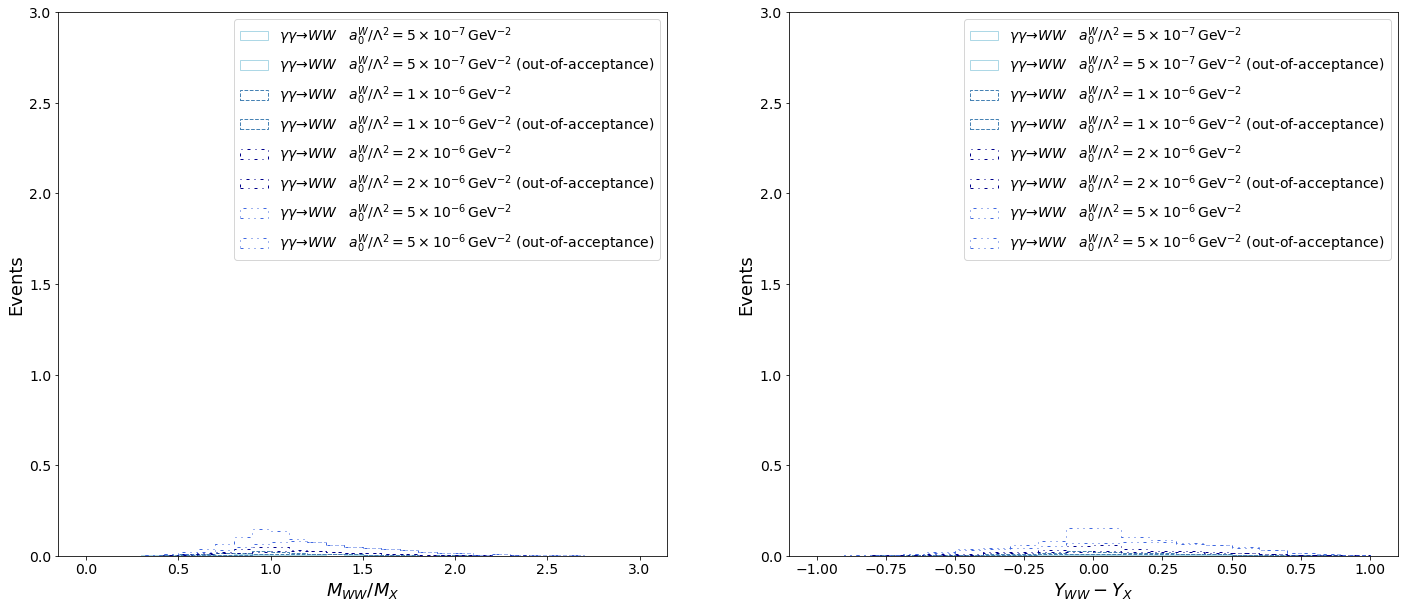

In [32]:
variation__ = "_nom"
var_str__ = {}
# var_str__[ "_nom" ] = "_nom_nom"
var_str__[ "_nom" ] = "_nom"
var_weights__ = "nom"

fig, axes = plt.subplots( 1, 2, figsize=(2*12,10) )

colors_ = [ "lightblue", "steelblue", "darkblue", "royalblue" ]

linestyles_ = [ "solid", "dashed", (0, (3, 5, 1, 5)), (0, (3, 5, 1, 5, 1, 5)) ]

for idx_, label_ in enumerate( labels_signals ):
    axes[0].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ][ "R_MWW_MX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ variation__ ],
              histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=labels_samples[ label_ ],
              bins=30, range=(0.,3.) )
    axes[0].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ variation__ ][ "R_MWW_MX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights__ ][ variation__ ],
              histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=( labels_samples[ label_ ] + " (out-of-acceptance)" ),
              bins=30, range=(0.,3.) )
    axes[1].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ][ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ variation__ ],
              histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=labels_samples[ label_ ],
              bins=20, range=(-1.,1.) )
    axes[1].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ variation__ ][ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights__ ][ variation__ ],
              histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=( labels_samples[ label_ ] + " (out-of-acceptance)" ),
              bins=20, range=(-1.,1.) )
axes[0].set_xlabel( r"$ M_{WW} / M_{X} $", fontsize=18 )
axes[0].set_ylabel( "Events", fontsize=18 )
axes[0].legend( loc='best', fontsize=14 )
axes[1].set_xlabel( r"$ Y_{WW} - Y_{X} $", fontsize=18 )
axes[1].set_ylabel( "Events", fontsize=18 )
axes[1].legend( loc='best', fontsize=14 )
    
axes[0].set_ylim( (0.,3.) )
axes[1].set_ylim( (0.,3.) )

if save_figures:
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix.png", bbox_inches='tight' )

In [33]:
# fig = plt.figure( figsize=(10,8) )

# colors_ = [ "lightblue", "steelblue", "darkblue" ]
# linestyles_ = [ "-", "--", "-." ]
# for idx_, label_ in enumerate( labels_signals ):
#     plt.hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ][ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ variation__ ],
#               histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=labels_samples[ label_ ],
#               bins=20, range=(-1.,1.) )
#     plt.hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ variation__ ][ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights__ ][ variation__ ],
#               histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=( labels_samples[ label_ ] + " (out-of-acceptance)" ),
#               bins=20, range=(-1.,1.) )
# plt.xlabel( r"$ Y_{WW} - Y_{X} $", fontsize=18 )
# plt.ylabel( "Events", fontsize=18 )
# plt.legend( loc='best', fontsize=14 )
    
# plt.ylim( (0.,3.) )

2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix


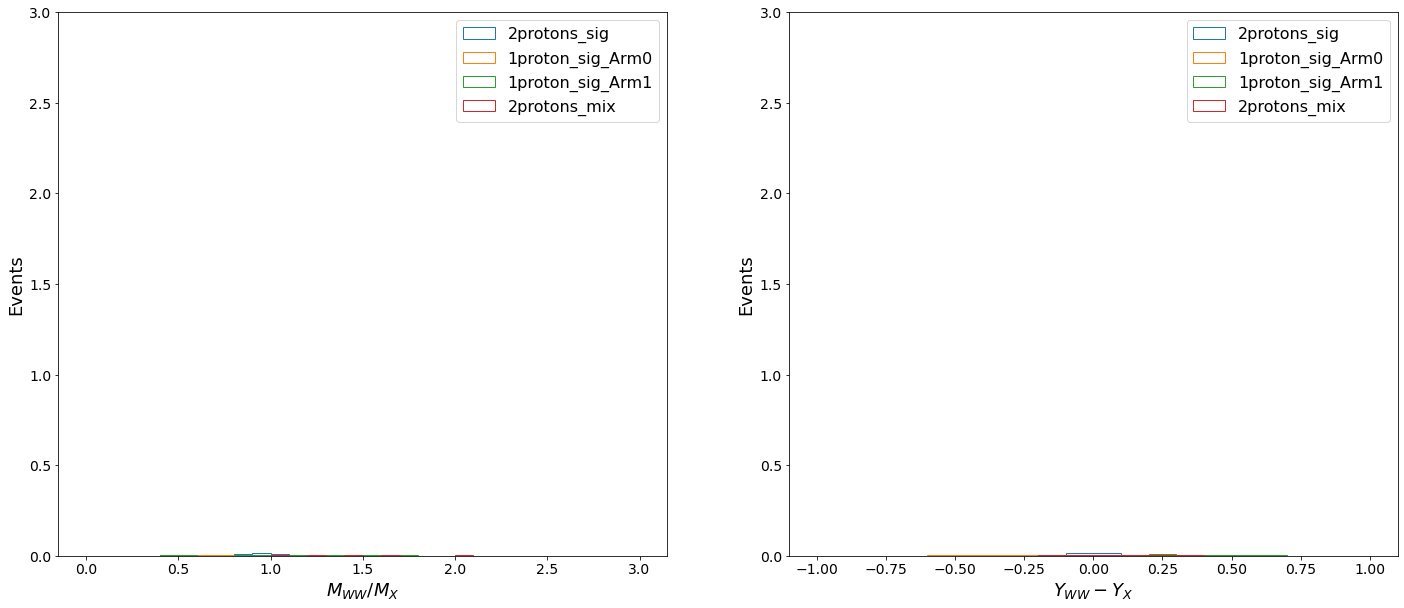

In [34]:
label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

fig, axes = plt.subplots( 1, 2, figsize=(2*12,10) )
for key_ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
    print ( key_ )
    df_selected_events__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ key_ ][ variation__ ]
    axes[0].hist( df_selected_events__[ "R_MWW_MX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories[ label_ ][ var_weights__ ][ key_ ][ variation__ ],
              histtype='step', label=key_,
              bins=30, range=(0.,3.) )
    axes[1].hist( df_selected_events__[ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories[ label_ ][ var_weights__ ][ key_ ][ variation__ ],
              histtype='step', label=key_,
              bins=20, range=(-1.,1.) )
axes[0].set_xlabel( r"$ M_{WW} / M_{X} $", fontsize=18 )
axes[0].set_ylabel( "Events", fontsize=18 )
axes[0].legend( loc='best', fontsize=16 )
axes[1].set_xlabel( r"$ Y_{WW} - Y_{X} $", fontsize=18 )
axes[1].set_ylabel( "Events", fontsize=18 )
axes[1].legend( loc='best', fontsize=16 )
# plt.ylim( 0., 0.3 )
# plt.ylim( 0., 0.5 )
# plt.ylim( 0., 3. )
axes[0].set_ylim( 0., 3. )
axes[1].set_ylim( 0., 3. )

if save_figures:
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Categories.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Categories.png", bbox_inches='tight' )

In [35]:
# fig = plt.figure( figsize=(10,8) )
# for key_ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
#     print ( key_ )
#     df_selected_events__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ key_ ][ variation__ ]
#     plt.hist( df_selected_events__[ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories[ label_ ][ var_weights__ ][ key_ ][ variation__ ],
#               histtype='step', label=key_,
#               bins=20, range=(-1.,1.) )
# plt.xlabel( r"$ Y_{WW} - Y_{X} $", fontsize=18 )
# plt.ylabel( "Events", fontsize=18 )
# plt.legend( loc='best', fontsize=16 )
# plt.ylim( 0., 0.3 )
# # plt.ylim( 0., 0.5 )
# # plt.ylim( 0., 3. )

GGToWW-AQGC-2018-electron-A0W5e-7
Number of events: 0.0626488208085674 +/- 0.0033644294860762885
Number of events (A): 0.035582566666728654 +/- 0.002536173327733353
Number of events (B): 0.018345768836256465 +/- 0.0018170709592740567
Number of events (C): 0.003122694225354573 +/- 0.0007576723167884747
Number of events (D): 0.005597791080227695 +/- 0.0010056820609957843
0 0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


GGToWW-AQGC-2018-electron-A0W1e-6
Number of events: 0.16328715126448715 +/- 0.006066580184852125
Number of events (A): 0.1168906391507582 +/- 0.005137930527006755
Number of events (B): 0.027296754746868712 +/- 0.0024719759804065224
Number of events (C): 0.009245389687236063 +/- 0.0014444813234844
Number of events (D): 0.009854367679624165 +/- 0.0014858914823399824
0 1


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


GGToWW-AQGC-2018-electron-A0W2e-6
Number of events: 0.34314870785516405 +/- 0.007877679032151088
Number of events (A): 0.26662098807506296 +/- 0.006949903171970879
Number of events (B): 0.047847861217763174 +/- 0.0029291334461066946
Number of events (C): 0.020056766872027662 +/- 0.0019043870465368282
Number of events (D): 0.008623091690310225 +/- 0.001245054242072957
1 0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


GGToWW-AQGC-2018-electron-A0W5e-6
Number of events: 0.9990804001925966 +/- 0.015220873989912408
Number of events (A): 0.7911810453903438 +/- 0.013550441220130681
Number of events (B): 0.12308977365132101 +/- 0.005328464729853814
Number of events (C): 0.07058124245977321 +/- 0.004049841580807737
Number of events (D): 0.014228338691158545 +/- 0.001807427605642897
1 1


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


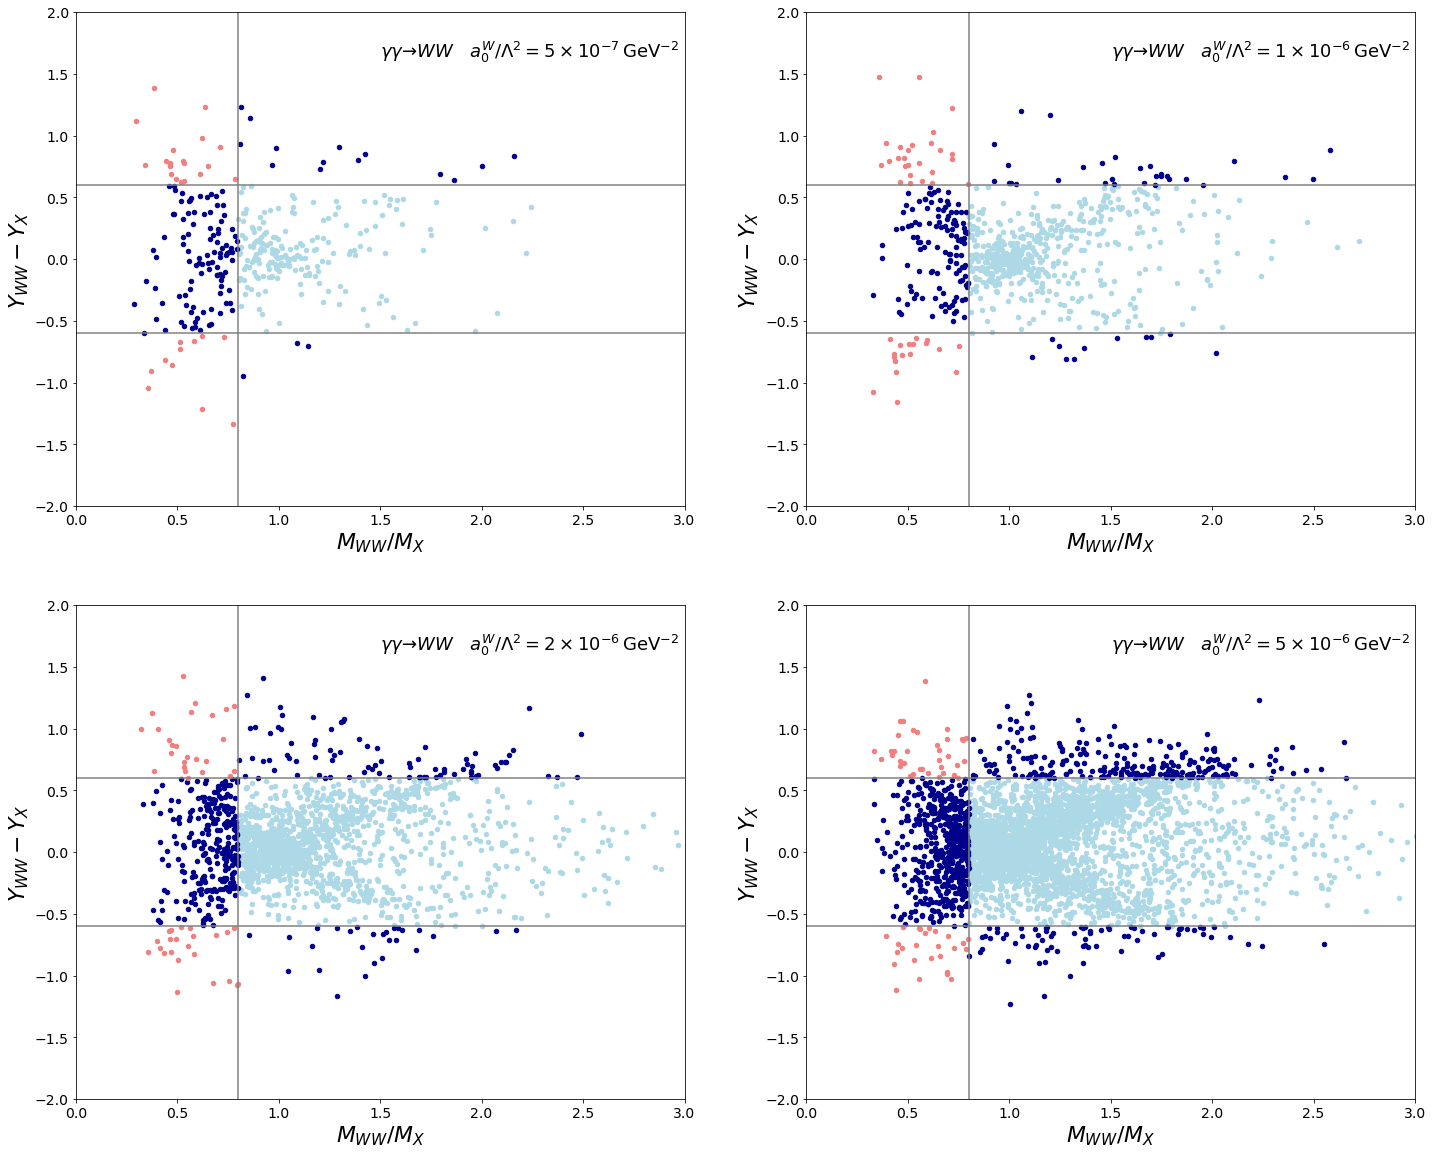

In [36]:
variation__ = "_nom"
var_weights__ = "nom"

nrows_ = ( int( len(labels_signals)/2 ) + 1 if ( len(labels_signals) % 2 ) > 0 else int( len(labels_signals)/2 ) )
fig, axes = plt.subplots( nrows_, 2, figsize=(2*12,nrows_*10) )

row_ = 0
col_ = 0
for label_ in labels_signals:
    print ( label_ )
    df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ]
    weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ variation__ ]
    var1__ = ( "R_MWW_MX" + var_str__[ "_nom" ] )
    var2__ = ( "Diff_YWW_YX" + var_str__[ "_nom" ] )
    
    msk_sig_cut1 = ( df__[ var1__ ] >= 0.80  )
    msk_sig_cut2 = ( np.abs( df__[ var2__ ] ) <= 0.60 )
    msk_sig_A =  msk_sig_cut1 &  msk_sig_cut2
    msk_sig_B = ~msk_sig_cut1 &  msk_sig_cut2
    msk_sig_C =  msk_sig_cut1 & ~msk_sig_cut2
    msk_sig_D = ~msk_sig_cut1 & ~msk_sig_cut2

    n_events_sig   = np.sum( weights__ )
    err_n_events_sig = np.sqrt( np.sum( weights__ ** 2 ) )
    n_events_sig_A = np.sum( weights__[ msk_sig_A ] )
    err_n_events_sig_A = np.sqrt( np.sum( weights__[ msk_sig_A ] ** 2 ) )
    n_events_sig_B = np.sum( weights__[ msk_sig_B ] )
    err_n_events_sig_B = np.sqrt( np.sum( weights__[ msk_sig_B ] ** 2 ) )
    n_events_sig_C = np.sum( weights__[ msk_sig_C ] )
    err_n_events_sig_C = np.sqrt( np.sum( weights__[ msk_sig_C ] ** 2 ) )
    n_events_sig_D = np.sum( weights__[ msk_sig_D ] )
    err_n_events_sig_D = np.sqrt( np.sum( weights__[ msk_sig_D ] ** 2 ) )

    print ( "Number of events: {} +/- {}".format( n_events_sig, err_n_events_sig ) )
    print ( "Number of events (A): {} +/- {}".format( n_events_sig_A, err_n_events_sig_A ) )
    print ( "Number of events (B): {} +/- {}".format( n_events_sig_B, err_n_events_sig_B ) )
    print ( "Number of events (C): {} +/- {}".format( n_events_sig_C, err_n_events_sig_C ) )
    print ( "Number of events (D): {} +/- {}".format( n_events_sig_D, err_n_events_sig_D ) )

    x_min =  0.
    x_max =  3.0
    y_min = -2.0
    y_max =  2.0
    x_cut = 0.80
    y_cut = 0.60

    print ( row_, col_ )
    axes[ row_, col_ ].plot( (x_min,x_max), (-y_cut,-y_cut), color='gray' )
    axes[ row_, col_ ].plot( (x_min,x_max), (y_cut,y_cut), color='gray' )
    axes[ row_, col_ ].plot( (x_cut,x_cut), (y_min,y_max), color='gray' )
    if np.sum( msk_sig_A ) > 0:
        df__[ msk_sig_A ].plot( var1__, var2__, 'scatter', ax=axes[ row_, col_ ], color='lightblue' )
    if np.sum( msk_sig_B ) > 0:
        df__[ msk_sig_B ].plot( var1__, var2__, 'scatter', ax=axes[ row_, col_ ], color='darkblue' )
    if np.sum( msk_sig_C ) > 0:
        df__[ msk_sig_C ].plot( var1__, var2__, 'scatter', ax=axes[ row_, col_ ], color='darkblue' )
    if np.sum( msk_sig_D ) > 0:
        df__[ msk_sig_D ].plot( var1__, var2__, 'scatter', ax=axes[ row_, col_ ], color='lightcoral' )
    title_str_ = labels_samples[ label_ ]
    axes[ row_, col_ ].text( 0.50, 0.92, title_str_, horizontalalignment='left', verticalalignment='center', transform=axes[ row_, col_ ].transAxes, fontsize=18 )
    axes[ row_, col_ ].set_xlim(x_min, x_max)
    axes[ row_, col_ ].set_ylim(y_min, y_max)
    axes[ row_, col_ ].set_xlabel( r"$M_{WW} / M_{X}$", fontsize=22 )
    axes[ row_, col_ ].set_ylabel( r"$Y_{WW} - Y_{X}$", fontsize=22 )
    col_ += 1
    if col_ >= 2:
        row_ += 1
        col_  = 0
if col_ == 1: axes[ row_, col_ ].axis('off')
    
if save_figures:
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Signal.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Signal.png", bbox_inches='tight' )

In [37]:
# label_ = "GGToWW-AQGC-A0W5e-6"
# fig = plt.figure( figsize=(12,10) )
# for key_ in df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ]:
#     print ( key_ )
#     df_selected_events__ = df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ][ key_ ]
#     plt.hist( df_selected_events__[ "ratioMWW_MX" ], weights=weights_out_acceptance_misreconstructed[ label_ ][ key_ ],
#               histtype='step', label=key_,
#               bins=20, range=(0.,2.) )
# plt.legend( loc='best', fontsize=16 )

In [38]:
# fig = plt.figure( figsize=(10,8) )

# colors_ = [ "lightblue", "steelblue", "darkblue" ]
# linestyles_ = [ "-", "--", "-." ]
# for idx_, label_ in enumerate( labels_signals ):
#     plt.hist( df_signals_protons_multiRP_events[ label_ ][ "ratioMWW_MX" ], weights=weights_mc[ label_ ],
#               histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=labels_samples[ label_ ],
#               bins=30, range=(0.,3.) )
#     plt.hist( df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events_concat[ label_ ][ "ratioMWW_MX" ],
#               weights=weights_out_acceptance_misreconstructed_concat[ label_ ],
#               histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=( labels_samples[ label_ ] + " (out-of-acceptance)" ),
#               bins=30, range=(0.,3.) )


# plt.legend( loc='best', fontsize=16 )
    
# plt.ylim( (0.,3.) )

# if save_figures:
#     plt.savefig( "plots/Ratio_MWW_MX_signals.pdf", bbox_inches='tight' )
#     plt.savefig( "plots/Ratio_MWW_MX_signals.png", bbox_inches='tight' )

In [39]:
from scipy.interpolate import make_interp_spline

relative_uncertainty_ = True

vars_ = {}
vars_[ "R_MWW_MX" ] = {}
# vars_[ "R_MWW_MX" ][ "bins" ]  = 30
# # vars_[ "R_MWW_MX" ][ "bins" ]  = 15
# vars_[ "R_MWW_MX" ][ "range" ] = (0.,3.)
# vars_[ "R_MWW_MX" ][ "xlim" ]  = (0.5,2.)
vars_[ "R_MWW_MX" ][ "bins" ]  = 0.6 + 0.2 * np.arange( 8 )
vars_[ "R_MWW_MX" ][ "range" ] = None
vars_[ "R_MWW_MX" ][ "xlim" ]  = ( 0.6, 2. )
vars_[ "R_MWW_MX" ][ "xtitle" ]  = r"$M_{WW} / M_{X}$"
vars_[ "Diff_YWW_YX" ] = {}
# vars_[ "Diff_YWW_YX" ][ "bins" ]  = 20
# # vars_[ "Diff_YWW_YX" ][ "bins" ]  = 10
# vars_[ "Diff_YWW_YX" ][ "range" ] = (-1.,1.)
# vars_[ "Diff_YWW_YX" ][ "xlim" ]  = (-1.,1.)
# vars_[ "Diff_YWW_YX" ][ "bins" ]  = -1. + 0.2 * np.arange( 11 )
# vars_[ "Diff_YWW_YX" ][ "bins" ]  = -1. + 0.4 * np.arange( 6 )
vars_[ "Diff_YWW_YX" ][ "bins" ]  = -0.6 + 0.4 * np.arange( 4 )
vars_[ "Diff_YWW_YX" ][ "range" ] = None
# vars_[ "Diff_YWW_YX" ][ "xlim" ]  = ( -1., 1. )
vars_[ "Diff_YWW_YX" ][ "xlim" ]  = ( -0.60, 0.60 )
vars_[ "Diff_YWW_YX" ][ "xtitle" ]  = r"$Y_{WW} - Y_{X}$"

# ylim_ = (0.,0.2)
# ylim_ = (0.,0.5)
# ylim_ = (0.,1.)
ylim_ = (0.,3.)
# ylim_ = (0.,5.)

color_ = "darkblue"

def plot_uncertainties_variations(df_dict, weights_dict, variables, variations, selection_dict, scale_variation, label, var_info, ylim, ylim_ratio, color, relative_uncertainty):

    __df_dict = df_dict
    __weights_dict = weights_dict
    vars_ = variables
    __variations = variations
    sel_str__ = selection_dict
#     var_weights__ = var_weights
    scale_variation_=scale_variation
    label_ = label
    vars_ = var_info
    ylim_ = ylim
    color_ = color
    relative_uncertainty_ = relative_uncertainty

    max_ = {}
    min_ = {}
    spline_nom_ = {}
    spline_max_ = {}
    spline_min_ = {}
    spline_nom_arr_ = {}
    spline_max_arr_ = {}
    spline_min_arr_ = {}
    idx_row_ = 0
    idx_col_ = 0

    fig_, axes_ = plt.subplots( 2, 2, figsize=(2*10,2*8) )

    print ( label_ )
    for var__ in vars_:
        print ( var__ )
        max_[ var__ ] = None
        min_[ var__ ] = None
        for idx_, variation__ in enumerate( __variations ):
            __variation__ = variation__ if not scale_variation_ else "_nom"
            __sel_str__ = sel_str__[ __variation__ ] if not scale_variation_ else "_nom"
            __var_weights__ = variation__ if scale_variation_ else "nom"
            if variation__ != "_nom" and variation__ != "nom":
                print ( __variation__ )
                print ( __sel_str__ )
                print ( __var_weights__ )
                df__ = __df_dict[ label_ ][ __sel_str__ ]
                weights__ = __weights_dict[ label_ ][ __var_weights__ ][ __sel_str__ ]
                arr__ = df__[ var__ + __variation__ ]
                
                arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + __variation__ ]
                msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
                arr__ = arr__.loc[ msk__ ]
                weights__ = weights__.loc[ msk__ ]
                counts_, bins_ = np.histogram( arr__, weights=weights__, bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )

                if max_[ var__ ] is None: max_[ var__ ] = counts_.copy()
                if min_[ var__ ] is None: min_[ var__ ] = counts_.copy()
                msk__ = counts_ > max_[ var__ ]
                max_[ var__ ][ msk__ ] = counts_[ msk__ ]
                msk__ = counts_ < min_[ var__ ]
                min_[ var__ ][ msk__ ] = counts_[ msk__ ]

        print ( max_[ var__ ] )
        print ( min_[ var__ ] )
        idx_row_ = 0
        df__ = __df_dict[ label_ ][ "_nom" ]
        arr__ = df__[ var__ + "_nom" ]
        weights__ = __weights_dict[ label_ ][ "nom" ][ "_nom" ]
        arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
        arr__ = arr__.loc[ msk__ ]
        weights__ = weights__.loc[ msk__ ]
        counts_, bins_, _ = axes_[idx_row_,idx_col_].hist( arr__, 
                                                           weights=weights__,
                                                           histtype='step', color=color_, linestyle="-", label="_nom",
                                                           bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

        spline_nom_[ var__ ] = make_interp_spline( bin_centers_, counts_, k=2 )
        spline_max_[ var__ ] = make_interp_spline( bin_centers_, max_[ var__ ], k=2 )
        spline_min_[ var__ ] = make_interp_spline( bin_centers_, min_[ var__ ], k=2 )
        x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
        spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
        spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
        spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )

        axes_[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
        axes_[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
        axes_[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
        axes_[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
        axes_[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes_[idx_row_,idx_col_].set_ylim( ylim_ )

        idx_row_ = 1
        if relative_uncertainty_:
            ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_max_sel_ = pd.Series( ratio_max_ )
            ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            ratio_min_sel_ = pd.Series( ratio_min_ )
            ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            print ( ratio_max_sel_, ratio_max_sel_.mean() )
            print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
            axes_[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
            axes_[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
            axes_[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
        else:
            diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            axes_[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
            axes_[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
            axes_[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
        axes_[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        # axes_[idx_row_,idx_col_].set_ylim( -1., 1. )
        axes_[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
        idx_col_ += 1
        
    return ( max_, min_ )

In [40]:
def calculate_uncertainties_variations(df_dict, weights_dict, variations, selection_dict, scale_variation):
    
    __df_dict = df_dict
    __weights_dict = weights_dict
    variations_ = variations
    sel_str__ = selection_dict
    scale_variation_=scale_variation
    
    sum_weights_cut = {}
    sum_weights_squared_cut = {}
    sum_weights_cut_max = {}
    sum_weights_cut_min = {}
    for label_ in labels_signals:
        print ( label_ )
        sum_weights_cut_max_ = None
        sum_weights_cut_min_ = None
        for idx_, variation__ in enumerate( variations_ ):
            __variation__ = variation__ if not scale_variation_ else "_nom"
            __sel_str__ = sel_str__[ __variation__ ] if not scale_variation_ else "_nom"
            __var_weights__ = variation__ if scale_variation_ else "nom"
            if variation__ != "_nom" and variation__ != "nom":
                print ( __variation__ )
                print ( __sel_str__ )
                print ( __var_weights__ )
                df__ = __df_dict[ label_ ][ __sel_str__ ]
                weights__ = __weights_dict[ label_ ][ __var_weights__ ][ __sel_str__ ]
                arr_R_MWW_MX__ = df__.loc[ :, "R_MWW_MX" + __variation__ ]
                arr_Diff_YWW_YX__ = df__.loc[ :, "Diff_YWW_YX" + __variation__ ]
                msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) & ( arr_R_MWW_MX__ >= 0.80 ) )
                sum_weights_cut__ = np.sum( weights__.loc[ msk__ ] )
                if sum_weights_cut_max_ is None:
                    sum_weights_cut_max_ = sum_weights_cut__
                if sum_weights_cut_min_ is None:
                    sum_weights_cut_min_ = sum_weights_cut__
                if sum_weights_cut__ > sum_weights_cut_max_:
                    sum_weights_cut_max_ = sum_weights_cut__
                if sum_weights_cut__ < sum_weights_cut_min_:
                    sum_weights_cut_min_ = sum_weights_cut__

        df__ = __df_dict[ label_ ][ "_nom" ]
        weights__ = __weights_dict[ label_ ][ "nom" ][ "_nom" ]
        weights_squared__ = ( weights__ ** 2 )
        arr_R_MWW_MX__ = df__.loc[ :, "R_MWW_MX" + "_nom" ]
        arr_Diff_YWW_YX__ = df__.loc[ :, "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) & ( arr_R_MWW_MX__ >= 0.80 ) )
        sum_weights_cut__ = np.sum( weights__.loc[ msk__ ] )
        sum_weights_squared_cut__ = np.sum( weights_squared__.loc[ msk__ ] )
        print ( "{} ± {}".format( sum_weights_cut__, np.sqrt( sum_weights_squared_cut__ ) ) )
        print ( sum_weights_cut_max_ )
        print ( sum_weights_cut_min_ )
        sum_weights_cut[ label_ ] = sum_weights_cut__
        sum_weights_squared_cut[ label_ ] = sum_weights_squared_cut__
        sum_weights_cut_max[ label_ ] = sum_weights_cut_max_
        sum_weights_cut_min[ label_ ] = sum_weights_cut_min_

    print ( sum_weights_cut )
    print ( sum_weights_squared_cut )
    print ( sum_weights_cut_max )
    print ( sum_weights_cut_min )
    
    return ( sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min )

In [41]:
label_ref_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ref_ = "GGToWW-AQGC-A0W2e-6"
#         label_ref_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ref_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ref_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ref_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
if data_sample == '2018':
    if lepton_type == 'muon':
        label_ref_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ref_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

GGToWW-AQGC-2018-electron-A0W1e-6
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[0.01973113 0.03937696 0.03483643 0.01594025 0.01334119 0.00724598
 0.00297943]
[0.01973113 0.03937696 0.03460999 0.01527207 0.01289231 0.00724598
 0.00297943]
0      0.000000
1     -0.000185
2     -0.000342
3     -0.000477
4     -0.000591
         ...   
195   -0.009653
196   -0.007706
197   -0.005463
198   -0.002901
199    0.000000
Length: 200, dtype: float64 0.010450553428563459
0      0.000000
1     -0.000043
2     -0.000079
3     -0.000110
4     -0.000136
         ...   
195   -0.000956
196   -0.000763
197   -0.000541
198   -0.000287
199    0.000000
Length: 200, dtype: float64 -0.00238359664252936
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[0.02375016 0.07802794 0.04330801]
[0.02352866 0.07802794 0.04263888]
0      0.009414
1      0.008759
2      0.008161
3      0.007614
4      0.007112
         ...   
195    0.013817
196    0.014300
197    0.014804
198    0.015332
199    0.015886
Length: 2

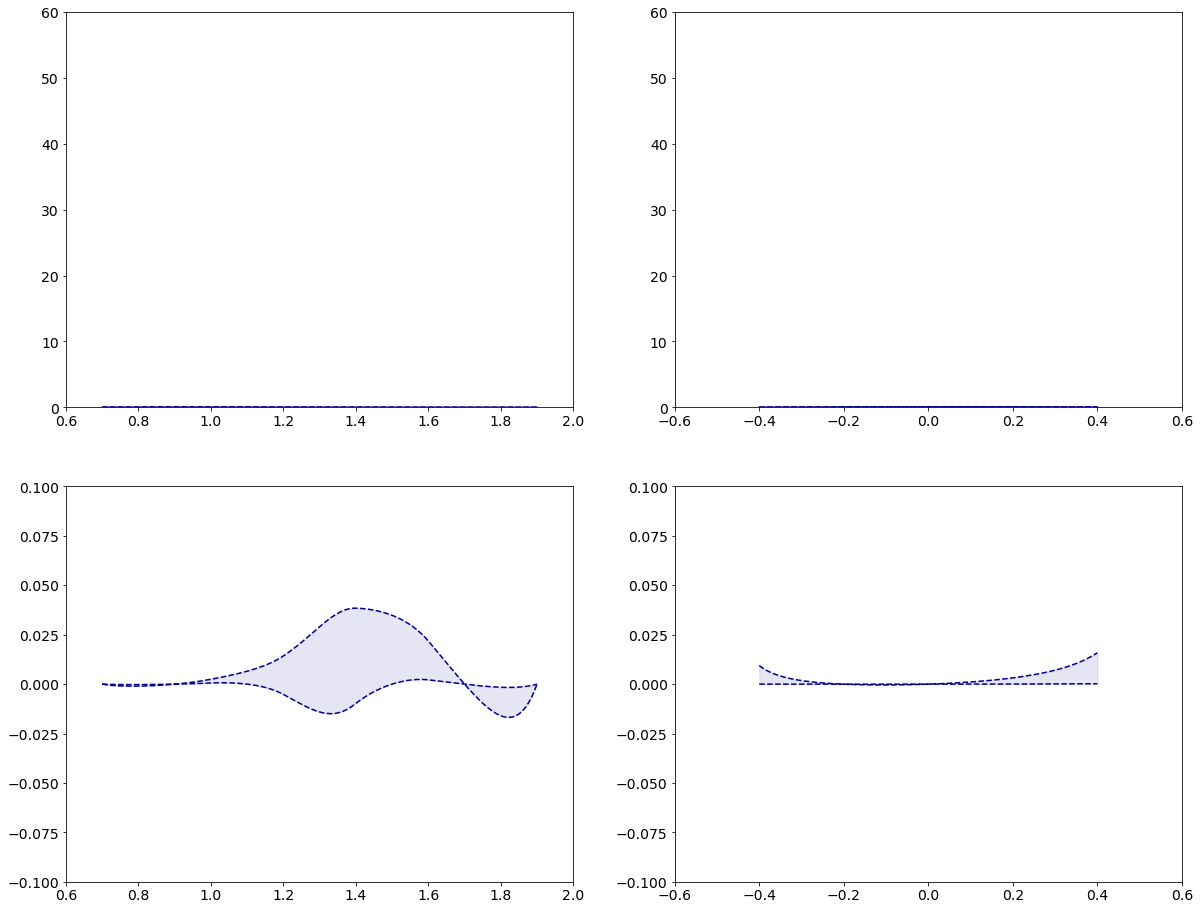

In [42]:
variations_ = [ "_nom", "_jes_up", "_jes_dw" ]

sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = key_

# var_weights__ = "nom"

relative_uncertainty_ = True

# ylim_ = (0.,1.)
ylim_ = (0.,60.)
ylim_ratio_ = (-0.10,0.10)

color_ = "darkblue"

max_, min_ = plot_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variables=vars_,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False,
    label=label_ref_,
    var_info=vars_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_,
    relative_uncertainty=relative_uncertainty_)

print ( max_, min_ )

In [43]:
max_variations = {}
min_variations = {}
max_variations[ "jes" ] = max_
min_variations[ "jes" ] = min_
print ( max_variations )
print ( min_variations )

{'jes': {'R_MWW_MX': array([0.01973113, 0.03937696, 0.03483643, 0.01594025, 0.01334119,
       0.00724598, 0.00297943]), 'Diff_YWW_YX': array([0.02375016, 0.07802794, 0.04330801])}}
{'jes': {'R_MWW_MX': array([0.01973113, 0.03937696, 0.03460999, 0.01527207, 0.01289231,
       0.00724598, 0.00297943]), 'Diff_YWW_YX': array([0.02352866, 0.07802794, 0.04263888])}}


In [44]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False
    )

GGToWW-AQGC-2018-electron-A0W5e-7
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
0.035582566666728654 ± 0.002536173327733353
0.035582566666728654
0.03540537014591082
GGToWW-AQGC-2018-electron-A0W1e-6
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
0.1168906391507582 ± 0.005137930527006755
0.11778935484670744
0.11689872575011728
GGToWW-AQGC-2018-electron-A0W2e-6
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
0.26662098807506296 ± 0.006949903171970879
0.2682343264344732
0.26553067615539067
GGToWW-AQGC-2018-electron-A0W5e-6
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
0.7911810453903438 ± 0.013550441220130681
0.7930888065058357
0.7888449664407775
{'GGToWW-AQGC-2018-electron-A0W5e-7': 0.035582566666728654, 'GGToWW-AQGC-2018-electron-A0W1e-6': 0.1168906391507582, 'GGToWW-AQGC-2018-electron-A0W2e-6': 0.26662098807506296, 'GGToWW-AQGC-2018-electron-A0W5e-6': 0.7911810453903438}
{'GGToWW-AQGC-2018-electron-A0W5e-7': 6.432175148306071e-06, 'GGToWW-AQGC-2018-electron-A0W1e-6': 2.6398330100347908e-05, 'GGToWW-AQGC-2018-ele

In [45]:
sum_weights = {}
for label_ in labels_signals:
    sum_weights[ label_ ] = {}
    sum_weights[ label_ ][ "central" ]        = sum_weights_cut[ label_ ]
    sum_weights[ label_ ][ "stat" ]           = np.sqrt( sum_weights_squared_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_up_jes" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_jes" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-electron-A0W5e-7': {'central': 0.035582566666728654, 'stat': 0.002536173327733353, 'syst_up_jes': 0.0, 'syst_dw_jes': -0.00017719652081783777}, 'GGToWW-AQGC-2018-electron-A0W1e-6': {'central': 0.1168906391507582, 'stat': 0.005137930527006755, 'syst_up_jes': 0.0008987156959492371, 'syst_dw_jes': 8.086599359080626e-06}, 'GGToWW-AQGC-2018-electron-A0W2e-6': {'central': 0.26662098807506296, 'stat': 0.006949903171970879, 'syst_up_jes': 0.0016133383594102435, 'syst_dw_jes': -0.0010903119196722932}, 'GGToWW-AQGC-2018-electron-A0W5e-6': {'central': 0.7911810453903438, 'stat': 0.013550441220130681, 'syst_up_jes': 0.0019077611154918461, 'syst_dw_jes': -0.0023360789495663337}}


GGToWW-AQGC-2018-electron-A0W1e-6
R_MWW_MX
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
[0.01995098 0.03937696 0.03483643 0.01594779 0.01289231 0.00724598
 0.00297943]
[0.01973113 0.03937696 0.03460999 0.01549042 0.01289231 0.00724598
 0.00297943]
0      0.011142
1      0.009955
2      0.008903
3      0.007967
4      0.007129
         ...   
195    0.001830
196    0.001461
197    0.001035
198    0.000550
199    0.000000
Length: 200, dtype: float64 0.006526407258865206
0      0.000000e+00
1      0.000000e+00
2      0.000000e+00
3      0.000000e+00
4      0.000000e+00
           ...     
195    6.488014e-16
196    5.341588e-16
197    2.748649e-16
198    1.414388e-16
199    0.000000e+00
Length: 200, dtype: float64 -2.8075293039120504e-16
Diff_YWW_YX
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
[0.02375016 0.07802794 0.04286667]
[0.02374851 0.07802794 0.04285723]
0      0.009414
1      0.008848
2      0.008332
3      0.007858
4      0.007422
         ...   
195    0.004752
196    0.004934
197    0.0

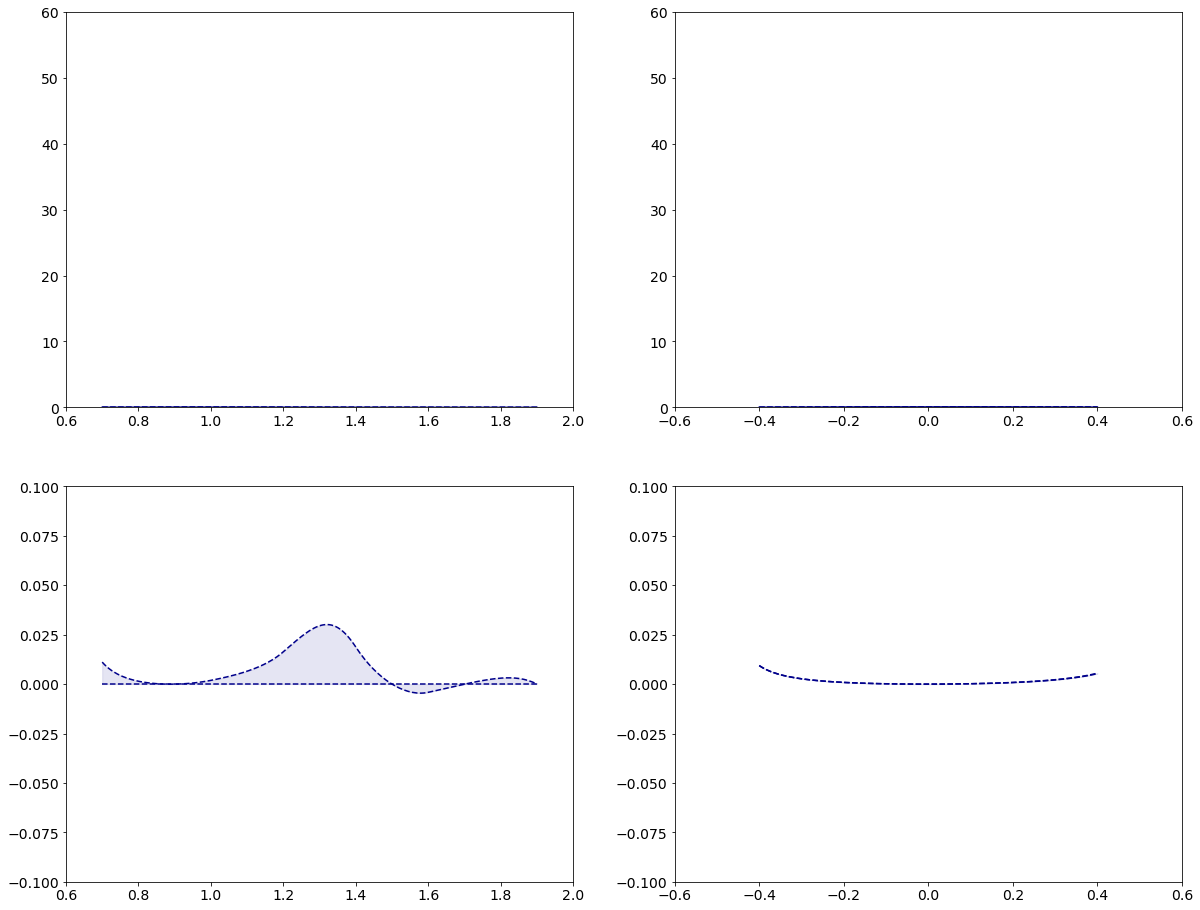

In [46]:
variations_ = [ "_nom", "_jer_up", "_jer_dw" ]

sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = key_

relative_uncertainty_ = True

# ylim_ = (0.,1.)
ylim_ = (0.,60.)
ylim_ratio_ = (-0.10,0.10)

color_ = "darkblue"

max_, min_ = plot_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variables=vars_,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False,
    label=label_ref_,
    var_info=vars_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_,
    relative_uncertainty=relative_uncertainty_)

print ( max_, min_ )

In [47]:
max_variations[ "jer" ] = max_
min_variations[ "jer" ] = min_
print ( max_variations )
print ( min_variations )

{'jes': {'R_MWW_MX': array([0.01973113, 0.03937696, 0.03483643, 0.01594025, 0.01334119,
       0.00724598, 0.00297943]), 'Diff_YWW_YX': array([0.02375016, 0.07802794, 0.04330801])}, 'jer': {'R_MWW_MX': array([0.01995098, 0.03937696, 0.03483643, 0.01594779, 0.01289231,
       0.00724598, 0.00297943]), 'Diff_YWW_YX': array([0.02375016, 0.07802794, 0.04286667])}}
{'jes': {'R_MWW_MX': array([0.01973113, 0.03937696, 0.03460999, 0.01527207, 0.01289231,
       0.00724598, 0.00297943]), 'Diff_YWW_YX': array([0.02352866, 0.07802794, 0.04263888])}, 'jer': {'R_MWW_MX': array([0.01973113, 0.03937696, 0.03460999, 0.01549042, 0.01289231,
       0.00724598, 0.00297943]), 'Diff_YWW_YX': array([0.02374851, 0.07802794, 0.04285723])}}


In [48]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False
    )

GGToWW-AQGC-2018-electron-A0W5e-7
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
0.035582566666728654 ± 0.002536173327733353
0.035582566666728654
0.035582566666728654
GGToWW-AQGC-2018-electron-A0W1e-6
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
0.1168906391507582 ± 0.005137930527006755
0.11734801001343131
0.11711707424918696
GGToWW-AQGC-2018-electron-A0W2e-6
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
0.26662098807506296 ± 0.006949903171970879
0.2673385734643827
0.26607234794799484
GGToWW-AQGC-2018-electron-A0W5e-6
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
0.7911810453903438 ± 0.013550441220130681
0.790718010920504
0.7905140577760172
{'GGToWW-AQGC-2018-electron-A0W5e-7': 0.035582566666728654, 'GGToWW-AQGC-2018-electron-A0W1e-6': 0.1168906391507582, 'GGToWW-AQGC-2018-electron-A0W2e-6': 0.26662098807506296, 'GGToWW-AQGC-2018-electron-A0W5e-6': 0.7911810453903438}
{'GGToWW-AQGC-2018-electron-A0W5e-7': 6.432175148306071e-06, 'GGToWW-AQGC-2018-electron-A0W1e-6': 2.6398330100347908e-05, 'GGToWW-AQGC-2018-ele

In [49]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_jer" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_jer" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-electron-A0W5e-7': {'central': 0.035582566666728654, 'stat': 0.002536173327733353, 'syst_up_jes': 0.0, 'syst_dw_jes': -0.00017719652081783777, 'syst_up_jer': 0.0, 'syst_dw_jer': 0.0}, 'GGToWW-AQGC-2018-electron-A0W1e-6': {'central': 0.1168906391507582, 'stat': 0.005137930527006755, 'syst_up_jes': 0.0008987156959492371, 'syst_dw_jes': 8.086599359080626e-06, 'syst_up_jer': 0.0004573708626731121, 'syst_dw_jer': 0.0002264350984287622}, 'GGToWW-AQGC-2018-electron-A0W2e-6': {'central': 0.26662098807506296, 'stat': 0.006949903171970879, 'syst_up_jes': 0.0016133383594102435, 'syst_dw_jes': -0.0010903119196722932, 'syst_up_jer': 0.0007175853893197637, 'syst_dw_jer': -0.0005486401270681229}, 'GGToWW-AQGC-2018-electron-A0W5e-6': {'central': 0.7911810453903438, 'stat': 0.013550441220130681, 'syst_up_jes': 0.0019077611154918461, 'syst_dw_jes': -0.0023360789495663337, 'syst_up_jer': -0.0004630344698398625, 'syst_dw_jer': -0.0006669876143265974}}


GGToWW-AQGC-2018-electron-A0W1e-6
R_MWW_MX
_nom
_nom
sf_electron_id_up
_nom
_nom
sf_electron_id_dw
[0.02019821 0.04106394 0.03574926 0.01620053 0.01329068 0.00745666
 0.00308546]
[0.01926405 0.03768998 0.03347072 0.0147803  0.01249394 0.0070353
 0.00287339]
0      0.023672
1      0.025830
2      0.027737
3      0.029432
4      0.030944
         ...   
195    0.034326
196    0.034626
197    0.034937
198    0.035258
199    0.035590
Length: 200, dtype: float64 0.035767879490485155
0     -0.023672
1     -0.025830
2     -0.027737
3     -0.029432
4     -0.030944
         ...   
195   -0.034326
196   -0.034626
197   -0.034937
198   -0.035258
199   -0.035590
Length: 200, dtype: float64 -0.03576787949050117
Diff_YWW_YX
_nom
_nom
sf_electron_id_up
_nom
_nom
sf_electron_id_dw
[0.02413799 0.0807872  0.04421403]
[0.02291933 0.07526868 0.04104755]
0      0.025897
1      0.026402
2      0.026865
3      0.027289
4      0.027680
         ...   
195    0.037011
196    0.037042
197    0.037073
198    0.0

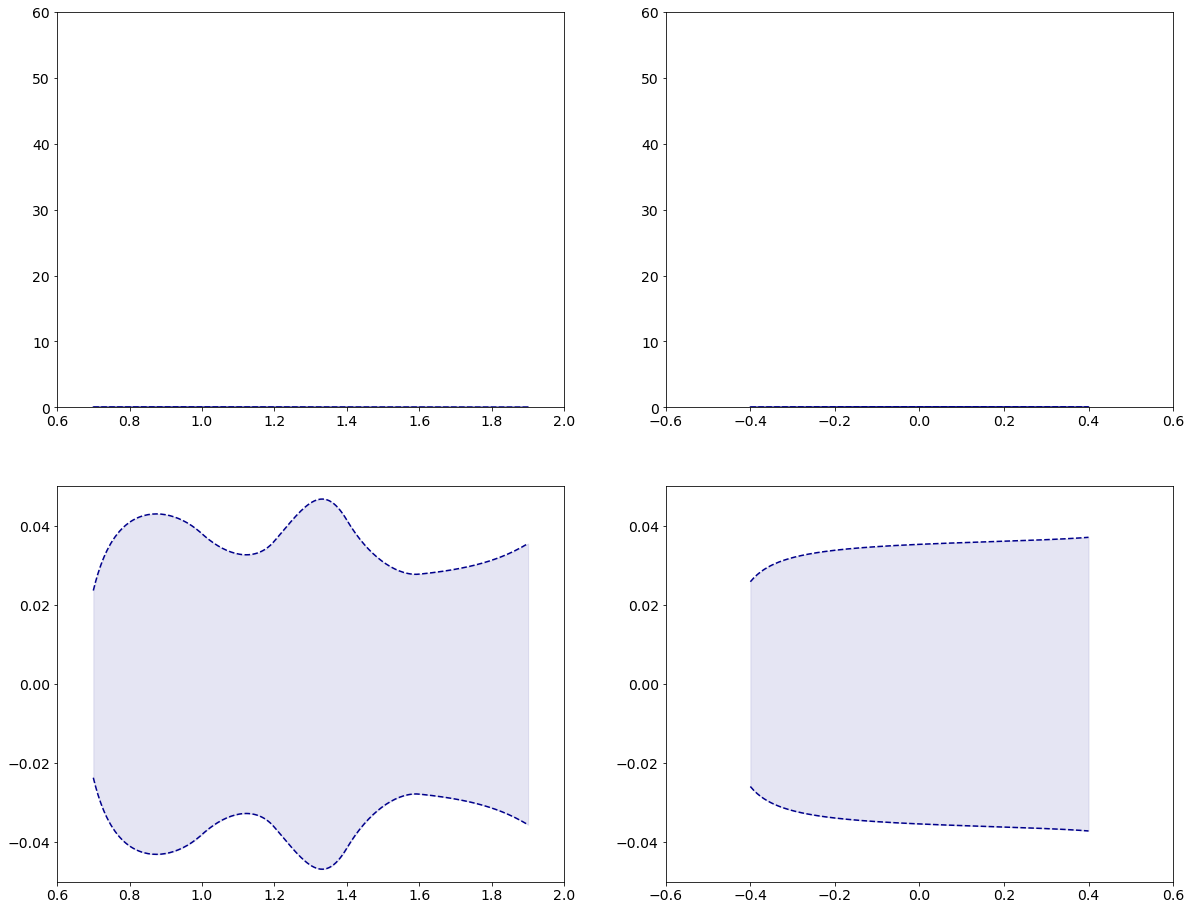

In [50]:
variations_weights_ = []
if lepton_type == 'muon':
    variations_weights_ = [ "nom", "sf_muon_id_up", "sf_muon_id_dw" ]
elif lepton_type == 'electron':
    variations_weights_ = [ "nom", "sf_electron_id_up", "sf_electron_id_dw" ]

relative_uncertainty_ = True

# ylim_ = (0.,1.)
ylim_ = (0.,60.)
ylim_ratio_ = (-0.05,0.05)

color_ = "darkblue"

max_, min_ = plot_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variables=vars_,
    variations=variations_weights_,
    selection_dict=None,
    scale_variation=True,
    label=label_ref_,
    var_info=vars_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_,
    relative_uncertainty=relative_uncertainty_)

print ( max_, min_ )

In [51]:
if lepton_type == 'muon':
    max_variations[ "sf_muon_id" ] = max_
    min_variations[ "sf_muon_id" ] = min_
elif lepton_type == 'electron':
    max_variations[ "sf_electron_id" ] = max_
    min_variations[ "sf_electron_id" ] = min_
print ( max_variations )
print ( min_variations )

{'jes': {'R_MWW_MX': array([0.01973113, 0.03937696, 0.03483643, 0.01594025, 0.01334119,
       0.00724598, 0.00297943]), 'Diff_YWW_YX': array([0.02375016, 0.07802794, 0.04330801])}, 'jer': {'R_MWW_MX': array([0.01995098, 0.03937696, 0.03483643, 0.01594779, 0.01289231,
       0.00724598, 0.00297943]), 'Diff_YWW_YX': array([0.02375016, 0.07802794, 0.04286667])}, 'sf_electron_id': {'R_MWW_MX': array([0.02019821, 0.04106394, 0.03574926, 0.01620053, 0.01329068,
       0.00745666, 0.00308546]), 'Diff_YWW_YX': array([0.02413799, 0.0807872 , 0.04421403])}}
{'jes': {'R_MWW_MX': array([0.01973113, 0.03937696, 0.03460999, 0.01527207, 0.01289231,
       0.00724598, 0.00297943]), 'Diff_YWW_YX': array([0.02352866, 0.07802794, 0.04263888])}, 'jer': {'R_MWW_MX': array([0.01973113, 0.03937696, 0.03460999, 0.01549042, 0.01289231,
       0.00724598, 0.00297943]), 'Diff_YWW_YX': array([0.02374851, 0.07802794, 0.04285723])}, 'sf_electron_id': {'R_MWW_MX': array([0.01926405, 0.03768998, 0.03347072, 0.014780

In [52]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_weights_,
    selection_dict=None,
    scale_variation=True
    )

GGToWW-AQGC-2018-electron-A0W5e-7
_nom
_nom
sf_electron_id_up
_nom
_nom
sf_electron_id_dw
0.035582566666728654 ± 0.002536173327733353
0.037192636405529986
0.03397249692792732
GGToWW-AQGC-2018-electron-A0W1e-6
_nom
_nom
sf_electron_id_up
_nom
_nom
sf_electron_id_dw
0.1168906391507582 ± 0.005137930527006755
0.12126258696235018
0.11251869133916623
GGToWW-AQGC-2018-electron-A0W2e-6
_nom
_nom
sf_electron_id_up
_nom
_nom
sf_electron_id_dw
0.26662098807506296 ± 0.006949903171970879
0.2784545666134781
0.2547874095366477
GGToWW-AQGC-2018-electron-A0W5e-6
_nom
_nom
sf_electron_id_up
_nom
_nom
sf_electron_id_dw
0.7911810453903438 ± 0.013550441220130681
0.8209573754270428
0.761404715353645
{'GGToWW-AQGC-2018-electron-A0W5e-7': 0.035582566666728654, 'GGToWW-AQGC-2018-electron-A0W1e-6': 0.1168906391507582, 'GGToWW-AQGC-2018-electron-A0W2e-6': 0.26662098807506296, 'GGToWW-AQGC-2018-electron-A0W5e-6': 0.7911810453903438}
{'GGToWW-AQGC-2018-electron-A0W5e-7': 6.432175148306071e-06, 'GGToWW-AQGC-2018-el

In [53]:
for label_ in labels_signals:
    if lepton_type == 'muon':
        sum_weights[ label_ ][ "syst_up_sf_muon_id" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
        sum_weights[ label_ ][ "syst_dw_sf_muon_id" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
    elif lepton_type == 'electron':
        sum_weights[ label_ ][ "syst_up_sf_electron_id" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
        sum_weights[ label_ ][ "syst_dw_sf_electron_id" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-electron-A0W5e-7': {'central': 0.035582566666728654, 'stat': 0.002536173327733353, 'syst_up_jes': 0.0, 'syst_dw_jes': -0.00017719652081783777, 'syst_up_jer': 0.0, 'syst_dw_jer': 0.0, 'syst_up_sf_electron_id': 0.0016100697388013313, 'syst_dw_sf_electron_id': -0.0016100697388013313}, 'GGToWW-AQGC-2018-electron-A0W1e-6': {'central': 0.1168906391507582, 'stat': 0.005137930527006755, 'syst_up_jes': 0.0008987156959492371, 'syst_dw_jes': 8.086599359080626e-06, 'syst_up_jer': 0.0004573708626731121, 'syst_dw_jer': 0.0002264350984287622, 'syst_up_sf_electron_id': 0.004371947811591975, 'syst_dw_sf_electron_id': -0.004371947811591975}, 'GGToWW-AQGC-2018-electron-A0W2e-6': {'central': 0.26662098807506296, 'stat': 0.006949903171970879, 'syst_up_jes': 0.0016133383594102435, 'syst_dw_jes': -0.0010903119196722932, 'syst_up_jer': 0.0007175853893197637, 'syst_dw_jer': -0.0005486401270681229, 'syst_up_sf_electron_id': 0.011833578538415157, 'syst_dw_sf_electron_id': -0.011833578538415268

GGToWW-AQGC-2018-electron-A0W1e-6
R_MWW_MX
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
[0.02133023 0.04341516 0.03794513 0.01688298 0.0133179  0.00744995
 0.0036728 ]
[0.01816624 0.035796   0.02896734 0.01484501 0.01289231 0.00613029
 0.00274355]
0      0.081044
1      0.083244
2      0.085195
3      0.086935
4      0.088494
         ...   
195    0.178355
196    0.190736
197    0.203899
198    0.217882
199    0.232721
Length: 200, dtype: float64 0.07884956690721155
0     -0.079310
1     -0.077432
2     -0.075867
3     -0.074573
4     -0.073513
         ...   
195   -0.141994
196   -0.128805
197   -0.114009
198   -0.097501
199   -0.079168
Length: 200, dtype: float64 -0.09500800005158101
Diff_YWW_YX
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
[0.026429   0.07802794 0.04463773]
[0.02192737 0.07624607 0.04170646]
0      0.123268
1      0.116083
2      0.109517
3      0.103493
4      0.097948
         ...   
195    0.040001
196    0.041648
197    0.043373
198    0.0

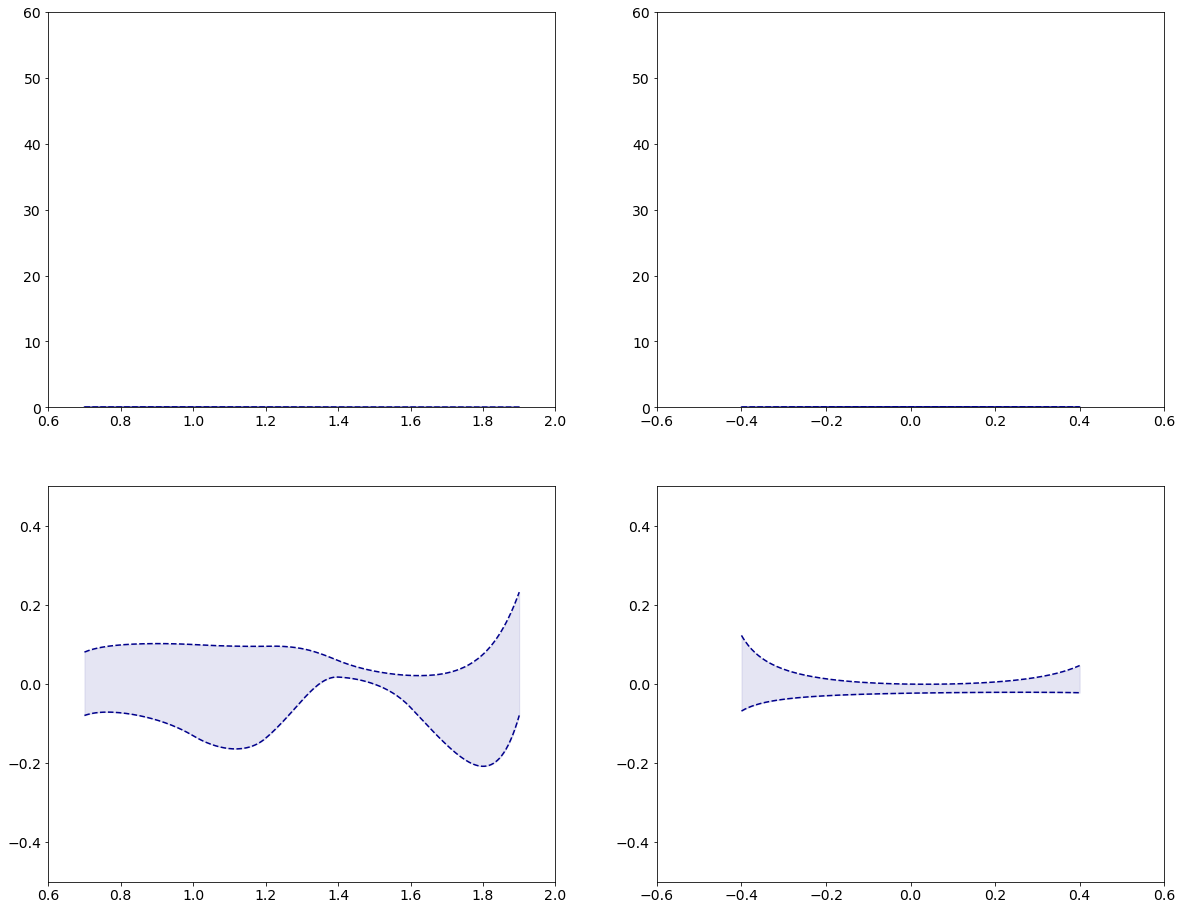

In [54]:
labels_xi_ = [ "_nom", "_p100", "_m100" ]
variations_ = []
for label0_ in labels_xi_:
    for label1_ in [ "_nom" ]:
        variations_.append( label0_ + label1_ )

sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = "_nom"

# vars_ = {}
# vars_[ "R_MWW_MX" ] = {}
# vars_[ "R_MWW_MX" ][ "bins" ]  = 30
# vars_[ "R_MWW_MX" ][ "range" ] = (0.,3.)
# vars_[ "R_MWW_MX" ][ "xlim" ]  = (0.5,2.)
# # vars_[ "R_MWW_MX" ][ "bins" ]  = 0.5 + 0.2 * np.arange( 9 )
# # vars_[ "R_MWW_MX" ][ "range" ] = None
# # vars_[ "R_MWW_MX" ][ "xlim" ]  = ( 0.5, 2.1 )
# vars_[ "Diff_YWW_YX" ] = {}
# vars_[ "Diff_YWW_YX" ][ "bins" ]  = 20
# vars_[ "Diff_YWW_YX" ][ "range" ] = (-1.,1.)
# vars_[ "Diff_YWW_YX" ][ "xlim" ]  = (-1.,1.)
# # vars_[ "Diff_YWW_YX" ][ "bins" ]  = -1.1 + 0.2 * np.arange( 12 )
# # vars_[ "Diff_YWW_YX" ][ "range" ] = None
# # vars_[ "Diff_YWW_YX" ][ "xlim" ]  = ( -1.1, 1.1 )

# ylim_ = (0.,0.2)
# ylim_ = (0.,0.5)
# ylim_ = (0.,1.)
ylim_ = (0.,60.)
# ylim_ = (0.,3.)
# ylim_ = (0.,5.)
ylim_ratio_ = (-0.50,0.50)

color_ = "darkblue"

relative_uncertainty_ = True

max_, min_ = plot_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variables=vars_,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False,
    label=label_ref_,
    var_info=vars_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_,
    relative_uncertainty=relative_uncertainty_)

max_var_xi_ = {}
min_var_xi_ = {}
max_var_xi_["arm0"] = max_
min_var_xi_["arm0"] = min_

In [55]:
max_variations[ "proton_scale_arm0" ] = max_
min_variations[ "proton_scale_arm0" ] = min_
print ( max_variations )
print ( min_variations )

{'jes': {'R_MWW_MX': array([0.01973113, 0.03937696, 0.03483643, 0.01594025, 0.01334119,
       0.00724598, 0.00297943]), 'Diff_YWW_YX': array([0.02375016, 0.07802794, 0.04330801])}, 'jer': {'R_MWW_MX': array([0.01995098, 0.03937696, 0.03483643, 0.01594779, 0.01289231,
       0.00724598, 0.00297943]), 'Diff_YWW_YX': array([0.02375016, 0.07802794, 0.04286667])}, 'sf_electron_id': {'R_MWW_MX': array([0.02019821, 0.04106394, 0.03574926, 0.01620053, 0.01329068,
       0.00745666, 0.00308546]), 'Diff_YWW_YX': array([0.02413799, 0.0807872 , 0.04421403])}, 'proton_scale_arm0': {'R_MWW_MX': array([0.02133023, 0.04341516, 0.03794513, 0.01688298, 0.0133179 ,
       0.00744995, 0.0036728 ]), 'Diff_YWW_YX': array([0.026429  , 0.07802794, 0.04463773])}}
{'jes': {'R_MWW_MX': array([0.01973113, 0.03937696, 0.03460999, 0.01527207, 0.01289231,
       0.00724598, 0.00297943]), 'Diff_YWW_YX': array([0.02352866, 0.07802794, 0.04263888])}, 'jer': {'R_MWW_MX': array([0.01973113, 0.03937696, 0.03460999, 0.015

GGToWW-AQGC-2018-electron-A0W1e-6
R_MWW_MX
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
[0.0211105  0.04361735 0.0382049  0.01593912 0.01448418 0.00836455
 0.00297943]
[0.01792835 0.03487362 0.0303499  0.01504482 0.01153509 0.00632973
 0.00274355]
0      0.069908
1      0.073271
2      0.076272
3      0.078965
4      0.081393
         ...   
195    0.044670
196    0.034592
197    0.023812
198    0.012293
199    0.000000
Length: 200, dtype: float64 0.09920885856924527
0     -0.091367
1     -0.092874
2     -0.094239
3     -0.095484
4     -0.096627
         ...   
195   -0.092384
196   -0.089391
197   -0.086198
198   -0.082793
199   -0.079168
Length: 200, dtype: float64 -0.09984075951105836
Diff_YWW_YX
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
[0.02509613 0.07961848 0.04416975]
[0.02194447 0.07669694 0.04015659]
0      0.066619
1      0.063941
2      0.061493
3      0.059248
4      0.057181
         ...   
195    0.033687
196    0.034248
197    0.034836
198    0.0

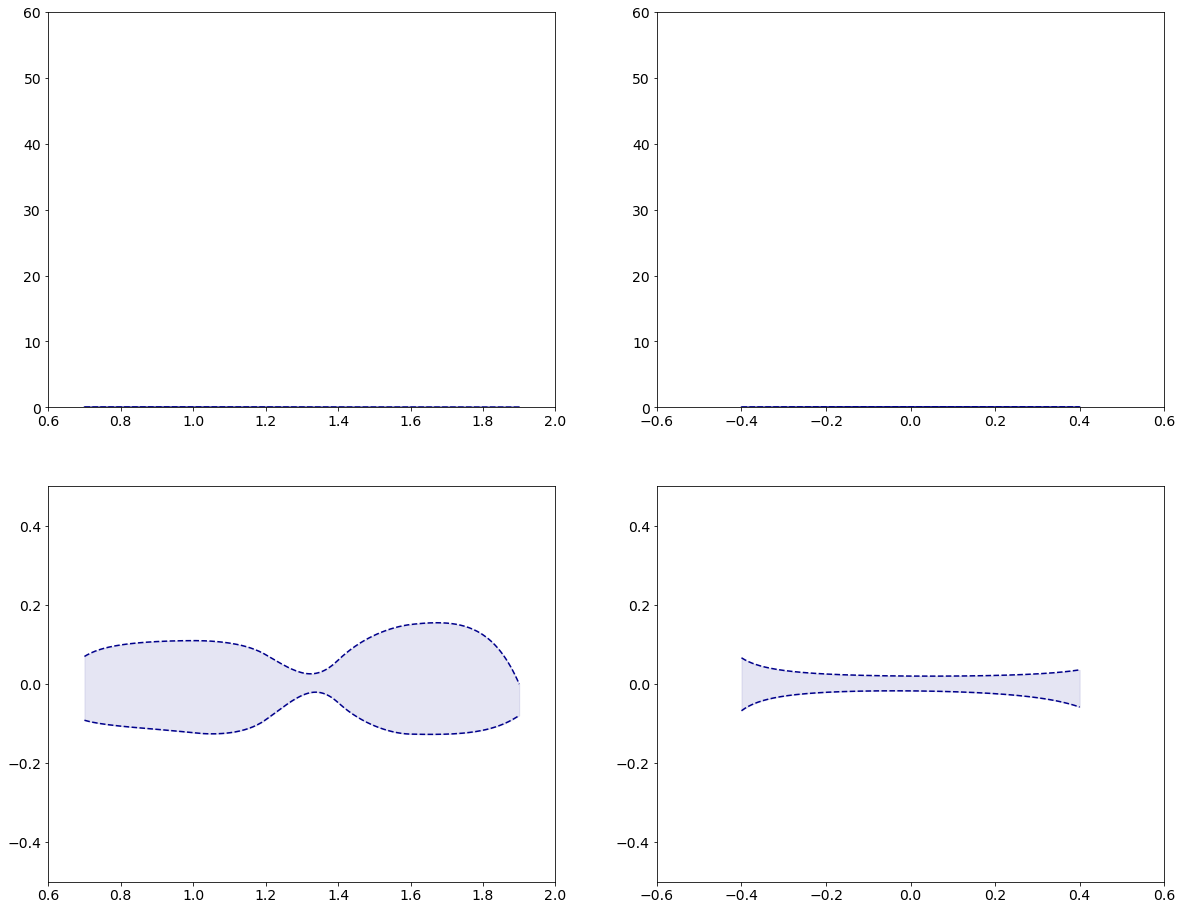

In [56]:
variations_ = []

for label0_ in [ "_nom" ]:
    for label1_ in labels_xi_:
        variations_.append( label0_ + label1_ )

sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = "_nom"

max_, min_ = plot_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variables=vars_,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False,
    label=label_ref_,
    var_info=vars_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_,
    relative_uncertainty=relative_uncertainty_)

max_var_xi_["arm1"] = max_
min_var_xi_["arm1"] = min_

In [57]:
max_variations[ "proton_scale_arm1" ] = max_
min_variations[ "proton_scale_arm1" ] = min_
print ( max_variations )
print ( min_variations )

{'jes': {'R_MWW_MX': array([0.01973113, 0.03937696, 0.03483643, 0.01594025, 0.01334119,
       0.00724598, 0.00297943]), 'Diff_YWW_YX': array([0.02375016, 0.07802794, 0.04330801])}, 'jer': {'R_MWW_MX': array([0.01995098, 0.03937696, 0.03483643, 0.01594779, 0.01289231,
       0.00724598, 0.00297943]), 'Diff_YWW_YX': array([0.02375016, 0.07802794, 0.04286667])}, 'sf_electron_id': {'R_MWW_MX': array([0.02019821, 0.04106394, 0.03574926, 0.01620053, 0.01329068,
       0.00745666, 0.00308546]), 'Diff_YWW_YX': array([0.02413799, 0.0807872 , 0.04421403])}, 'proton_scale_arm0': {'R_MWW_MX': array([0.02133023, 0.04341516, 0.03794513, 0.01688298, 0.0133179 ,
       0.00744995, 0.0036728 ]), 'Diff_YWW_YX': array([0.026429  , 0.07802794, 0.04463773])}, 'proton_scale_arm1': {'R_MWW_MX': array([0.0211105 , 0.04361735, 0.0382049 , 0.01593912, 0.01448418,
       0.00836455, 0.00297943]), 'Diff_YWW_YX': array([0.02509613, 0.07961848, 0.04416975])}}
{'jes': {'R_MWW_MX': array([0.01973113, 0.03937696, 0.0

GGToWW-AQGC-2018-electron-A0W1e-6
R_MWW_MX
[0.02184295 0.04523255 0.03951372 0.01695348 0.01454009 0.008383
 0.0036728 ]
[0.0173439  0.03362341 0.02753978 0.01470613 0.01153509 0.00580227
 0.00264585]
0      0.107030
1      0.110963
2      0.114464
3      0.117597
4      0.120415
         ...   
195    0.217852
196    0.221376
197    0.225027
198    0.228808
199    0.232721
Length: 200, dtype: float64 0.13999831224055248
0     -0.120988
1     -0.120730
2     -0.120596
3     -0.120569
4     -0.120637
         ...   
195   -0.156125
196   -0.146614
197   -0.136124
198   -0.124594
199   -0.111960
Length: 200, dtype: float64 -0.14268819981309094
Diff_YWW_YX
[0.02682546 0.07961848 0.04515986]
[0.02127615 0.07580384 0.03998957]
0      0.140118
1      0.133198
2      0.126873
3      0.121070
4      0.115728
         ...   
195    0.053296
196    0.054698
197    0.056167
198    0.057708
199    0.059325
Length: 200, dtype: float64 0.03752740452398814
0     -0.095735
1     -0.091749
2     -0.088

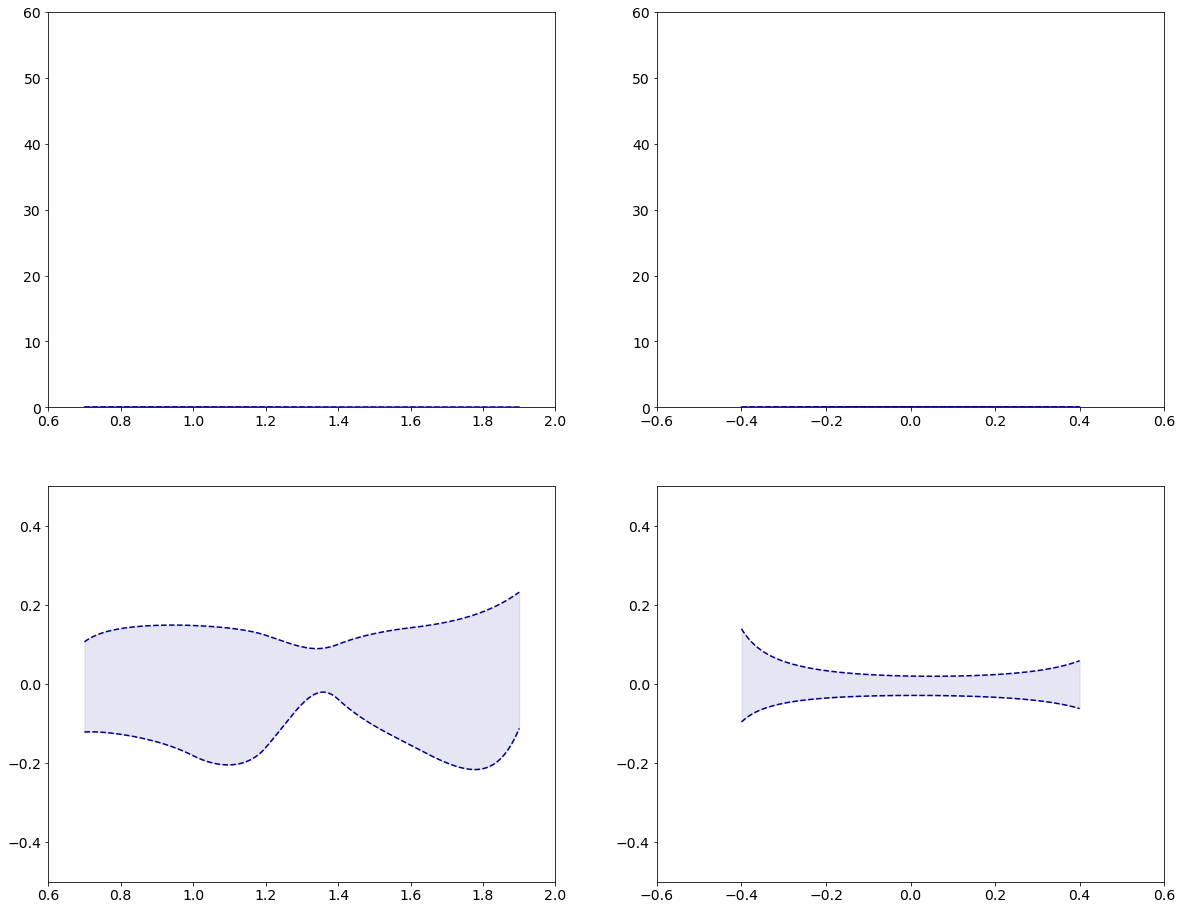

In [58]:
spline_nom_ = {}
spline_max_ = {}
spline_min_ = {}
spline_nom_arr_ = {}
spline_max_arr_ = {}
spline_min_arr_ = {}

idx_row_ = 0
idx_col_ = 0

fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )

label_ = label_ref_
print ( label_ )
for var__ in vars_:
    print ( var__ )
    idx_row_ = 0
    df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]
    weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ "nom" ][ "_nom" ]
    arr__ = df__[ var__ + "_nom" ]

    arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
    msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
    arr__ = arr__.loc[ msk__ ]
    weights__ = weights__.loc[ msk__ ]
    counts_, bins_, _ = axes[idx_row_,idx_col_].hist( arr__,
                                                      weights=weights__,
                                                      histtype='step', color=color_, linestyle="-", label="_nom",
                                                      bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
    __max__ = ( counts_ +
                np.sqrt( ( max_var_xi_[ "arm0" ][ var__ ] - counts_ ) ** 2 +
                         ( max_var_xi_[ "arm1" ][ var__ ] - counts_ ) ** 2 ) )
    __min__ = ( counts_ -
                np.sqrt( ( counts_ - min_var_xi_[ "arm0" ][ var__ ] ) ** 2 +
                         ( counts_ - min_var_xi_[ "arm1" ][ var__ ] ) ** 2 ) )
    print ( __max__ )
    print ( __min__ )
    
    bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2
    
    spline_nom_[ var__ ] = make_interp_spline( bin_centers_, counts_, k=2 )
    spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
    spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
    x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
    spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
    spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
    spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
    
    axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
    axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
    axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
    axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
    axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
    axes[idx_row_,idx_col_].set_ylim( ylim_ )

    idx_row_ = 1
    if relative_uncertainty_:
        ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
        ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
        ratio_max_sel_ = pd.Series( ratio_max_ )
        ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
        ratio_min_sel_ = pd.Series( ratio_min_ )
        ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
        print ( ratio_max_sel_, ratio_max_sel_.mean() )
        print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
        axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
    else:
        diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
        diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
        axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
#     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
    axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
    axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
    idx_col_ += 1

In [59]:
variations_ = []
for label0_ in labels_xi_:
    for label1_ in [ "_nom" ]:
        variations_.append( label0_ + label1_ )
sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = "_nom"

print ( variations_ )
print ( sel_str__ )

sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False
    )

['_nom_nom', '_p100_nom', '_m100_nom']
{'_nom_nom': '_nom', '_p100_nom': '_nom', '_m100_nom': '_nom'}
GGToWW-AQGC-2018-electron-A0W5e-7
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
0.035582566666728654 ± 0.002536173327733353
0.036488716460231725
0.03362217764203276
GGToWW-AQGC-2018-electron-A0W1e-6
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
0.1168906391507582 ± 0.005137930527006755
0.11936032924699383
0.11347711442592609
GGToWW-AQGC-2018-electron-A0W2e-6
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
0.26662098807506296 ± 0.006949903171970879
0.27168539401203573
0.2606526378841514
GGToWW-AQGC-2018-electron-A0W5e-6
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
0.7911810453903438 ± 0.013550441220130681
0.803676878108567
0.7740985272056418
{'GGToWW-AQGC-2018-electron-A0W5e-7': 0.035582566666728654, 'GGToWW-AQGC-2018-electron-A0W1e-6': 0.1168906391507582, 'GGToWW-AQGC-2018-electron-A0W2e-6': 0.26662098807506296, 'GGToWW-AQGC-2018-electron-A0W5e-6'

In [60]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_proton_scale_arm0" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_proton_scale_arm0" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-electron-A0W5e-7': {'central': 0.035582566666728654, 'stat': 0.002536173327733353, 'syst_up_jes': 0.0, 'syst_dw_jes': -0.00017719652081783777, 'syst_up_jer': 0.0, 'syst_dw_jer': 0.0, 'syst_up_sf_electron_id': 0.0016100697388013313, 'syst_dw_sf_electron_id': -0.0016100697388013313, 'syst_up_proton_scale_arm0': 0.0009061497935030707, 'syst_dw_proton_scale_arm0': -0.001960389024695891}, 'GGToWW-AQGC-2018-electron-A0W1e-6': {'central': 0.1168906391507582, 'stat': 0.005137930527006755, 'syst_up_jes': 0.0008987156959492371, 'syst_dw_jes': 8.086599359080626e-06, 'syst_up_jer': 0.0004573708626731121, 'syst_dw_jer': 0.0002264350984287622, 'syst_up_sf_electron_id': 0.004371947811591975, 'syst_dw_sf_electron_id': -0.004371947811591975, 'syst_up_proton_scale_arm0': 0.002469690096235627, 'syst_dw_proton_scale_arm0': -0.003413524724832112}, 'GGToWW-AQGC-2018-electron-A0W2e-6': {'central': 0.26662098807506296, 'stat': 0.006949903171970879, 'syst_up_jes': 0.0016133383594102435, 'sys

In [61]:
variations_ = []
for label0_ in [ "_nom" ]:
    for label1_ in labels_xi_:
        variations_.append( label0_ + label1_ )
sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = "_nom"

print ( variations_ )
print ( sel_str__ )

sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False
    )

['_nom_nom', '_nom_p100', '_nom_m100']
{'_nom_nom': '_nom', '_nom_p100': '_nom', '_nom_m100': '_nom'}
GGToWW-AQGC-2018-electron-A0W5e-7
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
0.035582566666728654 ± 0.002536173327733353
0.03612972498423553
0.03417521575068058
GGToWW-AQGC-2018-electron-A0W1e-6
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
0.1168906391507582 ± 0.005137930527006755
0.1193772266744083
0.11391600023548408
GGToWW-AQGC-2018-electron-A0W2e-6
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
0.26662098807506296 ± 0.006949903171970879
0.2726107501171111
0.2604978031758609
GGToWW-AQGC-2018-electron-A0W5e-6
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
0.7911810453903438 ± 0.013550441220130681
0.8078742525606324
0.7724689185653099
{'GGToWW-AQGC-2018-electron-A0W5e-7': 0.035582566666728654, 'GGToWW-AQGC-2018-electron-A0W1e-6': 0.1168906391507582, 'GGToWW-AQGC-2018-electron-A0W2e-6': 0.26662098807506296, 'GGToWW-AQGC-2018-electron-A0W5e-6': 

In [62]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_proton_scale_arm1" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_proton_scale_arm1" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-electron-A0W5e-7': {'central': 0.035582566666728654, 'stat': 0.002536173327733353, 'syst_up_jes': 0.0, 'syst_dw_jes': -0.00017719652081783777, 'syst_up_jer': 0.0, 'syst_dw_jer': 0.0, 'syst_up_sf_electron_id': 0.0016100697388013313, 'syst_dw_sf_electron_id': -0.0016100697388013313, 'syst_up_proton_scale_arm0': 0.0009061497935030707, 'syst_dw_proton_scale_arm0': -0.001960389024695891, 'syst_up_proton_scale_arm1': 0.0005471583175068739, 'syst_dw_proton_scale_arm1': -0.0014073509160480724}, 'GGToWW-AQGC-2018-electron-A0W1e-6': {'central': 0.1168906391507582, 'stat': 0.005137930527006755, 'syst_up_jes': 0.0008987156959492371, 'syst_dw_jes': 8.086599359080626e-06, 'syst_up_jer': 0.0004573708626731121, 'syst_dw_jer': 0.0002264350984287622, 'syst_up_sf_electron_id': 0.004371947811591975, 'syst_dw_sf_electron_id': -0.004371947811591975, 'syst_up_proton_scale_arm0': 0.002469690096235627, 'syst_dw_proton_scale_arm0': -0.003413524724832112, 'syst_up_proton_scale_arm1': 0.0024865

In [63]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_proton_scale" ]    =  np.sqrt( sum_weights[ label_ ][ "syst_up_proton_scale_arm0" ] ** 2 +
                                                                   sum_weights[ label_ ][ "syst_up_proton_scale_arm1" ] ** 2 )
    sum_weights[ label_ ][ "syst_dw_proton_scale" ]    = -np.sqrt( sum_weights[ label_ ][ "syst_dw_proton_scale_arm0" ] ** 2 +
                                                                   sum_weights[ label_ ][ "syst_dw_proton_scale_arm1" ] ** 2 )
print ( sum_weights )

{'GGToWW-AQGC-2018-electron-A0W5e-7': {'central': 0.035582566666728654, 'stat': 0.002536173327733353, 'syst_up_jes': 0.0, 'syst_dw_jes': -0.00017719652081783777, 'syst_up_jer': 0.0, 'syst_dw_jer': 0.0, 'syst_up_sf_electron_id': 0.0016100697388013313, 'syst_dw_sf_electron_id': -0.0016100697388013313, 'syst_up_proton_scale_arm0': 0.0009061497935030707, 'syst_dw_proton_scale_arm0': -0.001960389024695891, 'syst_up_proton_scale_arm1': 0.0005471583175068739, 'syst_dw_proton_scale_arm1': -0.0014073509160480724, 'syst_up_proton_scale': 0.0010585318477413, 'syst_dw_proton_scale': -0.002413247133852945}, 'GGToWW-AQGC-2018-electron-A0W1e-6': {'central': 0.1168906391507582, 'stat': 0.005137930527006755, 'syst_up_jes': 0.0008987156959492371, 'syst_dw_jes': 8.086599359080626e-06, 'syst_up_jer': 0.0004573708626731121, 'syst_dw_jer': 0.0002264350984287622, 'syst_up_sf_electron_id': 0.004371947811591975, 'syst_dw_sf_electron_id': -0.004371947811591975, 'syst_up_proton_scale_arm0': 0.002469690096235627,

GGToWW-AQGC-2018-electron-A0W1e-6
R_MWW_MX
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
[0.02010239 0.04027331 0.03532225 0.01572829 0.01307312 0.00732411
 0.0029895 ]
[0.01935987 0.03848061 0.03389773 0.01525254 0.01271149 0.00716785
 0.00296935]
0      0.018816
1      0.019244
2      0.019623
3      0.019960
4      0.020261
         ...   
195    0.004434
196    0.004171
197    0.003907
198    0.003643
199    0.003380
Length: 200, dtype: float64 0.016042951611606283
0     -0.018816
1     -0.019244
2     -0.019623
3     -0.019960
4     -0.020261
         ...   
195   -0.004434
196   -0.004171
197   -0.003907
198   -0.003643
199   -0.003380
Length: 200, dtype: float64 -0.016042951611609145
Diff_YWW_YX
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
[0.02388418 0.07960768 0.04325467]
[0.02317315 0.0764482  0.04200692]
0      0.015110
1      0.015441
2      0.015743
3      0.016020
4      0.016274
         ...   
195    0.015383
196    0.015208
197    0.015026
198    0.014835
199    0

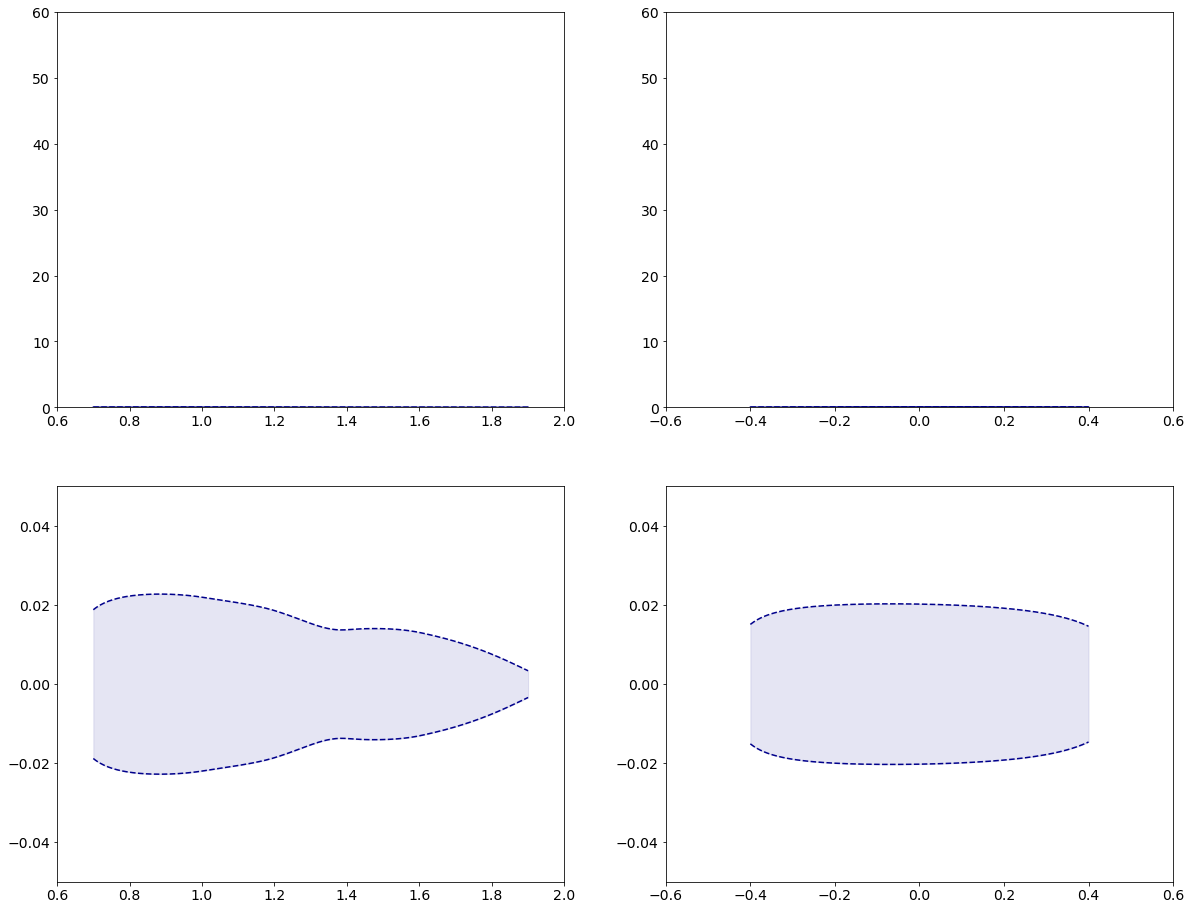

In [64]:
variations_weights_ = [ "nom", "proton_eff_up", "proton_eff_dw" ]

relative_uncertainty_ = True

# ylim_ = (0.,1.)
ylim_ = (0.,60.)
ylim_ratio_ = (-0.05,0.05)

color_ = "darkblue"

max_, min_ = plot_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variables=vars_,
    variations=variations_weights_,
    selection_dict=None,
    scale_variation=True,
    label=label_ref_,
    var_info=vars_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_,
    relative_uncertainty=relative_uncertainty_)

print ( max_, min_ )

In [65]:
max_variations[ "proton_eff" ] = max_
min_variations[ "proton_eff" ] = min_
print ( max_variations )
print ( min_variations )

{'jes': {'R_MWW_MX': array([0.01973113, 0.03937696, 0.03483643, 0.01594025, 0.01334119,
       0.00724598, 0.00297943]), 'Diff_YWW_YX': array([0.02375016, 0.07802794, 0.04330801])}, 'jer': {'R_MWW_MX': array([0.01995098, 0.03937696, 0.03483643, 0.01594779, 0.01289231,
       0.00724598, 0.00297943]), 'Diff_YWW_YX': array([0.02375016, 0.07802794, 0.04286667])}, 'sf_electron_id': {'R_MWW_MX': array([0.02019821, 0.04106394, 0.03574926, 0.01620053, 0.01329068,
       0.00745666, 0.00308546]), 'Diff_YWW_YX': array([0.02413799, 0.0807872 , 0.04421403])}, 'proton_scale_arm0': {'R_MWW_MX': array([0.02133023, 0.04341516, 0.03794513, 0.01688298, 0.0133179 ,
       0.00744995, 0.0036728 ]), 'Diff_YWW_YX': array([0.026429  , 0.07802794, 0.04463773])}, 'proton_scale_arm1': {'R_MWW_MX': array([0.0211105 , 0.04361735, 0.0382049 , 0.01593912, 0.01448418,
       0.00836455, 0.00297943]), 'Diff_YWW_YX': array([0.02509613, 0.07961848, 0.04416975])}, 'proton_eff': {'R_MWW_MX': array([0.02010239, 0.0402733

In [66]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_weights_,
    selection_dict=None,
    scale_variation=True
    )

GGToWW-AQGC-2018-electron-A0W5e-7
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
0.035582566666728654 ± 0.002536173327733353
0.036220944959979046
0.03494418837347826
GGToWW-AQGC-2018-electron-A0W1e-6
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
0.1168906391507582 ± 0.005137930527006755
0.11900614553515378
0.11477513276636263
GGToWW-AQGC-2018-electron-A0W2e-6
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
0.26662098807506296 ± 0.006949903171970879
0.2711668506039906
0.2620751255461353
GGToWW-AQGC-2018-electron-A0W5e-6
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
0.7911810453903438 ± 0.013550441220130681
0.8045584298424795
0.7778036609382083
{'GGToWW-AQGC-2018-electron-A0W5e-7': 0.035582566666728654, 'GGToWW-AQGC-2018-electron-A0W1e-6': 0.1168906391507582, 'GGToWW-AQGC-2018-electron-A0W2e-6': 0.26662098807506296, 'GGToWW-AQGC-2018-electron-A0W5e-6': 0.7911810453903438}
{'GGToWW-AQGC-2018-electron-A0W5e-7': 6.432175148306071e-06, 'GGToWW-AQGC-2018-electron-A0W1e-6': 2.639833010034

In [67]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_proton_eff" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_proton_eff" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-electron-A0W5e-7': {'central': 0.035582566666728654, 'stat': 0.002536173327733353, 'syst_up_jes': 0.0, 'syst_dw_jes': -0.00017719652081783777, 'syst_up_jer': 0.0, 'syst_dw_jer': 0.0, 'syst_up_sf_electron_id': 0.0016100697388013313, 'syst_dw_sf_electron_id': -0.0016100697388013313, 'syst_up_proton_scale_arm0': 0.0009061497935030707, 'syst_dw_proton_scale_arm0': -0.001960389024695891, 'syst_up_proton_scale_arm1': 0.0005471583175068739, 'syst_dw_proton_scale_arm1': -0.0014073509160480724, 'syst_up_proton_scale': 0.0010585318477413, 'syst_dw_proton_scale': -0.002413247133852945, 'syst_up_proton_eff': 0.0006383782932503912, 'syst_dw_proton_eff': -0.0006383782932503912}, 'GGToWW-AQGC-2018-electron-A0W1e-6': {'central': 0.1168906391507582, 'stat': 0.005137930527006755, 'syst_up_jes': 0.0008987156959492371, 'syst_dw_jes': 8.086599359080626e-06, 'syst_up_jer': 0.0004573708626731121, 'syst_dw_jer': 0.0002264350984287622, 'syst_up_sf_electron_id': 0.004371947811591975, 'syst_dw

GGToWW-AQGC-2018-electron-A0W1e-6
R_MWW_MX
[0.01973113 0.03937696 0.03460999 0.01549042 0.01289231 0.00724598
 0.00297943]
[0.02183509 0.04236331 0.0374     0.01735593 0.01460064 0.00852736
 0.00380605]
[0.01762717 0.03639061 0.03181998 0.0136249  0.01118397 0.00596461
 0.0021528 ]
[0.0227792  0.04622207 0.04041848 0.01805812 0.0153472  0.00897376
 0.0040636 ]
[0.01649361 0.03261893 0.02689136 0.0133216  0.01066704 0.00530261
 0.00208169]
0      0.154480
1      0.156458
2      0.158212
3      0.159777
4      0.161179
         ...   
195    0.342251
196    0.347483
197    0.352834
198    0.358303
199    0.363885
Length: 200, dtype: float64 0.19776511423269827
0     -0.164082
1     -0.162658
2     -0.161468
3     -0.160479
4     -0.159665
         ...   
195   -0.315817
196   -0.313120
197   -0.309834
198   -0.305913
199   -0.301311
Length: 200, dtype: float64 -0.20301081908659932
Diff_YWW_YX
[0.02352866 0.07802794 0.04263079]
[0.02582556 0.08222438 0.04573291]
[0.02123177 0.0738315  0.0

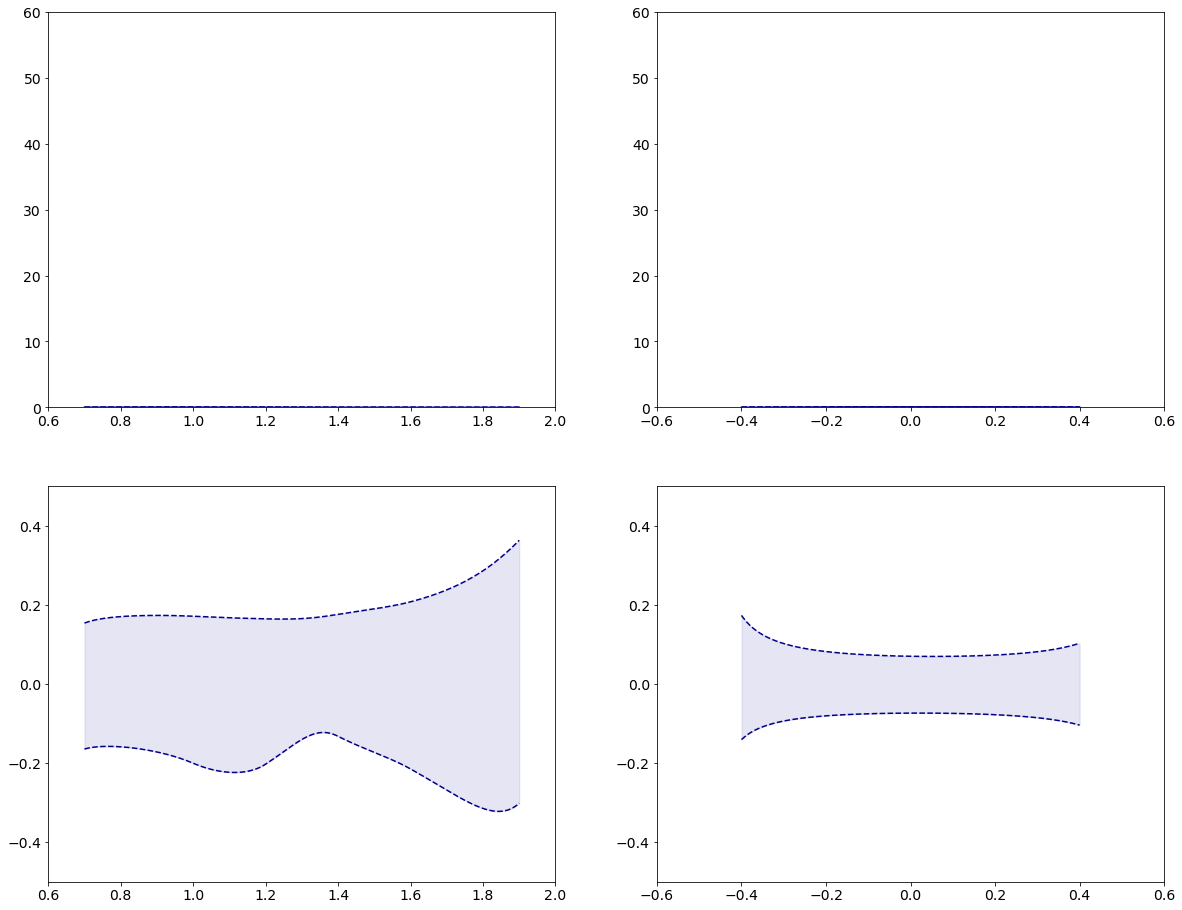

In [68]:
color_ = "darkblue"

relative_uncertainty_ = True

# ylim_ = (0.,1.)
ylim_ = (0.,60.)
ylim_ratio_ = (-0.50,0.50)

spline_nom_ = {}
spline_max_ = {}
spline_min_ = {}
spline_max_err_ = {}
spline_min_err_ = {}
spline_nom_arr_ = {}
spline_max_arr_ = {}
spline_min_arr_ = {}
spline_max_err_arr_ = {}
spline_min_err_arr_ = {}

idx_row_ = 0
idx_col_ = 0

fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )

variation_name_lepton_id_ = ""
if lepton_type == 'muon': variation_name_lepton_id_ =  "sf_muon_id"
elif lepton_type == 'electron': variation_name_lepton_id_ =  "sf_electron_id"
    
label_ = label_ref_
print ( label_ )
for var__ in vars_:
    print ( var__ )
    idx_row_ = 0
    df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]
    weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ "nom" ][ "_nom" ]
    arr__ = df__[ var__ + "_nom" ]
    
    arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
    msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
    arr__ = arr__.loc[ msk__ ]
    weights__ = weights__.loc[ msk__ ]
    sum_w_, bins_ = np.histogram( arr__, weights=weights__, bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
    sum_w2_, __ = np.histogram( arr__, weights=( weights__ ** 2 ), bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )

    __max_err__ = ( sum_w_ + np.sqrt( sum_w2_ ) )
    __min_err__ = ( sum_w_ - np.sqrt( sum_w2_ ) )

    __max__ = ( sum_w_ +
                np.sqrt(
                    ( max_variations[ "jes" ][ var__ ] - sum_w_ ) ** 2 +
                    ( max_variations[ "jer" ][ var__ ] - sum_w_ ) ** 2 +
                    ( max_variations[ variation_name_lepton_id_ ][ var__ ] - sum_w_ ) ** 2 +
                    ( max_variations[ "proton_scale_arm0" ][ var__ ] - sum_w_ ) ** 2 +
                    ( max_variations[ "proton_scale_arm1" ][ var__ ] - sum_w_ ) ** 2 +
                    ( max_variations[ "proton_eff" ][ var__ ] - sum_w_ ) ** 2 +
                    sum_w2_
                    ) )
    __min__ = ( sum_w_ -
                np.sqrt(
                    ( sum_w_ - min_variations[ "jes" ][ var__ ] ) ** 2 +
                    ( sum_w_ - min_variations[ "jer" ][ var__ ] ) ** 2 +
                    ( sum_w_ - min_variations[ variation_name_lepton_id_ ][ var__ ] ) ** 2 +
                    ( sum_w_ - min_variations[ "proton_scale_arm0" ][ var__ ] ) ** 2 +
                    ( sum_w_ - min_variations[ "proton_scale_arm1" ][ var__ ] ) ** 2 +
                    ( sum_w_ - min_variations[ "proton_eff" ][ var__ ] ) ** 2 +
                    sum_w2_
                    ) )
    print ( sum_w_ )
    print ( __max_err__ )
    print ( __min_err__ )
    print ( __max__ )
    print ( __min__ )
    
    bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2
    
    axes[idx_row_,idx_col_].hist( bin_centers_, weights=sum_w_,
                                  histtype='step', color=color_, linestyle="-", label="_nom",
                                  bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
#     axes[idx_row_,idx_col_].errorbar( bin_centers_, sum_w_, yerr=np.sqrt( sum_w2_ ),
#                                       color=color_, fmt='o', label="_nom" )

    spline_nom_[ var__ ] = make_interp_spline( bin_centers_, sum_w_, k=2 )
    spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
    spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
    spline_max_err_[ var__ ] = make_interp_spline( bin_centers_, __max_err__, k=2 )
    spline_min_err_[ var__ ] = make_interp_spline( bin_centers_, __min_err__, k=2 )
    x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
#     x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 100 )
    spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
    spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
    spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
    spline_max_err_arr_[ var__ ] = spline_max_err_[ var__ ]( x_plot__ )
    spline_min_err_arr_[ var__ ] = spline_min_err_[ var__ ]( x_plot__ )
    
    axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
    axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
    axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
#     axes[idx_row_,idx_col_].plot( x_plot__, spline_max_err_arr_[ var__ ], color=color_, linestyle="--" )
#     axes[idx_row_,idx_col_].plot( x_plot__, spline_min_err_arr_[ var__ ], color=color_, linestyle="--" )
    axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
    axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_err_arr_[ var__ ], spline_max_err_arr_[ var__ ], color='lightgrey', alpha=0.90 )
    axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
    axes[idx_row_,idx_col_].set_ylim( ylim_ )

    idx_row_ = 1
    if relative_uncertainty_:
        ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
        ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
        ratio_max_sel_ = pd.Series( ratio_max_ )
        ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
        ratio_min_sel_ = pd.Series( ratio_min_ )
        ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
        print ( ratio_max_sel_, ratio_max_sel_.mean() )
        print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
        axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
    else:
        diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
        diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
        axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
#     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
    axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
    axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
    idx_col_ += 1

In [69]:
def plot_total_systematic( df_dict, weights_dict, lepton_type, label, ylim, ylim_ratio, color ):

    lepton_type_ = lepton_type
    label_ = label
    ylim_ = ylim
    ylim_ratio_ = ylim_ratio
    color_ = color
    
    variations_ = [ "_nom", "_jes_up", "_jes_dw" ]

    sel_str__ = {}
    for key_ in variations_:
        sel_str__[ key_ ] = key_

    relative_uncertainty_ = True

    __max_variations = {}
    __min_variations = {}
    
    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)
    
    __max_variations[ "jes" ] = max_
    __min_variations[ "jes" ] = min_
    
    variations_ = [ "_nom", "_jer_up", "_jer_dw" ]

    sel_str__ = {}
    for key_ in variations_:
        sel_str__[ key_ ] = key_

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "jer" ] = max_
    __min_variations[ "jer" ] = min_
    
    variations_weights_ = []
    if lepton_type_ == 'muon':
        variations_weights_ = [ "nom", "sf_muon_id_up", "sf_muon_id_dw" ]
    elif lepton_type_ == 'electron':
        variations_weights_ = [ "nom", "sf_electron_id_up", "sf_electron_id_dw" ]

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    variation_name_lepton_id_ = ""
    if lepton_type == 'muon': variation_name_lepton_id_ =  "sf_muon_id"
    elif lepton_type == 'electron': variation_name_lepton_id_ =  "sf_electron_id"

    __max_variations[ variation_name_lepton_id_ ] = max_
    __min_variations[ variation_name_lepton_id_ ] = min_

    labels_xi_ = [ "_nom", "_p100", "_m100" ]
    variations_ = []
    for label0_ in labels_xi_:
        for label1_ in [ "_nom" ]:
            variations_.append( label0_ + label1_ )

    sel_str__ = {}
    for key_ in variations_:
        sel_str__[ key_ ] = "_nom"

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "proton_scale_arm0" ] = max_
    __min_variations[ "proton_scale_arm0" ] = min_

    variations_ = []
    for label0_ in [ "_nom" ]:
        for label1_ in labels_xi_:
            variations_.append( label0_ + label1_ )

    sel_str__ = {}
    for key_ in variations_:
        sel_str__[ key_ ] = "_nom"

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "proton_scale_arm1" ] = max_
    __min_variations[ "proton_scale_arm1" ] = min_

    variations_weights_ = [ "nom", "proton_eff_up", "proton_eff_dw" ]

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "proton_eff" ] = max_
    __min_variations[ "proton_eff" ] = min_

    print ( __max_variations )
    print ( __min_variations )
    
    spline_nom_ = {}
    spline_max_ = {}
    spline_min_ = {}
    spline_max_err_ = {}
    spline_min_err_ = {}
    spline_nom_arr_ = {}
    spline_max_arr_ = {}
    spline_min_arr_ = {}
    spline_max_err_arr_ = {}
    spline_min_err_arr_ = {}

    idx_row_ = 0
    idx_col_ = 0

    fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )

    print ( label_ )
    counts__ = {}
    err__ = {}
    bins__ = {}
    max_variations_total__ = {}
    min_variations_total__ = {}
    for var__ in vars_:
        print ( var__ )
        idx_row_ = 0
        df__ = df_dict[ label_ ][ "_nom" ]
        weights__ = weights_dict[ label_ ][ "nom" ][ "_nom" ]
        arr__ = df__[ var__ + "_nom" ]

        arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
        arr__ = arr__.loc[ msk__ ]
        weights__ = weights__.loc[ msk__ ]
        sum_w_, bins_ = np.histogram( arr__, weights=weights__,
                                      bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        sum_w2_, __ = np.histogram( arr__, weights=( weights__ ** 2 ),
                                    bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )

        __max_err__ = ( sum_w_ + np.sqrt( sum_w2_ ) )
        __min_err__ = ( sum_w_ - np.sqrt( sum_w2_ ) )

        __max__ = ( sum_w_ +
                    np.sqrt(
                        ( __max_variations[ "jes" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "jer" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ variation_name_lepton_id_ ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "proton_scale_arm0" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "proton_scale_arm1" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "proton_eff" ][ var__ ] - sum_w_ ) ** 2 +
                        sum_w2_
                        ) )
        __min__ = ( sum_w_ -
                    np.sqrt(
                        ( sum_w_ - __min_variations[ "jes" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "jer" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ variation_name_lepton_id_ ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "proton_scale_arm0" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "proton_scale_arm1" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "proton_eff" ][ var__ ] ) ** 2 +
                        sum_w2_
                        ) )
        print ( sum_w_ )
        print ( __max_err__ )
        print ( __min_err__ )
        print ( __max__ )
        print ( __min__ )
        counts__[ var__ ] = sum_w_
        err__[ var__ ] = np.sqrt( sum_w2_ )
        bins__[ var__ ] = bins_
        max_variations_total__[ var__ ] = __max__
        min_variations_total__[ var__ ] = __min__
        
        bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

        axes[idx_row_,idx_col_].hist( bin_centers_, weights=sum_w_,
                                      histtype='step', color=color_, linestyle="-", label="_nom",
                                      bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        
        spline_nom_[ var__ ] = make_interp_spline( bin_centers_, sum_w_, k=2 )
        spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
        spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
        spline_max_err_[ var__ ] = make_interp_spline( bin_centers_, __max_err__, k=2 )
        spline_min_err_[ var__ ] = make_interp_spline( bin_centers_, __min_err__, k=2 )
        x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
        spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
        spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
        spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
        spline_max_err_arr_[ var__ ] = spline_max_err_[ var__ ]( x_plot__ )
        spline_min_err_arr_[ var__ ] = spline_min_err_[ var__ ]( x_plot__ )

        axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
        axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_err_arr_[ var__ ], spline_max_err_arr_[ var__ ], color='lightgrey', alpha=0.90 )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ )

        idx_row_ = 1
        if relative_uncertainty_:
            ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_max_sel_ = pd.Series( ratio_max_ )
            ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            ratio_min_sel_ = pd.Series( ratio_min_ )
            ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            print ( ratio_max_sel_, ratio_max_sel_.mean() )
            print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
        else:
            diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
    #     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
        idx_col_ += 1
        
    return ( counts__, err__, bins__, max_variations_total__, min_variations_total__ )

In [70]:
counts = {}
err = {}
bins = {}
max_variations_total = {}
min_variations_total = {}

GGToWW-AQGC-2018-electron-A0W5e-7
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[0.01082266 0.01597213 0.00925158 0.00364751 0.003614   0.00146235
 0.00018676]
[0.01064743 0.01597213 0.00925158 0.00364751 0.003614   0.00128516
 0.00018676]
0      0.016458
1      0.015157
2      0.013972
3      0.012889
4      0.011896
         ...   
195   -0.000031
196   -0.000026
197   -0.000019
198   -0.000011
199    0.000000
Length: 200, dtype: float64 0.000866929482417792
0      0.000000
1     -0.000002
2     -0.000003
3     -0.000005
4     -0.000006
         ...   
195   -0.178050
196   -0.146998
197   -0.107820
198   -0.059249
199    0.000000
Length: 200, dtype: float64 -0.0385828051056229
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[0.01010714 0.02950957 0.01466943]
[0.01010187 0.02915865 0.01431689]
0      0.000522
1      0.000328
2      0.000151
3     -0.000011
4     -0.000160
         ...   
195    0.021254
196    0.022032
197    0.022851
198    0.023714
199    0.024624
Length: 20

GGToWW-AQGC-2018-electron-A0W5e-7
R_MWW_MX
[0.01064743 0.01597213 0.00925158 0.00364751 0.003614   0.00146235
 0.00018676]
[0.0120341  0.01766577 0.01054755 0.00446346 0.00442244 0.00197959
 0.00037351]
[ 9.26075248e-03  1.42784944e-02  7.95560446e-03  2.83155250e-03
  2.80555570e-03  9.45119940e-04 -2.79182059e-18]
[0.01333999 0.01784261 0.01166955 0.00481022 0.00446978 0.00224409
 0.00044445]
[ 8.91415027e-03  1.32130823e-02  7.38419901e-03  2.76009000e-03
  2.53072351e-03  8.82699388e-04 -2.47713667e-07]
0      0.252883
1      0.239552
2      0.227496
3      0.216562
4      0.206618
         ...   
195    1.372345
196    1.389852
197    1.398651
198    1.396262
199    1.379839
Length: 200, dtype: float64 0.37050297121174014
0     -0.162788
1     -0.163069
2     -0.163341
3     -0.163607
4     -0.163868
         ...   
195   -0.856952
196   -0.891902
197   -0.927981
198   -0.964692
199   -1.001326
Length: 200, dtype: float64 -0.2992737883475374
Diff_YWW_YX
[0.01010187 0.02950957 0.01

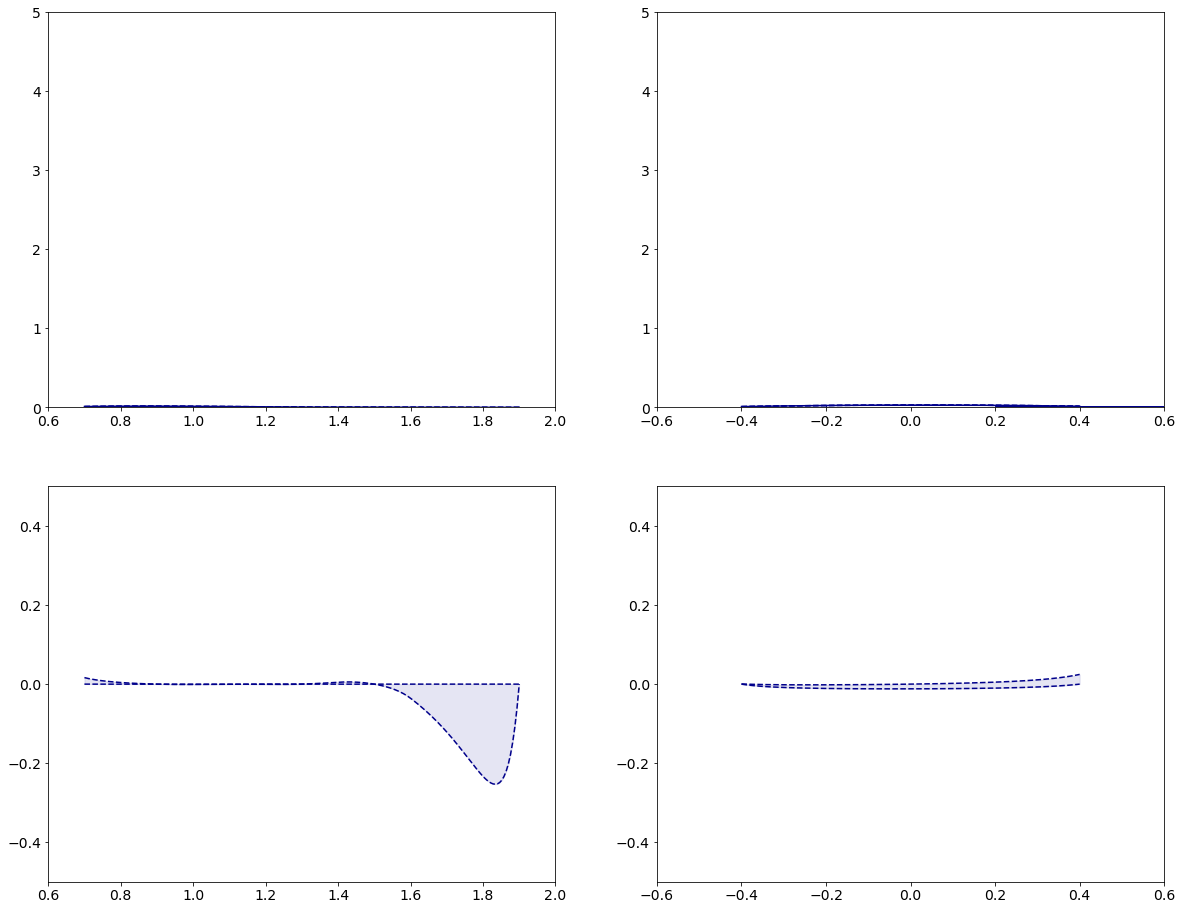

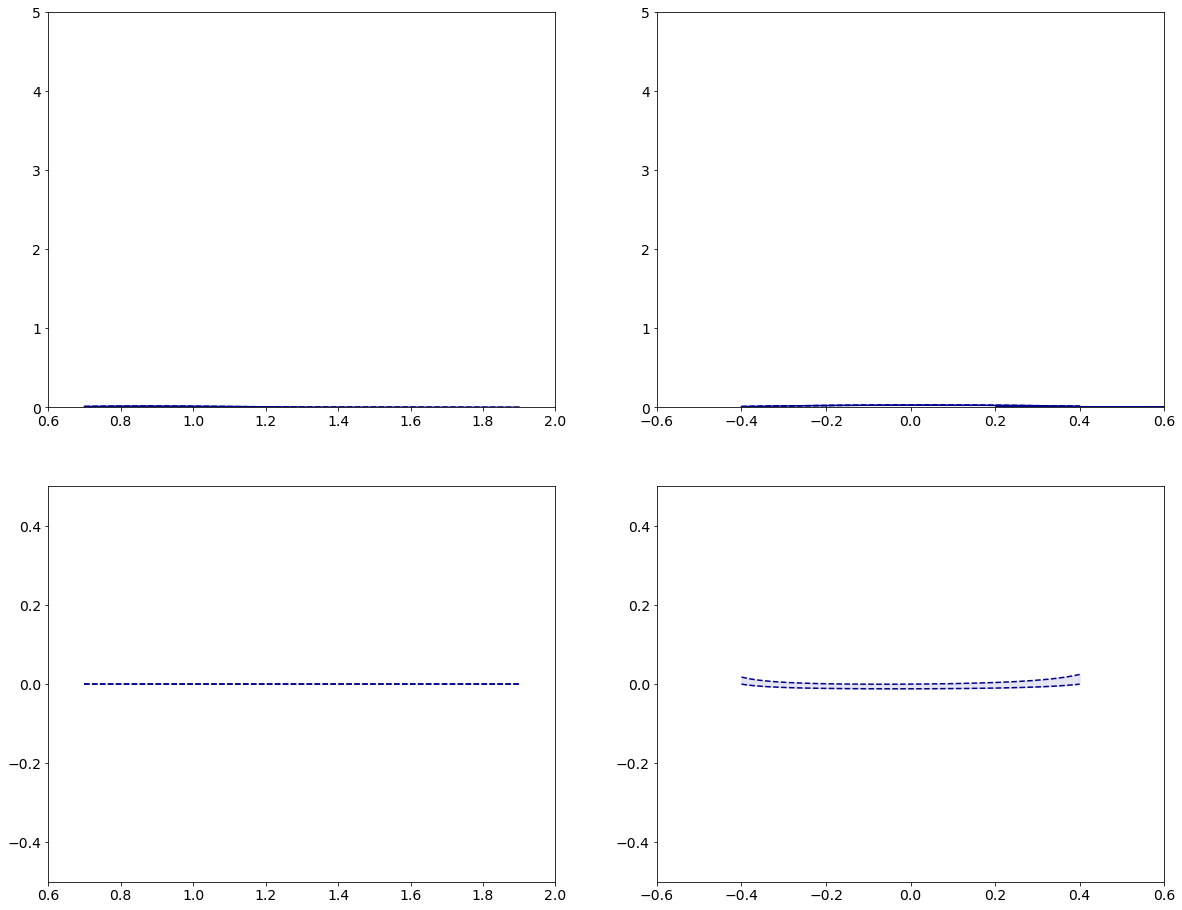

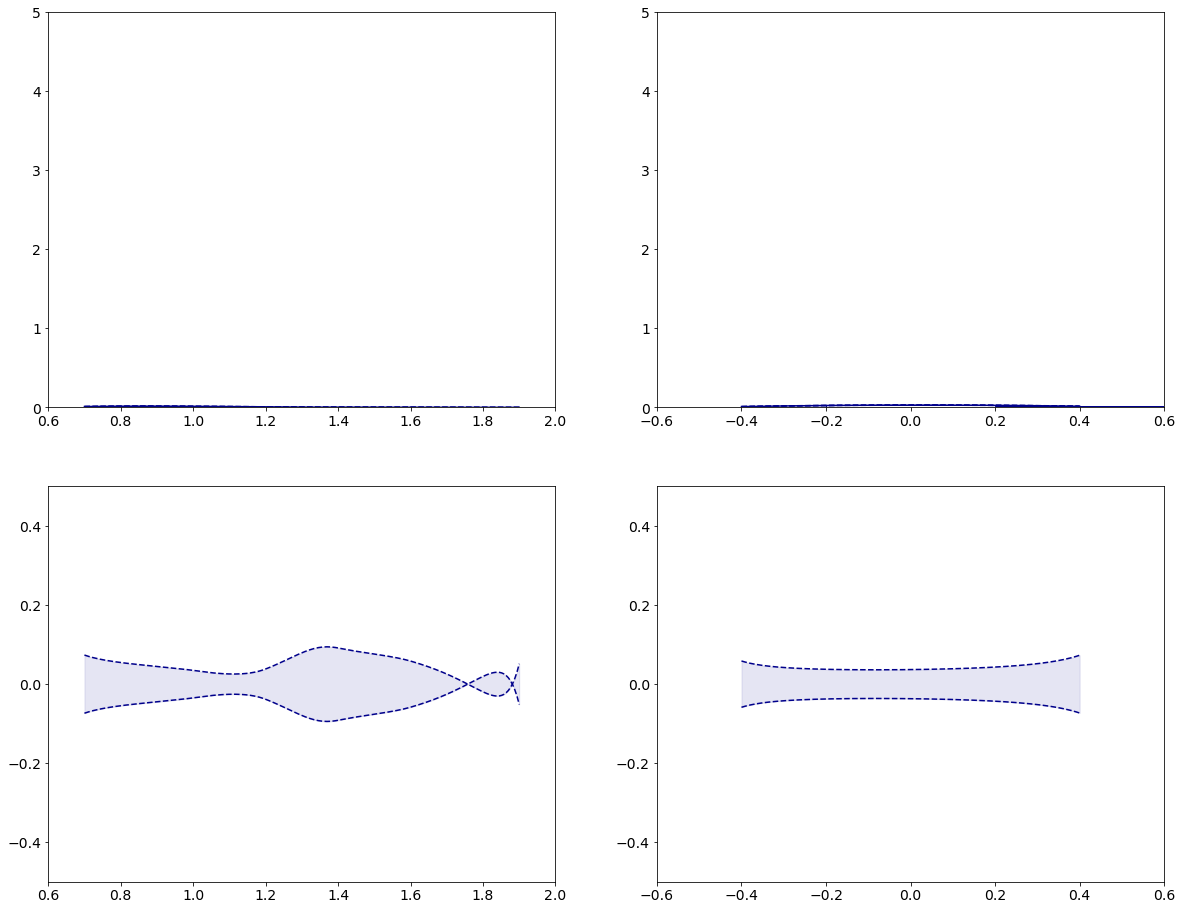

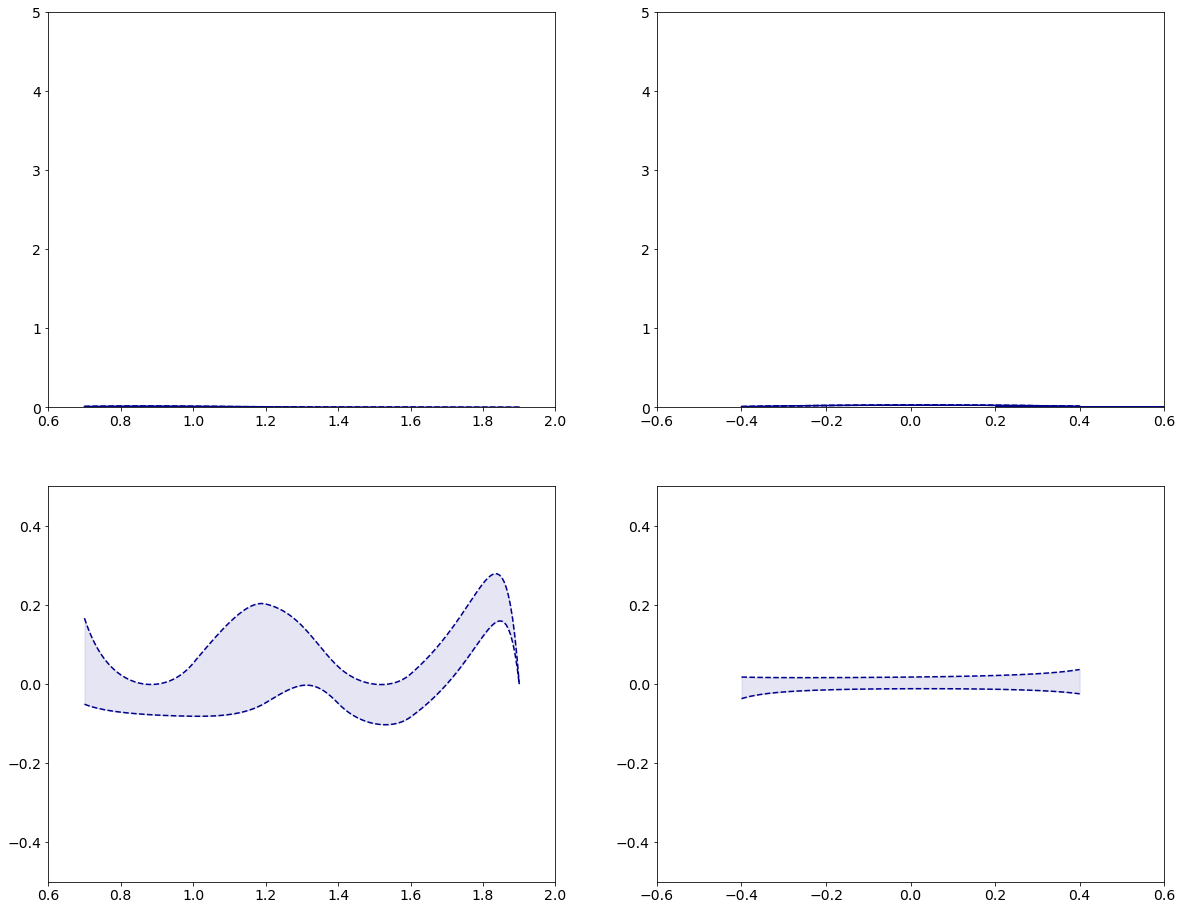

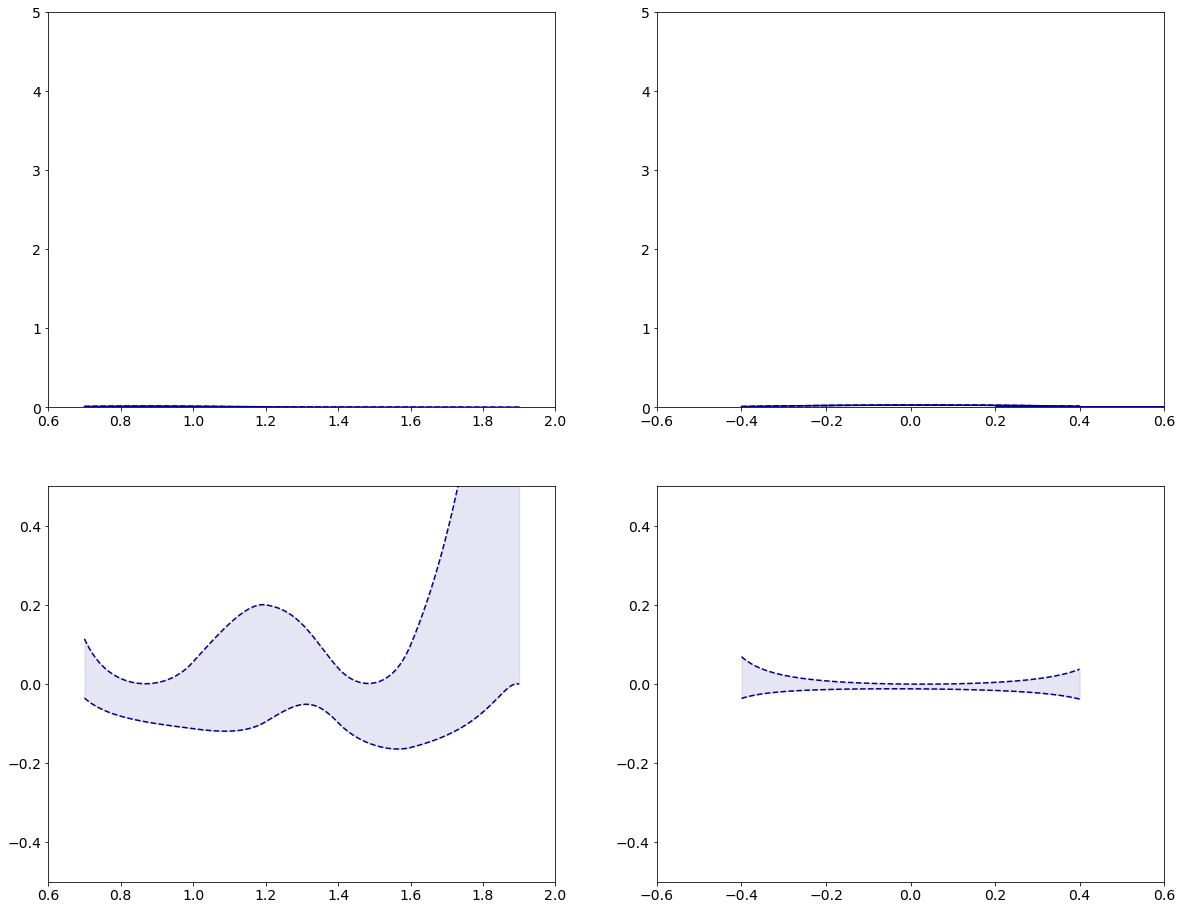

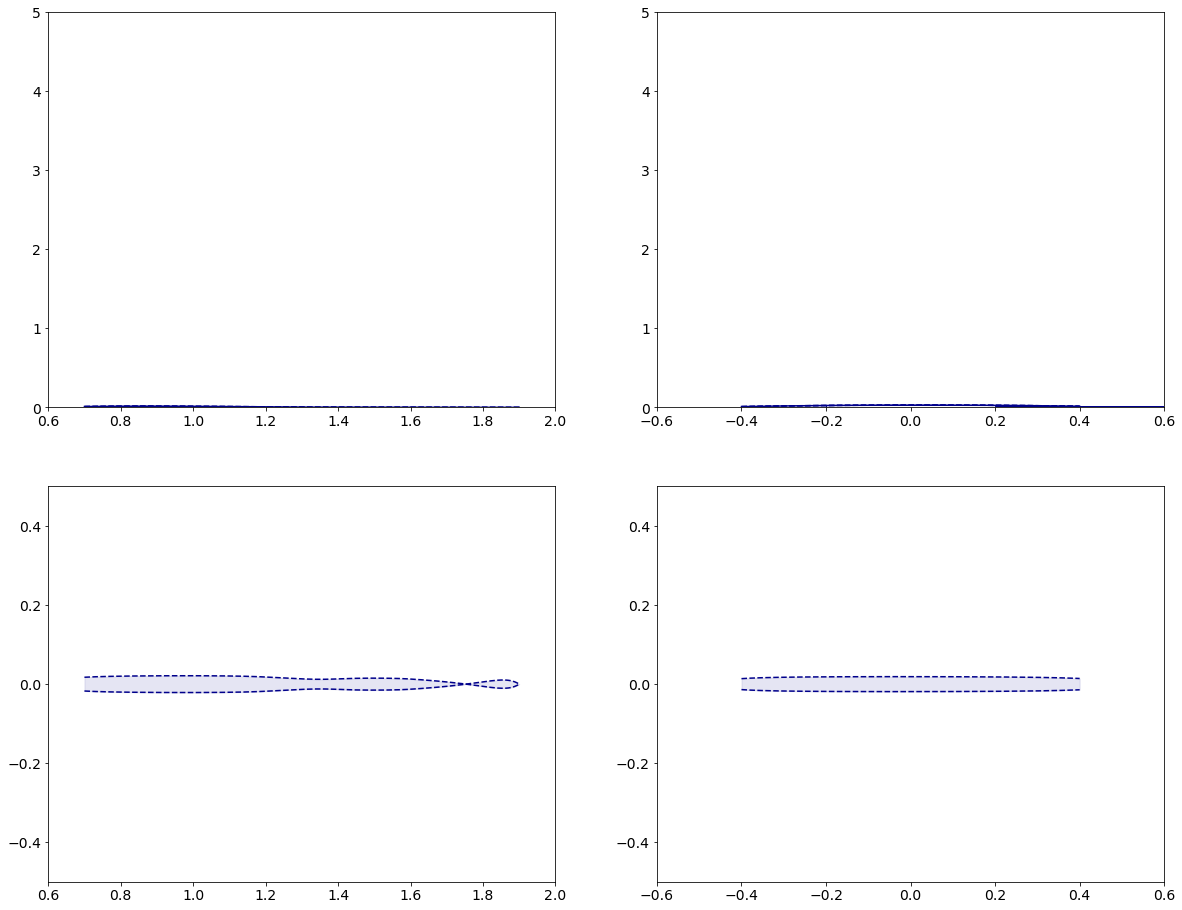

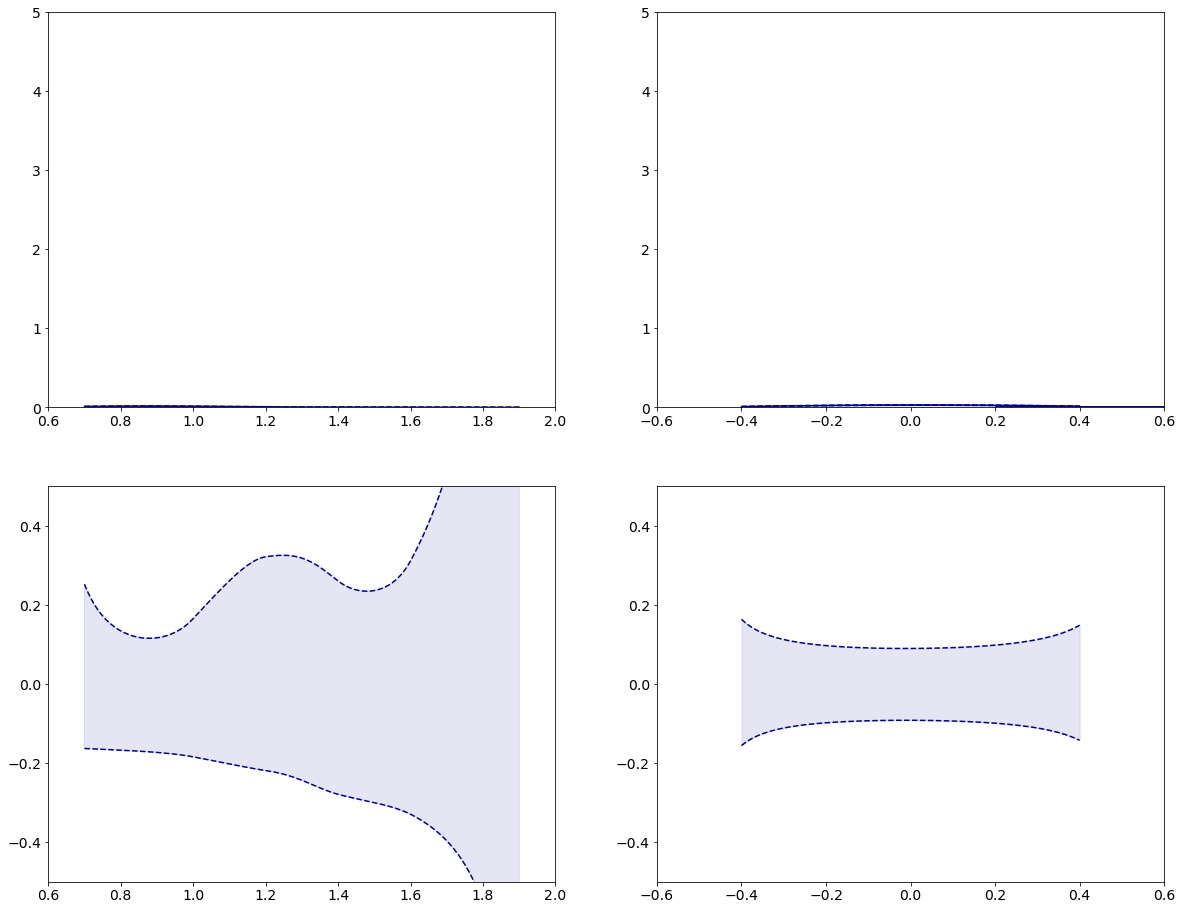

In [71]:
if data_sample == '2018':
    # ylim_ = (0.,0.3)
    ylim_ = (0.,5.)
    ylim_ratio_ = (-0.50,0.50)
    color_ = "darkblue"

    counts = {}
    err = {}
    bins = {}
    max_variations_total = {}
    min_variations_total = {}

    label_ = ""
    coupling_str_ = "A0W5e-7"
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

    counts[ label_ ], err[ label_ ], bins[ label_ ], max_variations_total[ label_ ], min_variations_total[ label_ ] = plot_total_systematic(
        df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
        weights_dict=weights_sig_plus_mix_categories_concat,
        lepton_type=lepton_type,
        label=label_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_
        )

GGToWW-AQGC-2018-electron-A0W1e-6
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[0.01973113 0.03937696 0.03483643 0.01594025 0.01334119 0.00724598
 0.00297943]
[0.01973113 0.03937696 0.03460999 0.01527207 0.01289231 0.00724598
 0.00297943]
0      0.000000
1     -0.000185
2     -0.000342
3     -0.000477
4     -0.000591
         ...   
195   -0.009653
196   -0.007706
197   -0.005463
198   -0.002901
199    0.000000
Length: 200, dtype: float64 0.010450553428563459
0      0.000000
1     -0.000043
2     -0.000079
3     -0.000110
4     -0.000136
         ...   
195   -0.000956
196   -0.000763
197   -0.000541
198   -0.000287
199    0.000000
Length: 200, dtype: float64 -0.00238359664252936
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[0.02375016 0.07802794 0.04330801]
[0.02352866 0.07802794 0.04263888]
0      0.009414
1      0.008759
2      0.008161
3      0.007614
4      0.007112
         ...   
195    0.013817
196    0.014300
197    0.014804
198    0.015332
199    0.015886
Length: 2

GGToWW-AQGC-2018-electron-A0W1e-6
R_MWW_MX
[0.01973113 0.03937696 0.03460999 0.01549042 0.01289231 0.00724598
 0.00297943]
[0.02183509 0.04236331 0.0374     0.01735593 0.01460064 0.00852736
 0.00380605]
[0.01762717 0.03639061 0.03181998 0.0136249  0.01118397 0.00596461
 0.0021528 ]
[0.0227792  0.04622207 0.04041848 0.01805812 0.0153472  0.00897376
 0.0040636 ]
[0.01649361 0.03261893 0.02689136 0.0133216  0.01066704 0.00530261
 0.00208169]
0      0.154480
1      0.156458
2      0.158212
3      0.159777
4      0.161179
         ...   
195    0.342251
196    0.347483
197    0.352834
198    0.358303
199    0.363885
Length: 200, dtype: float64 0.19776511423269827
0     -0.164082
1     -0.162658
2     -0.161468
3     -0.160479
4     -0.159665
         ...   
195   -0.315817
196   -0.313120
197   -0.309834
198   -0.305913
199   -0.301311
Length: 200, dtype: float64 -0.20301081908659932
Diff_YWW_YX
[0.02352866 0.07802794 0.04263079]
[0.02582556 0.08222438 0.04573291]
[0.02123177 0.0738315  0.0

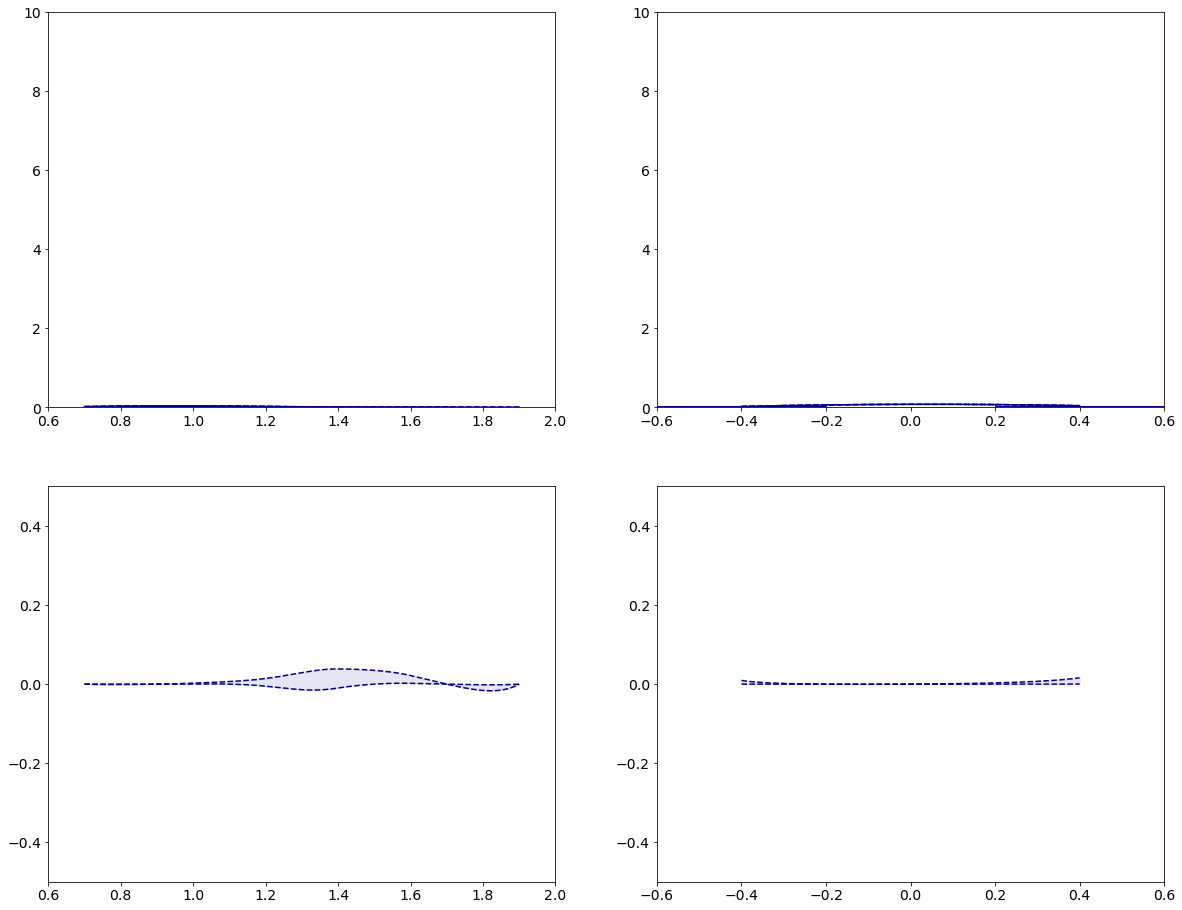

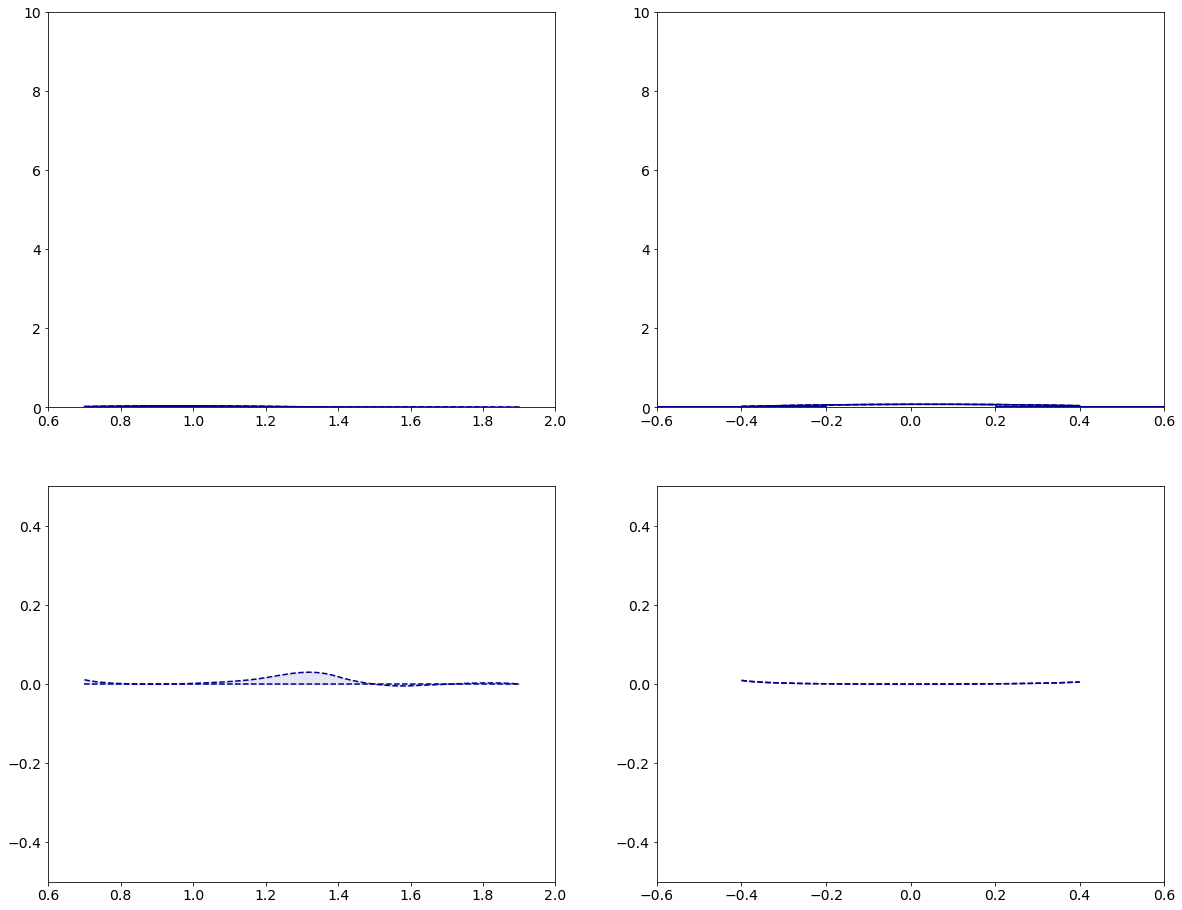

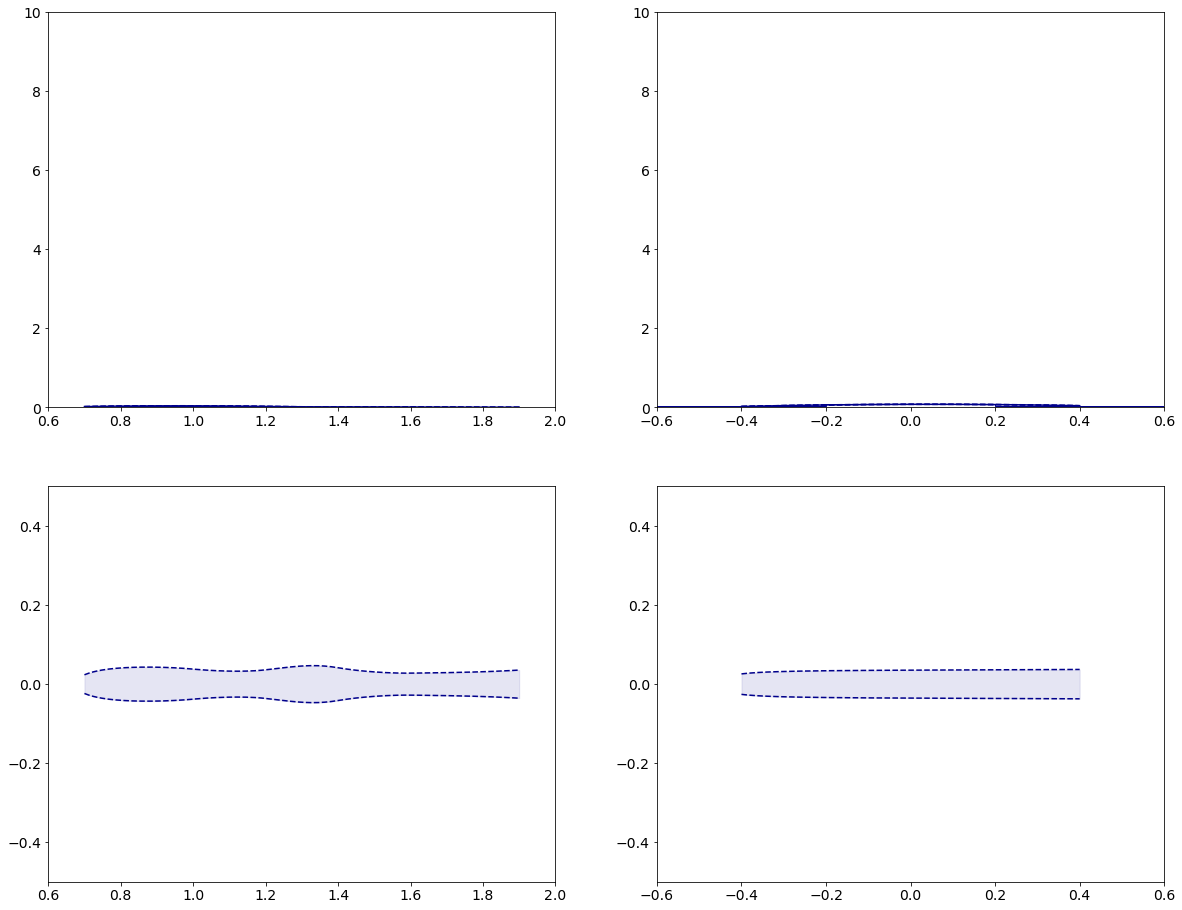

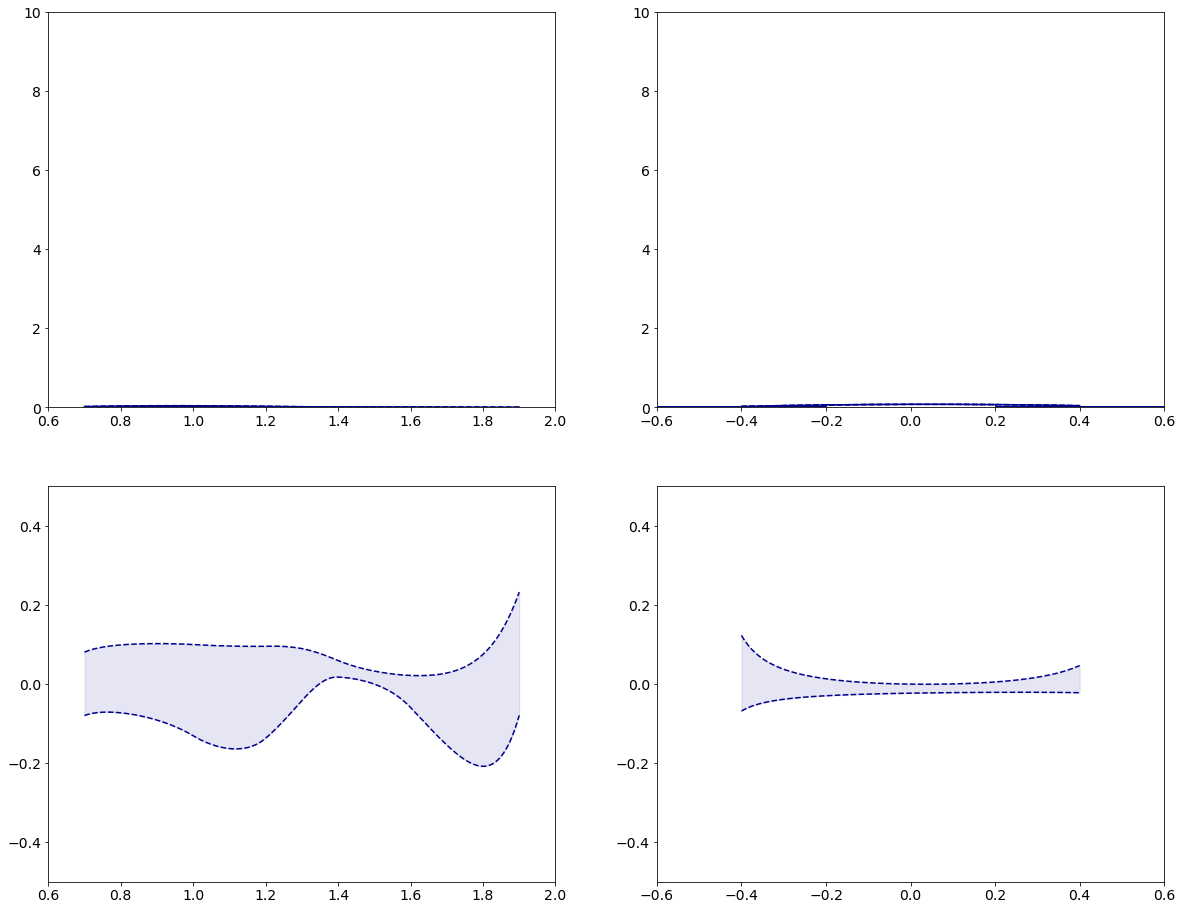

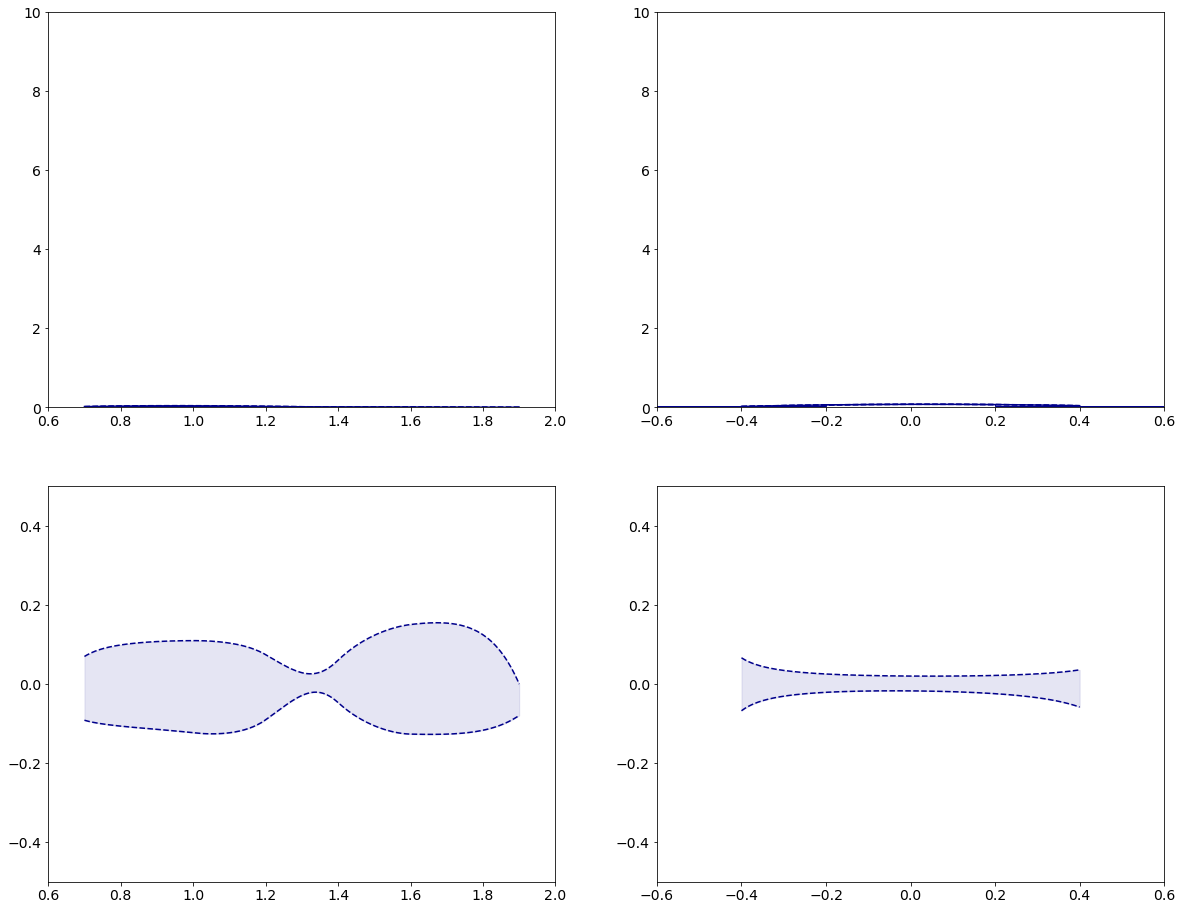

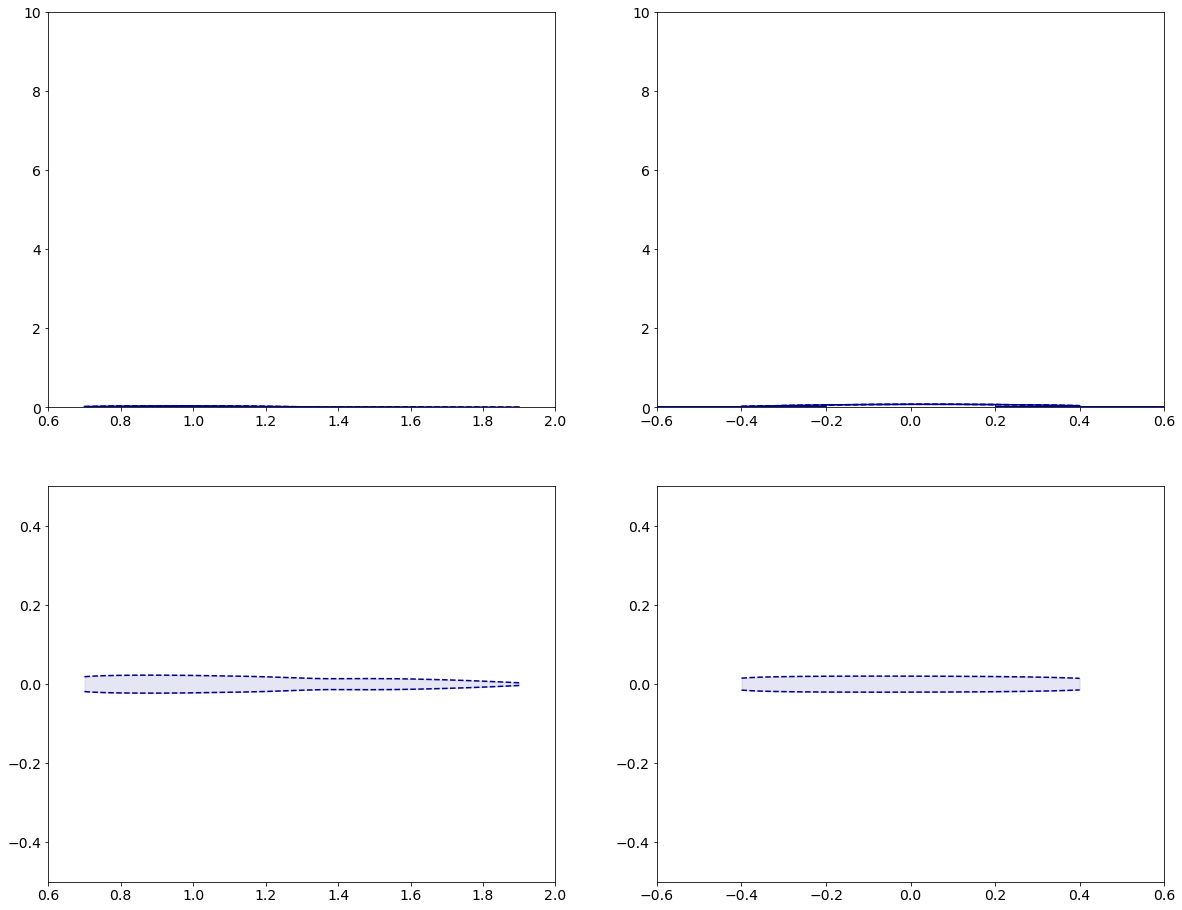

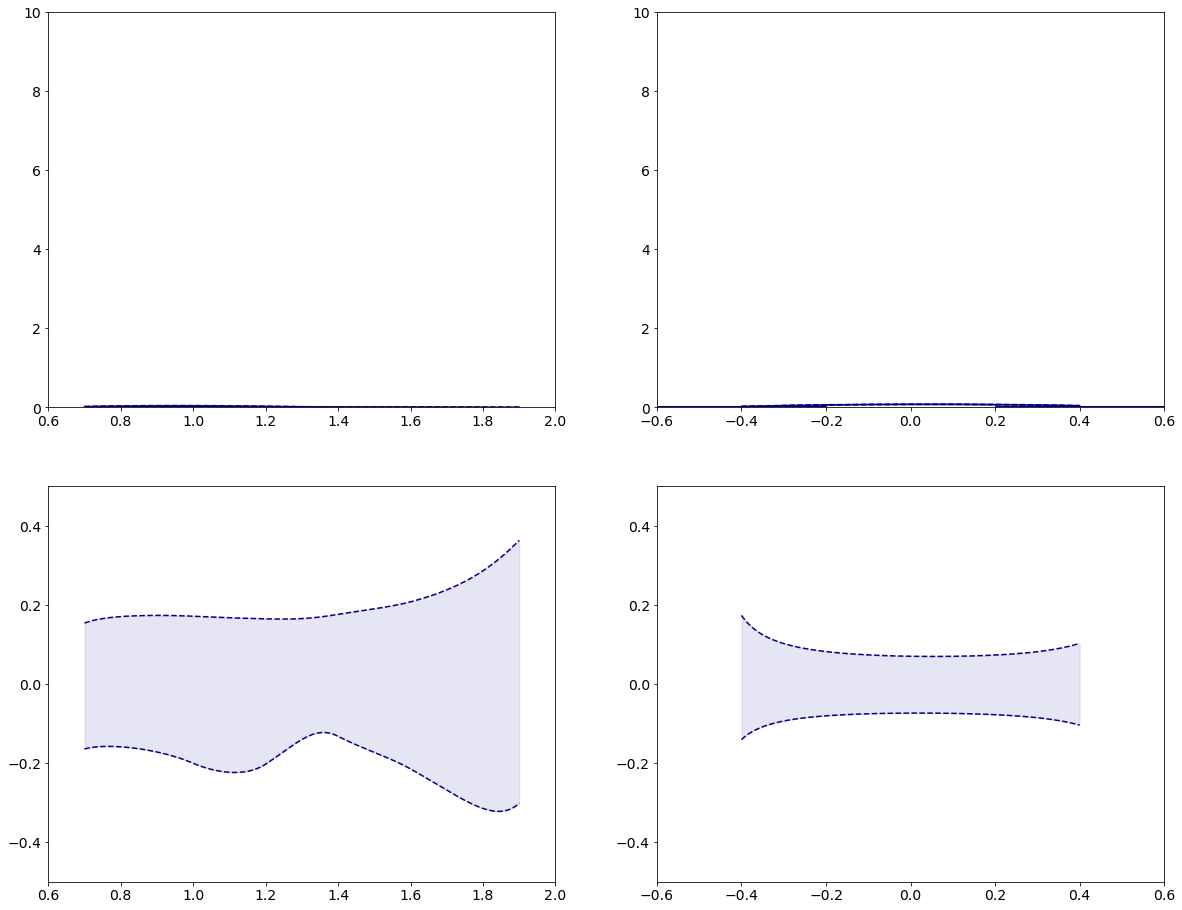

In [72]:
# ylim_ = (0.,0.3)
ylim_ = (0.,10.)
ylim_ratio_ = (-0.50,0.50)
color_ = "darkblue"

label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W1e-6"
#         label_ = "GGToWW-AQGC-muon-A0W1e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W1e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
if data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_
    
counts[ label_ ], err[ label_ ], bins[ label_ ], max_variations_total[ label_ ], min_variations_total[ label_ ] = plot_total_systematic(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    lepton_type=lepton_type,
    label=label_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_
    )

GGToWW-AQGC-2018-electron-A0W2e-6
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[0.03745177 0.08513511 0.07471179 0.04100425 0.02478088 0.01683709
 0.00905677]
[0.03727699 0.08424684 0.07417171 0.04047569 0.02386793 0.01647874
 0.00851225]
0      0.004718
1      0.005351
2      0.005891
3      0.006356
4      0.006758
         ...   
195    0.027020
196    0.030056
197    0.033363
198    0.036966
199    0.040895
Length: 200, dtype: float64 0.008221910164093536
0      0.000029
1     -0.000084
2     -0.000186
3     -0.000280
4     -0.000367
         ...   
195   -0.020611
196   -0.020831
197   -0.021082
198   -0.021366
199   -0.021687
Length: 200, dtype: float64 -0.010848139848608546
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[0.05520367 0.17505783 0.08599897]
[0.05469344 0.17450853 0.08435245]
0      0.002935
1      0.002791
2      0.002659
3      0.002539
4      0.002430
         ...   
195    0.013257
196    0.013673
197    0.014110
198    0.014572
199    0.015059
Length: 

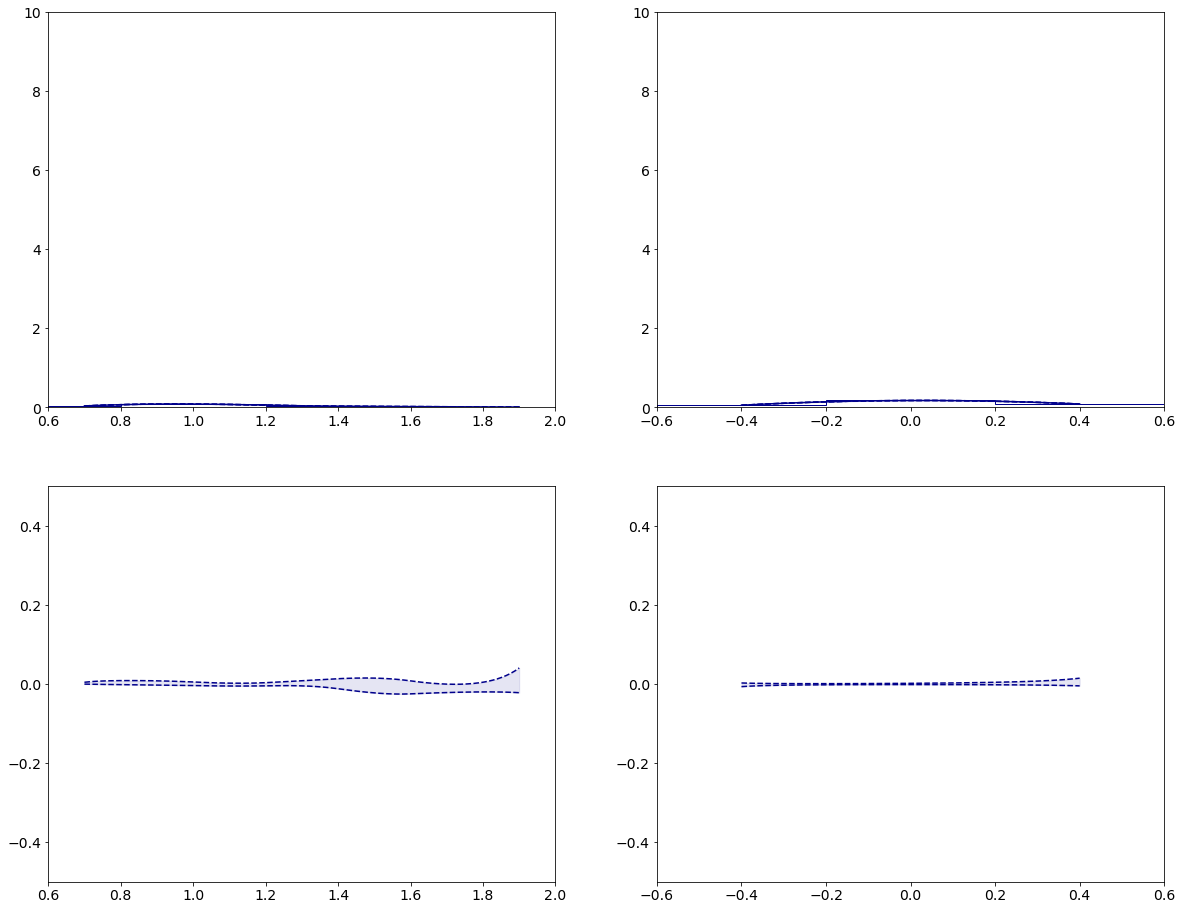

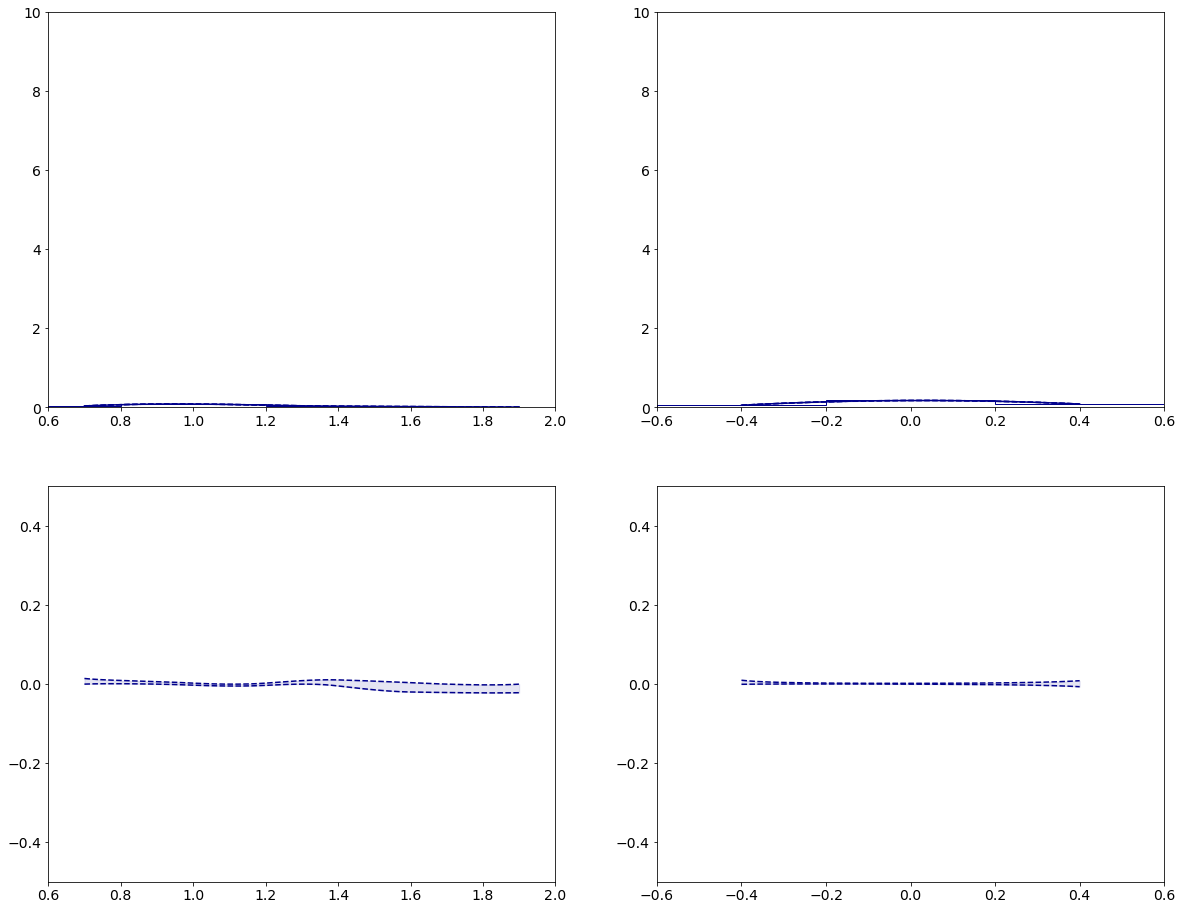

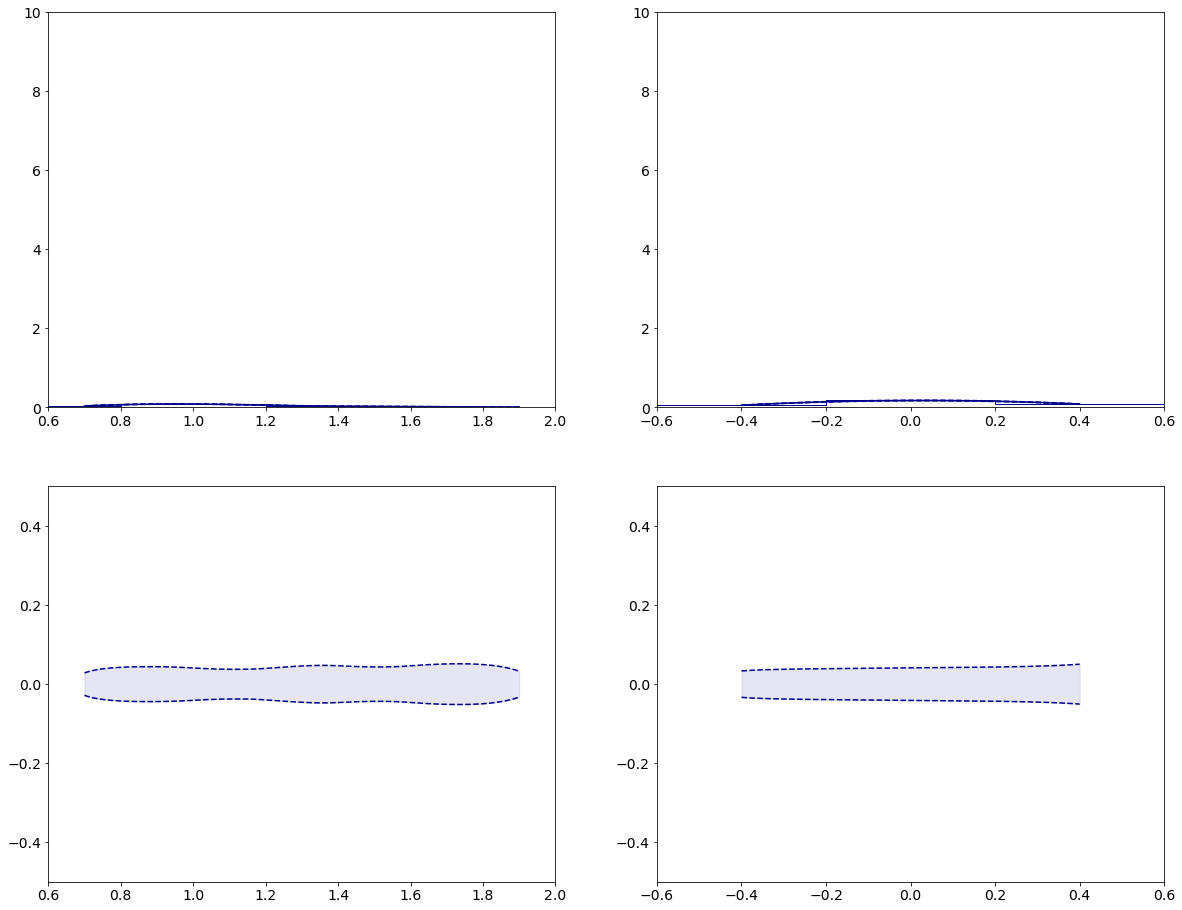

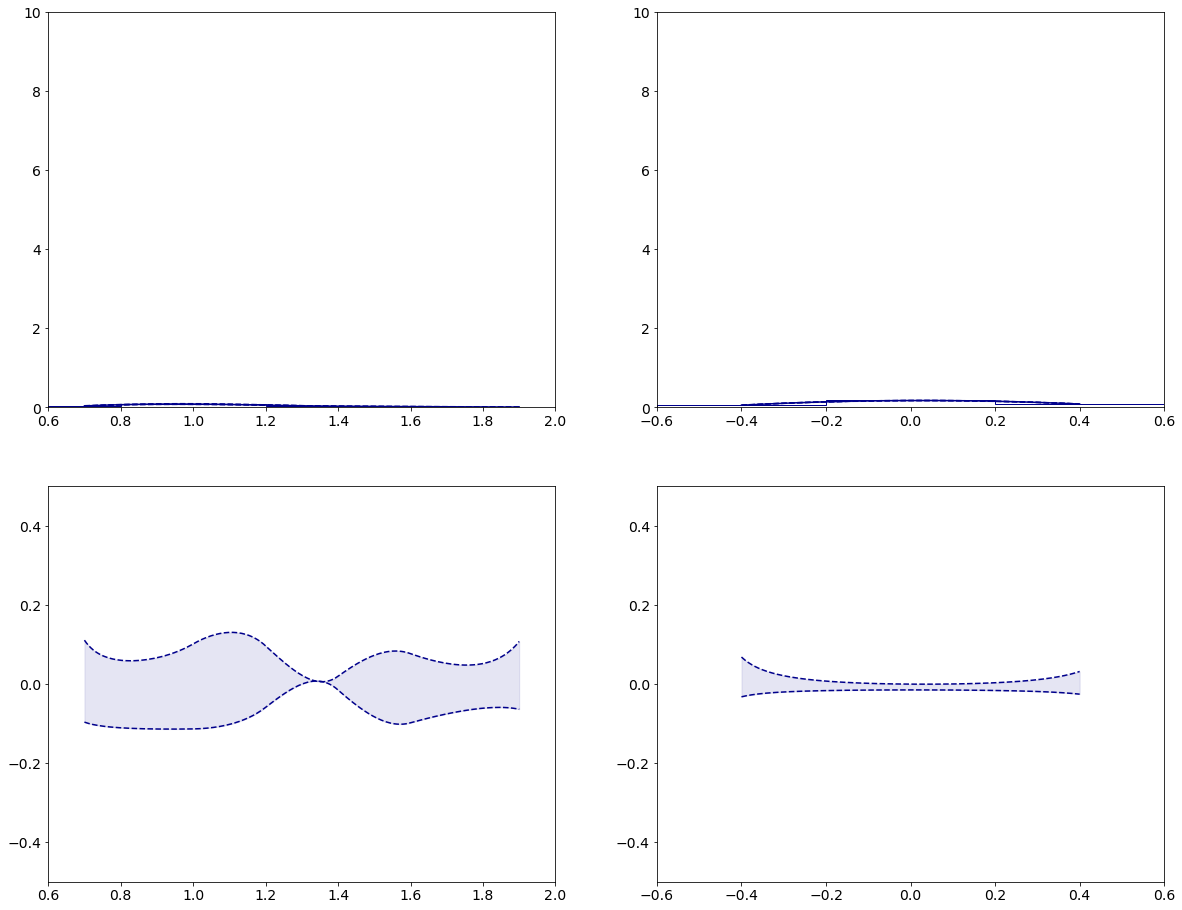

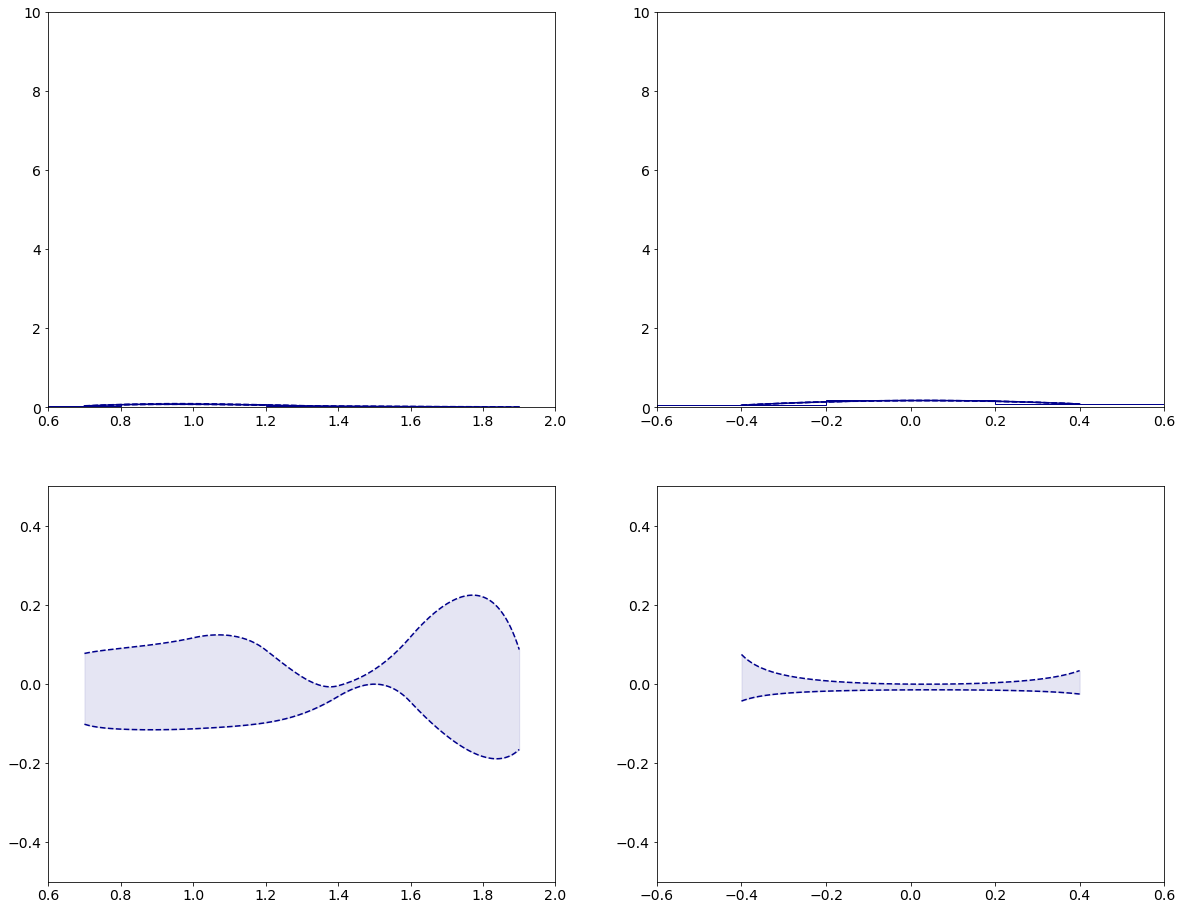

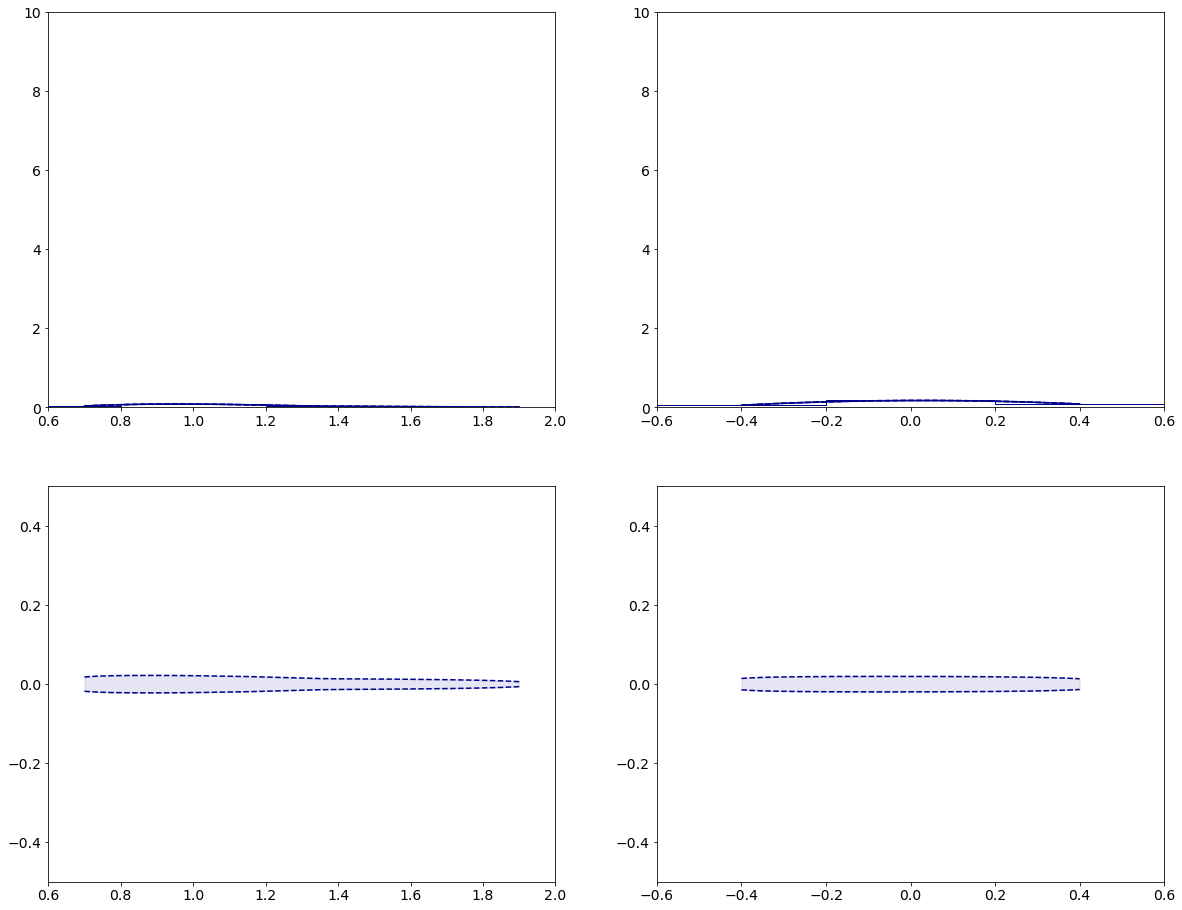

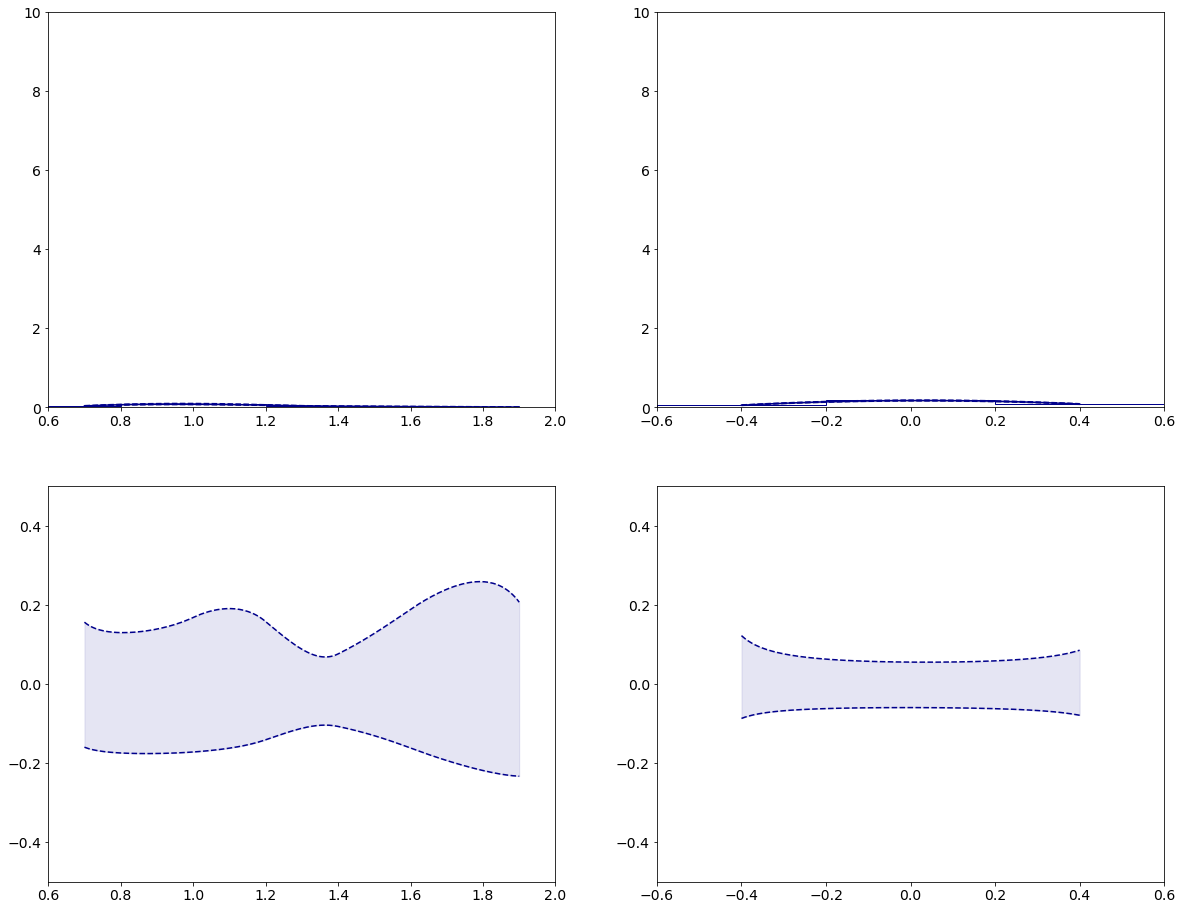

In [73]:
label_ = ""
coupling_str_ = "A0W2e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
if data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

# ylim_ = (0.,0.5)
# ylim_ = (0.,1.)
ylim_ = (0.,10.)
counts[ label_ ], err[ label_ ], bins[ label_ ], max_variations_total[ label_ ], min_variations_total[ label_ ] = plot_total_systematic(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    lepton_type=lepton_type,
    label=label_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_
    )

GGToWW-AQGC-2018-electron-A0W5e-6
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[0.09689566 0.24390065 0.21814545 0.12595138 0.08029929 0.05696904
 0.0246545 ]
[0.09643072 0.24387952 0.21742866 0.12570847 0.07911355 0.05629989
 0.02442902]
0      0.007194
1      0.006188
2      0.005335
3      0.004605
4      0.003974
         ...   
195    0.002053
196    0.001605
197    0.001118
198    0.000585
199    0.000000
Length: 200, dtype: float64 0.003663120198013233
0      0.002361
1      0.002052
2      0.001787
3      0.001556
4      0.001353
         ...   
195   -0.006713
196   -0.007218
197   -0.007785
198   -0.008424
199   -0.009146
Length: 200, dtype: float64 -0.002556183546966959
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[0.15713217 0.48921657 0.27027521]
[0.15668673 0.48618915 0.26930553]
0     -0.001432
1     -0.001184
2     -0.000955
3     -0.000744
4     -0.000549
         ...   
195    0.003479
196    0.003468
197    0.003457
198    0.003446
199    0.003433
Length: 

GGToWW-AQGC-2018-electron-A0W5e-6
R_MWW_MX
[0.09620355 0.24411176 0.2179034  0.12570834 0.07959738 0.05651133
 0.0246545 ]
[0.10091632 0.25163406 0.22501744 0.13111014 0.08389702 0.0601306
 0.02705025]
[0.09149077 0.23658945 0.21078936 0.12030654 0.07529774 0.05289206
 0.02225874]
[0.11285759 0.27817379 0.26162215 0.13528961 0.08828334 0.06269682
 0.03221533]
[0.08424252 0.19669768 0.18278187 0.11406098 0.07294648 0.04708627
 0.02053045]
0      0.173113
1      0.165967
2      0.160010
3      0.155003
4      0.150765
         ...   
195    0.241967
196    0.255715
197    0.270932
198    0.287832
199    0.306672
Length: 200, dtype: float64 0.13626801291333634
0     -0.124330
1     -0.133485
2     -0.141227
3     -0.147845
4     -0.153554
         ...   
195   -0.182007
196   -0.179160
197   -0.175805
198   -0.171872
199   -0.167274
Length: 200, dtype: float64 -0.14576401622081428
Diff_YWW_YX
[0.15735744 0.48756292 0.26935047]
[0.16339883 0.49819929 0.27724832]
[0.15131605 0.47692654 0.26

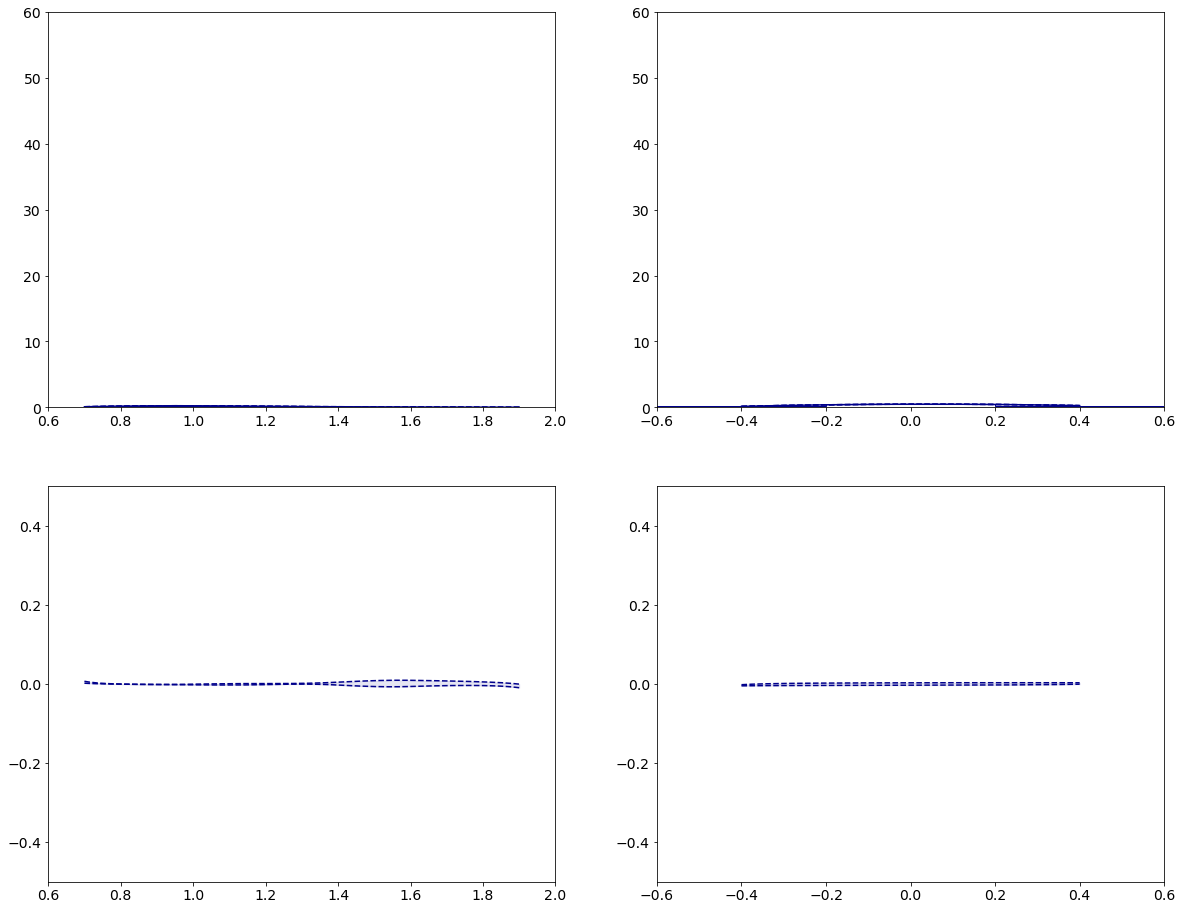

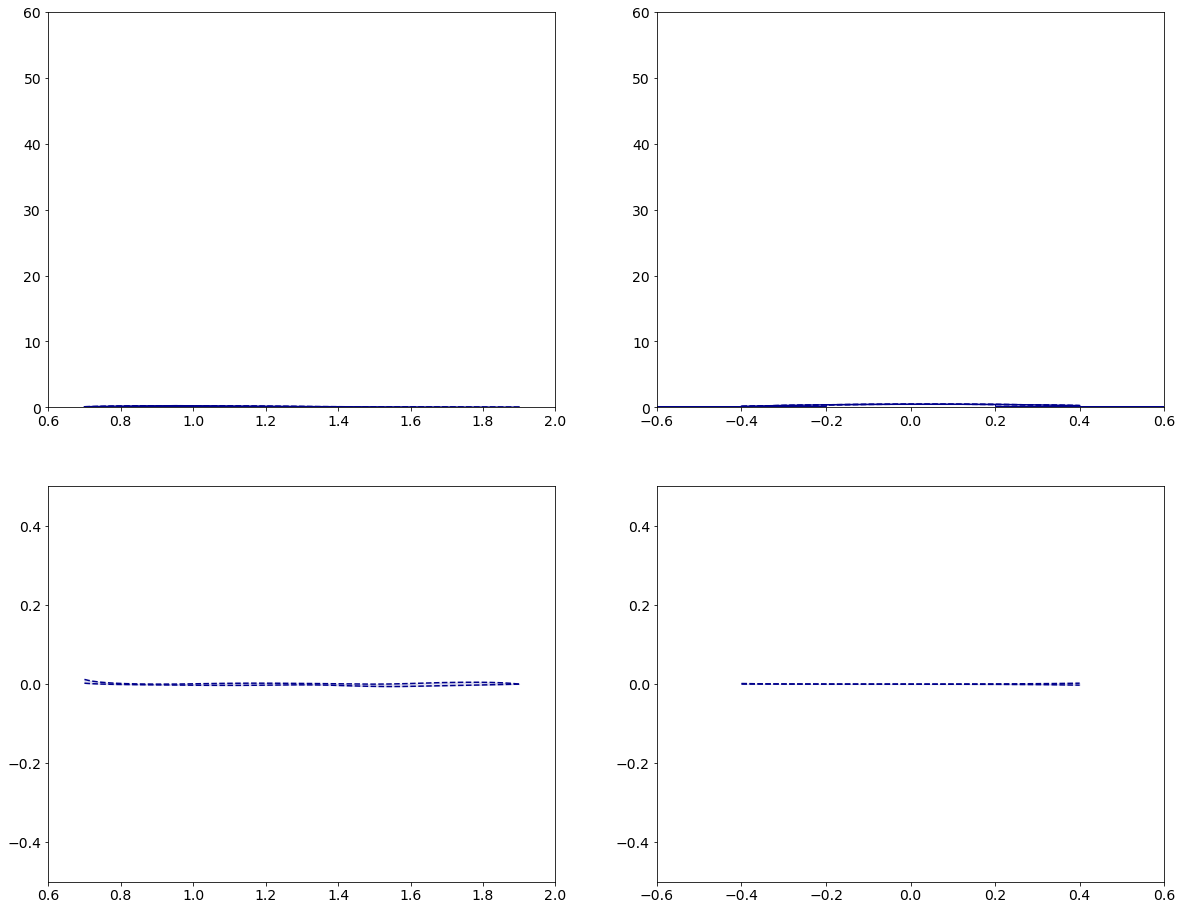

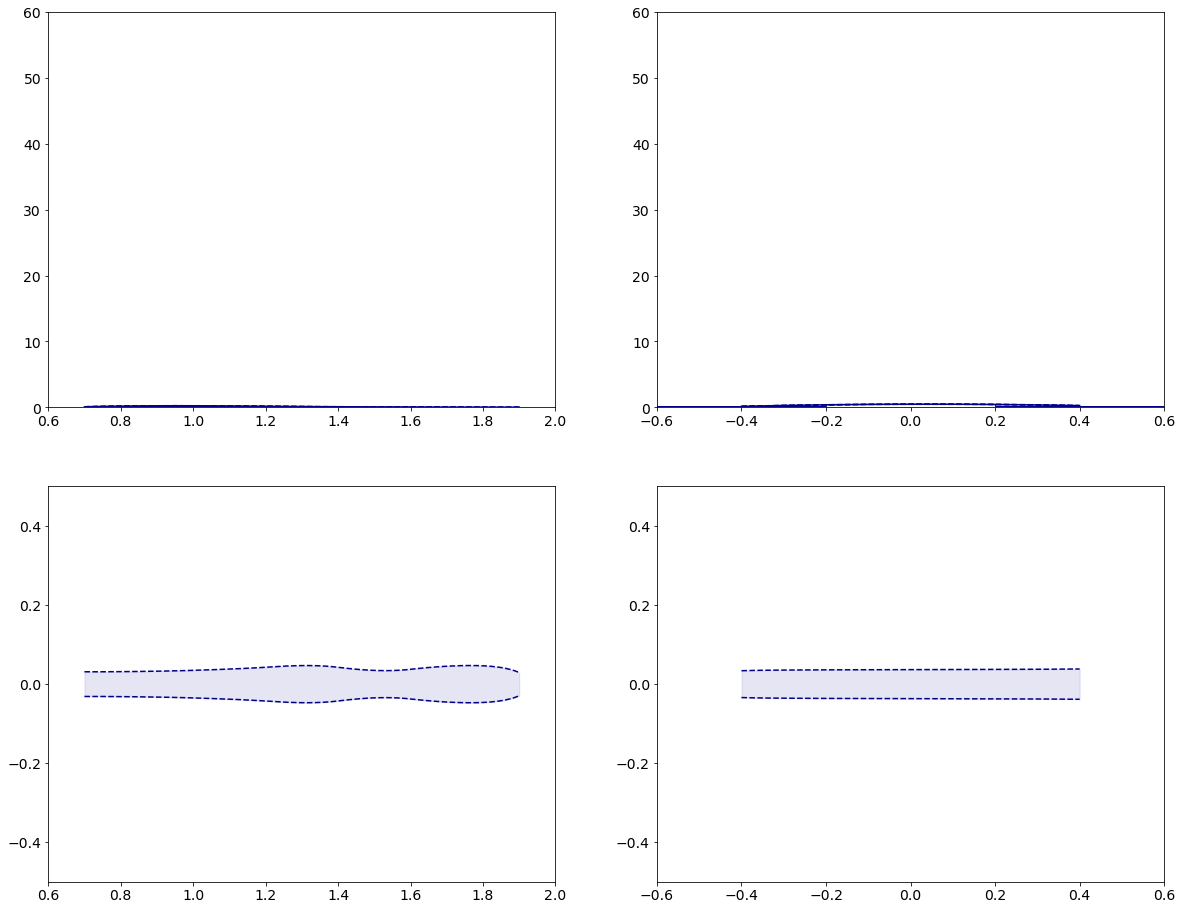

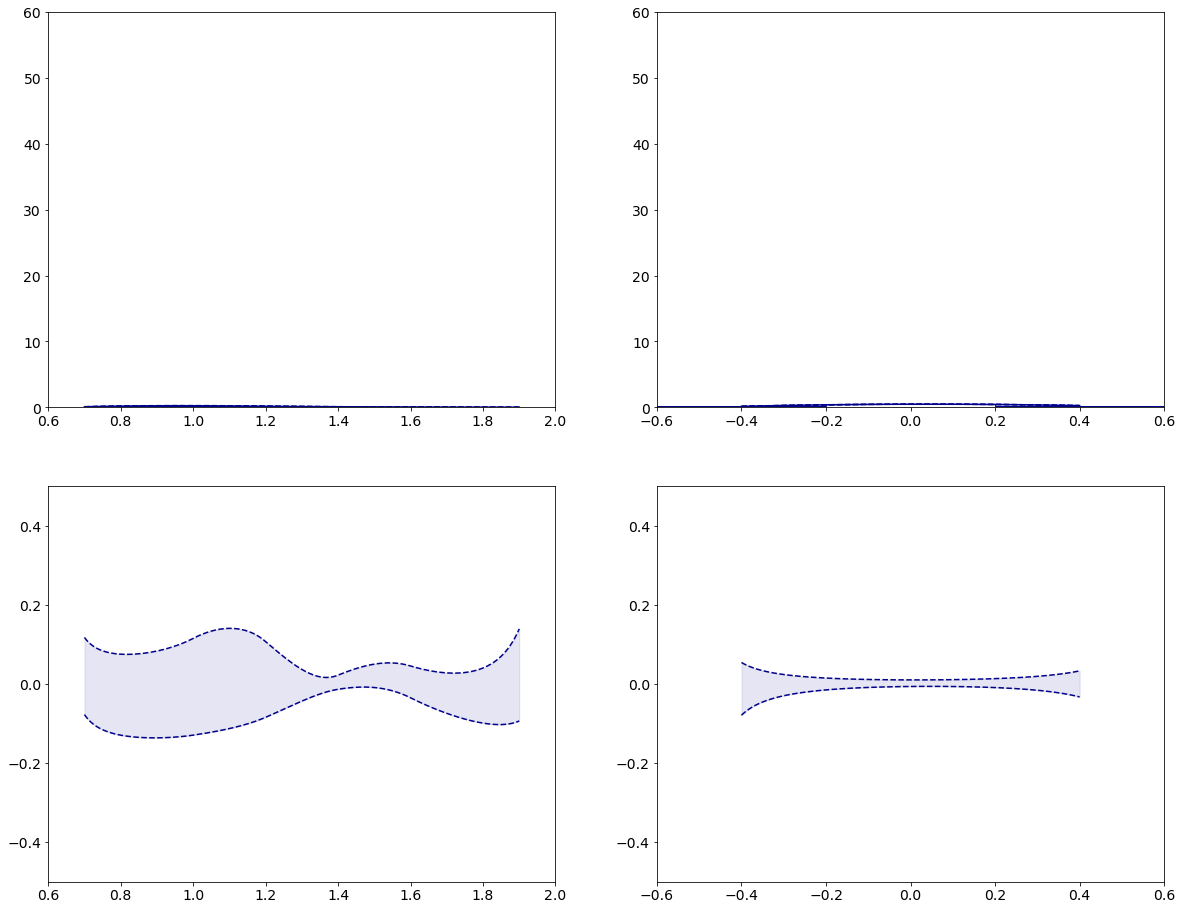

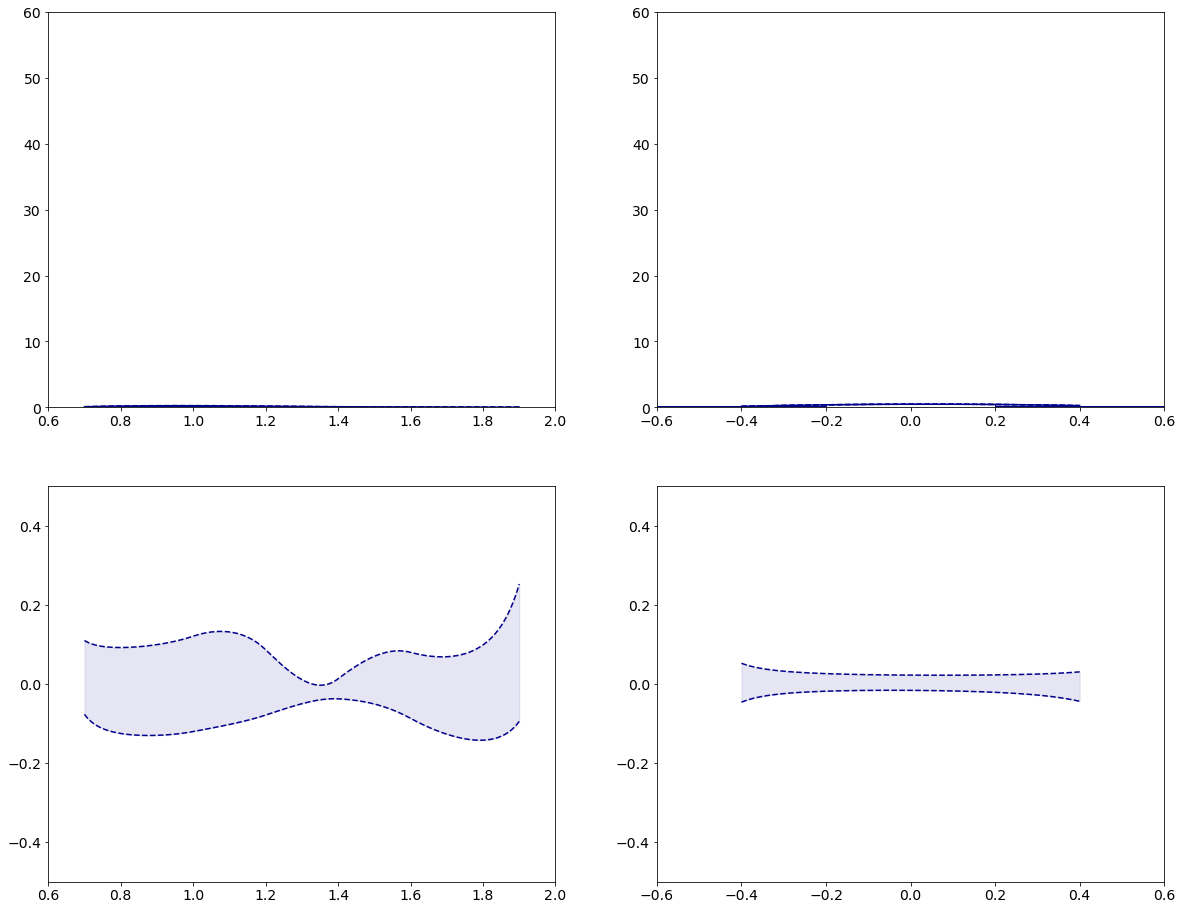

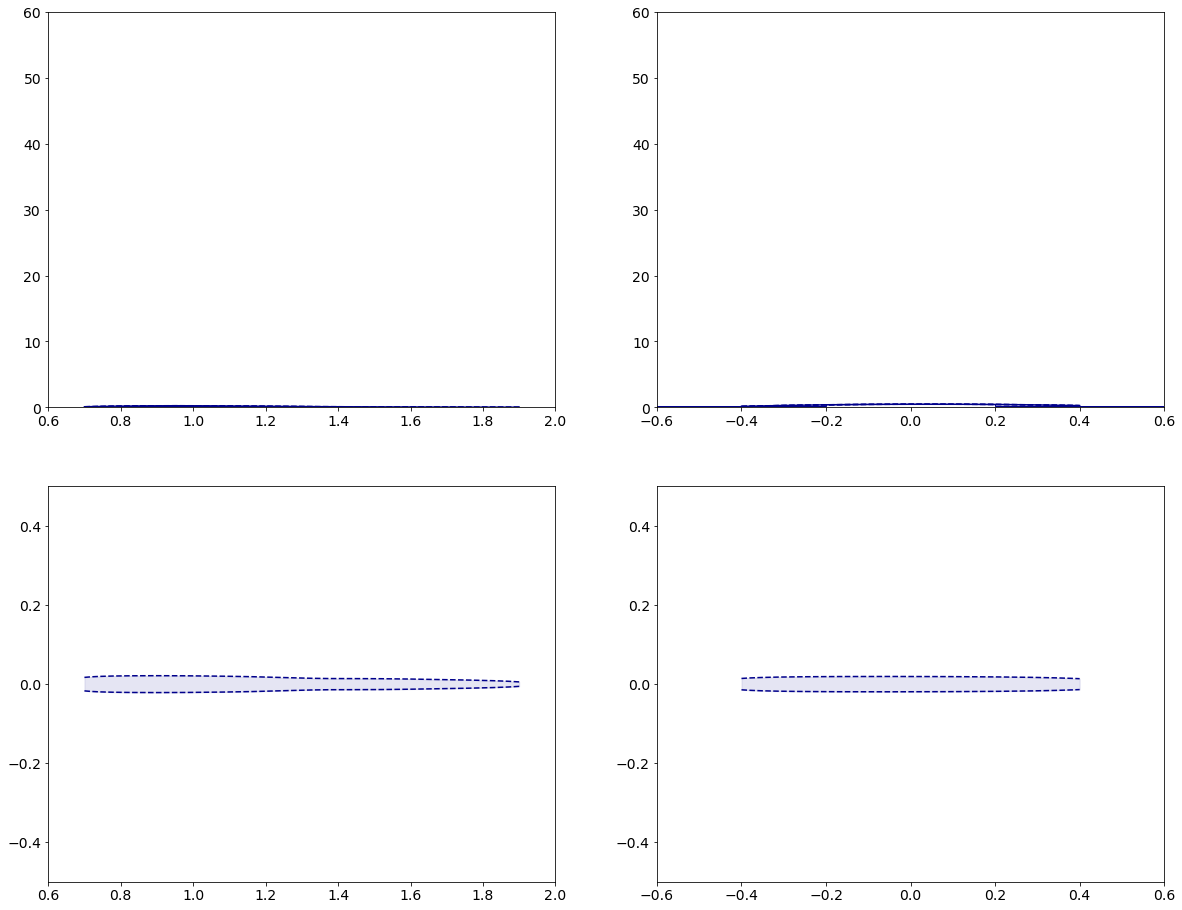

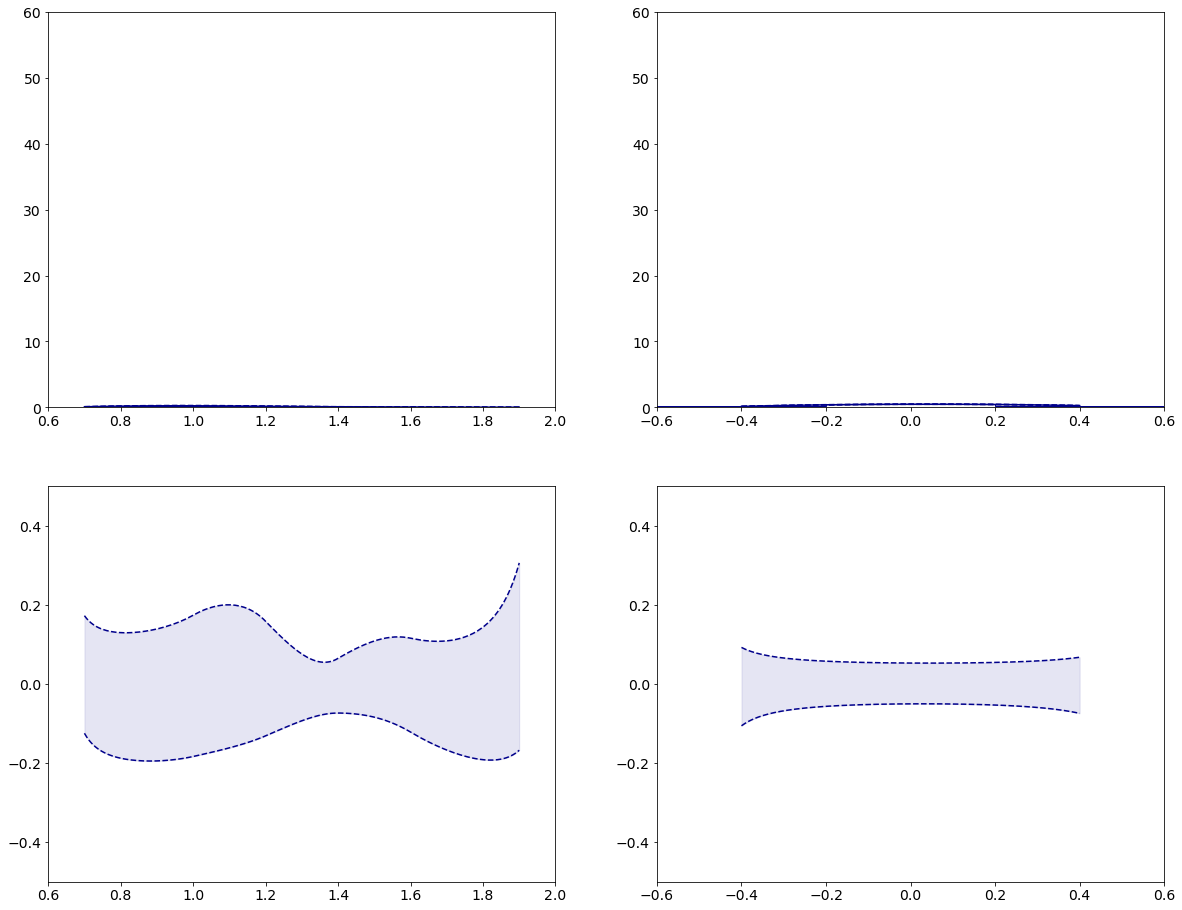

In [74]:
label_ = ""
coupling_str_ = "A0W5e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W5e-6"
#         label_ = "GGToWW-AQGC-muon-A0W5e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W5e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
if data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

# ylim_ = (0.,3.)
# ylim_ = (0.,5.)
ylim_ = (0.,60.)
counts[ label_ ], err[ label_ ], bins[ label_ ], max_variations_total[ label_ ], min_variations_total[ label_ ] = plot_total_systematic(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    lepton_type=lepton_type,
    label=label_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_
    )

In [75]:
print ( counts )
print ( err )
print ( bins )
print ( max_variations_total )
print ( min_variations_total )

{'GGToWW-AQGC-2018-electron-A0W5e-7': {'R_MWW_MX': array([0.01064743, 0.01597213, 0.00925158, 0.00364751, 0.003614  ,
       0.00146235, 0.00018676]), 'Diff_YWW_YX': array([0.01010187, 0.02950957, 0.01431689])}, 'GGToWW-AQGC-2018-electron-A0W1e-6': {'R_MWW_MX': array([0.01973113, 0.03937696, 0.03460999, 0.01549042, 0.01289231,
       0.00724598, 0.00297943]), 'Diff_YWW_YX': array([0.02352866, 0.07802794, 0.04263079])}, 'GGToWW-AQGC-2018-electron-A0W2e-6': {'R_MWW_MX': array([0.03727589, 0.08442967, 0.0745262 , 0.04065289, 0.02440906,
       0.01683709, 0.00870095]), 'Diff_YWW_YX': array([0.0550421 , 0.1747036 , 0.08472314])}, 'GGToWW-AQGC-2018-electron-A0W5e-6': {'R_MWW_MX': array([0.09620355, 0.24411176, 0.2179034 , 0.12570834, 0.07959738,
       0.05651133, 0.0246545 ]), 'Diff_YWW_YX': array([0.15735744, 0.48756292, 0.26935047])}}
{'GGToWW-AQGC-2018-electron-A0W5e-7': {'R_MWW_MX': array([0.00138668, 0.00169364, 0.00129597, 0.00081595, 0.00080844,
       0.00051723, 0.00018676]), 'Dif

### Background

### Load and select events

In [76]:
# # resample_factor = 20
# resample_factor = 50
# # label = "data-random-resample_20"
# label = "data-random-resample_50-single-arm"

# df_counts_bkg = None
# df_protons_multiRP_bkg_index = None
# df_protons_multiRP_bkg_events = None

# base_path_ = "output"
# file_path_ = "{}/data-store-{}.h5".format( base_path_, label )
# print ( file_path_ )
# with pd.HDFStore( file_path_, 'r' ) as store_:
#     print ( list( store_ ) )
#     df_counts_bkg = store_[ "counts" ]
# #     df_protons_multiRP_bkg_index = store_[ "protons_multiRP" ]
#     df_protons_multiRP_bkg_events = store_[ "events_multiRP" ]

In [77]:
# resample_factor = 20
resample_factor = 50

# label = "data-random-resample_20"
# label = "data-random-resample_50-single-arm"

labels_background = []
fileNames_bkg = {}
if data_sample == '2017':
    if lepton_type == 'muon':
        labels_background = [
            "data-random-resample_50-single-arm-muon-2017B",
            "data-random-resample_50-single-arm-muon-2017C",
            "data-random-resample_50-single-arm-muon-2017D",
            "data-random-resample_50-single-arm-muon-2017E",
            "data-random-resample_50-single-arm-muon-2017F"
        ]
        fileNames_bkg = {
            "data-random-resample_50-single-arm-muon-2017B": "data-store-data-random-resample_50-single-arm-2017B.h5",
            "data-random-resample_50-single-arm-muon-2017C": "data-store-data-random-resample_50-single-arm-2017C.h5",
            "data-random-resample_50-single-arm-muon-2017D": "data-store-data-random-resample_50-single-arm-2017D.h5",
            "data-random-resample_50-single-arm-muon-2017E": "data-store-data-random-resample_50-single-arm-2017E.h5",
            "data-random-resample_50-single-arm-muon-2017F": "data-store-data-random-resample_50-single-arm-2017F.h5"
        }
    elif lepton_type == 'electron':
        labels_background = [
            "data-random-resample_50-single-arm-electron-2017B",
            "data-random-resample_50-single-arm-electron-2017C",
            "data-random-resample_50-single-arm-electron-2017D",
            "data-random-resample_50-single-arm-electron-2017E",
            "data-random-resample_50-single-arm-electron-2017F"
        ]
        fileNames_bkg = {
            "data-random-resample_50-single-arm-electron-2017B": "data-store-data-random-resample_50-single-arm-electron-2017B.h5",
            "data-random-resample_50-single-arm-electron-2017C": "data-store-data-random-resample_50-single-arm-electron-2017C.h5",
            "data-random-resample_50-single-arm-electron-2017D": "data-store-data-random-resample_50-single-arm-electron-2017D.h5",
            "data-random-resample_50-single-arm-electron-2017E": "data-store-data-random-resample_50-single-arm-electron-2017E.h5",
            "data-random-resample_50-single-arm-electron-2017F": "data-store-data-random-resample_50-single-arm-electron-2017F.h5"
        }
elif data_sample == '2018':
    if lepton_type == 'muon':
        labels_background = [
            "data-random-resample_50-2018-muon-2018A",
            "data-random-resample_50-2018-muon-2018B",
            "data-random-resample_50-2018-muon-2018C",
            "data-random-resample_50-2018-muon-2018D"
        ]
        fileNames_bkg = {
            "data-random-resample_50-2018-muon-2018A": "data-store-data-random-resample_50-2018-muon-2018A.h5",
            "data-random-resample_50-2018-muon-2018B": "data-store-data-random-resample_50-2018-muon-2018B.h5",
            "data-random-resample_50-2018-muon-2018C": "data-store-data-random-resample_50-2018-muon-2018C.h5",
            "data-random-resample_50-2018-muon-2018D": "data-store-data-random-resample_50-2018-muon-2018D.h5"
        }
    elif lepton_type == 'electron':
        labels_background = [
            "data-random-resample_50-2018-electron-2018A",
            "data-random-resample_50-2018-electron-2018B",
            "data-random-resample_50-2018-electron-2018C",
            "data-random-resample_50-2018-electron-2018D"
        ]
        fileNames_bkg = {
            "data-random-resample_50-2018-electron-2018A": "data-store-data-random-resample_50-2018-electron-2018A.h5",
            "data-random-resample_50-2018-electron-2018B": "data-store-data-random-resample_50-2018-electron-2018B.h5",
            "data-random-resample_50-2018-electron-2018C": "data-store-data-random-resample_50-2018-electron-2018C.h5",
            "data-random-resample_50-2018-electron-2018D": "data-store-data-random-resample_50-2018-electron-2018D.h5"
        }
    
base_path_ = "output"
for label_ in fileNames_bkg:
    fileNames_bkg[ label_ ] = "{}/{}".format( base_path_, fileNames_bkg[ label_ ] )
print ( fileNames_bkg )
# file_path_ = "{}/data-store-{}.h5".format( base_path_, label )
# print ( file_path_ )

df_counts_bkg = None
# df_protons_multiRP_bkg_index = None
df_protons_multiRP_bkg_events = None
df_protons_multiRP_bkg_events_nTracks40 = None

df_counts_bkg_list_ = []
# df_protons_multiRP_bkg_index_list_ = []
df_protons_multiRP_bkg_events_list_ = []
df_protons_multiRP_bkg_events_list_nTracks40_ = []
for label_ in labels_background:
    print ( label_ )
    file_path_ = fileNames_bkg[ label_ ]
    print ( file_path_ )
    with pd.HDFStore( file_path_, 'r' ) as store_:
        print ( list( store_ ) )
        
        df_counts_bkg__ = store_[ "counts" ]
#         df_protons_multiRP_bkg_index__  = store_[ "protons_multiRP" ]
        df_protons_multiRP_bkg_events__ = store_[ "events_multiRP" ]

        print ( df_protons_multiRP_bkg_events__.shape[0] )
        df_protons_multiRP_bkg_events_nTracks40__, selection_keys__, selections__ = select_events( df_protons_multiRP_bkg_events__, lepton_type, max_num_tracks=40 )
        print ( df_protons_multiRP_bkg_events_nTracks40__.shape[0] )
        print ( selection_keys__ )
        print ( selections__ )
        df_protons_multiRP_bkg_events_def__, selection_keys__, selections__ = select_events( df_protons_multiRP_bkg_events__, lepton_type )
        print ( df_protons_multiRP_bkg_events_def__.shape[0] )
        print ( selection_keys__ )
        print ( selections__ )    
    
        df_counts_bkg_list_.append( df_counts_bkg__ )
#         df_protons_multiRP_bkg_index_list_.append( df_protons_multiRP_bkg_index__ )
#         df_protons_multiRP_bkg_events_list_.append( df_protons_multiRP_bkg_events__ )
        df_protons_multiRP_bkg_events_list_.append( df_protons_multiRP_bkg_events_def__ )
        df_protons_multiRP_bkg_events_list_nTracks40_.append( df_protons_multiRP_bkg_events_nTracks40__ )

df_counts_bkg = df_counts_bkg_list_[0]
for idx_ in range( 1, len( df_counts_bkg_list_ ) ):
    df_counts_bkg = df_counts_bkg.add( df_counts_bkg_list_[ idx_ ] )

# df_protons_multiRP_bkg_index = pd.concat( df_protons_multiRP_bkg_index_list_ )
df_protons_multiRP_bkg_events = pd.concat( df_protons_multiRP_bkg_events_list_ )
df_protons_multiRP_bkg_events_nTracks40 = pd.concat( df_protons_multiRP_bkg_events_list_nTracks40_ )

{'data-random-resample_50-2018-electron-2018A': 'output/data-store-data-random-resample_50-2018-electron-2018A.h5', 'data-random-resample_50-2018-electron-2018B': 'output/data-store-data-random-resample_50-2018-electron-2018B.h5', 'data-random-resample_50-2018-electron-2018C': 'output/data-store-data-random-resample_50-2018-electron-2018C.h5', 'data-random-resample_50-2018-electron-2018D': 'output/data-store-data-random-resample_50-2018-electron-2018D.h5'}
data-random-resample_50-2018-electron-2018A
output/data-store-data-random-resample_50-2018-electron-2018A.h5
['/counts', '/events_multiRP', '/protons_multiRP']
2665480
49455
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 2665480, 'Electron': 2664309, 'Jet': 1913596, 'Jet_Electron': 1890203, 'MET': 1368373, 'Jet_MET': 1194869, 'PrunedMass': 325446, 'Tau21': 224816, 'BJet_Veto': 178246, 'Xi_CMS': 158668, 'WLeptonic': 

In [78]:
df_counts_bkg

All          93234100
Jet          93234100
Electron     90747850
ProtonRnd    61473100
dtype: int64

In [79]:
df_protons_multiRP_bkg_events.columns.values

array(['crossingAngle', 'betaStar', 'instLumi', 'jet0_pt', 'jet0_eta',
       'jet0_phi', 'jet0_energy', 'jet0_mass', 'jet0_corrmass',
       'jet0_tau1', 'jet0_tau2', 'jet0_vertexz', 'jet0_px', 'jet0_py',
       'jet0_pz', 'met', 'met_x', 'met_y', 'met_phi', 'nVertices',
       'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4',
       'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad',
       'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt',
       'WLeptonicEta', 'WLeptonicPhi', 'electron0_pt', 'electron0_eta',
       'electron0_phi', 'electron0_energy', 'electron0_charge',
       'electron0_dxy', 'electron0_dz', 'run_rnd', 'lumiblock_rnd',
       'event_rnd', 'crossingAngle_rnd', 'betaStar_rnd', 'period',
       'jet0_pt_nom', 'jet0_energy_nom', 'jet0_mass_nom',
       'jet0_corrmass_nom', 'jet0_px_nom', 'jet0_py_nom', 'jet0_pz_nom',
       'electron0_pt_nom', 'electron0_energy_nom', 'electron0_px_nom',
       'electron0_py_nom', 'electron0_pz_nom', 'WLeptonic

In [80]:
df_protons_multiRP_bkg_events

crossingAngle  betaStar   instLumi  \
run    lumiblock event      slice                                       
316569 1643      2248031744 1              130.0      0.27   7.896500   
315689 750       806709632  1              142.0      0.30  11.438425   
                            5              142.0      0.30  11.438425   
315420 1069      696359616  6              140.0      0.30   5.714201   
316716 105       131155304  7              150.0      0.30  15.985329   
...                                          ...       ...        ...   
325170 373       691877568  17             138.0      0.30  10.666094   
       364       673338176  19             138.0      0.30  10.724282   
       373       691877568  22             138.0      0.30  10.666094   
       364       673338176  32             138.0      0.30  10.724282   
       373       691877568  45             138.0      0.30  10.666094   

                                      jet0_pt  jet0_eta  jet0_phi  \
run    lumiblock event      slice                                   
316569 1643      2248031744 1      237.865173  0.413518  1.786696   
315689 750       806709632  1      255.559647  1.579363 -1.079157   
                            5      255.559647  1.579363 -1.079157   
315420 1069      696359616  6      265.093292  0.965158 -2.703610   
316716 105       131155304  7      296.380829 -0.524949  2.383418   
...                                       ...       ...       ...   
325170 373       691877568  17     261.629120 -0.867925 -1.804111   
       364       673338176  19     371.257721  1.390127 -1.701100   
       373       691877568  22     261.629120 -0.867925 -1.804111   
       364       673338176  32     371.257721  1.390127 -1.701100   
       373       691877568  45     261.629120 -0.867925 -1.804111   

                                   jet0_energy  jet0_mass  jet0_corrmass  \
run    lumiblock event      slice                                          
316569 1643      2248031744 1       265.325775  50.107220      53.301868   
315689 750       806709632  1       651.843018  58.718933      64.650017   
                            5       651.843018  58.718933      64.650017   
315420 1069      696359616  6       404.209503  50.601757      54.433434   
316716 105       131155304  7       350.592651  72.557877      76.859528   
...                                        ...        ...            ...   
325170 373       691877568  17      380.322510  77.773041      84.021263   
       364       673338176  19      800.722839  84.397964      95.579865   
       373       691877568  22      380.322510  77.773041      84.021263   
       364       673338176  32      800.722839  84.397964      95.579865   
       373       691877568  45      380.322510  77.773041      84.021263   

                                   jet0_tau1  ...           MX        YX  \
run    lumiblock event      slice             ...                          
316569 1643      2248031744 1       0.216038  ...   976.389832 -0.078766   
315689 750       806709632  1       0.302293  ...  1832.800903 -0.065432   
                            5       0.302293  ...   955.978394  0.031172   
315420 1069      696359616  6       0.193594  ...  1173.165527 -0.266946   
316716 105       131155304  7       0.333003  ...  1227.393311 -0.188855   
...                                      ...  ...          ...       ...   
325170 373       691877568  17      0.431657  ...   740.904114  0.244597   
       364       673338176  19      0.346908  ...  1469.243896 -0.385014   
       373       691877568  22      0.431657  ...  1610.996094 -0.148522   
       364       673338176  32      0.346908  ...  1628.518677 -0.254220   
       373       691877568  45      0.431657  ...  1648.594360 -0.246659   

                                    diffMWW_MX  ratioMWW_MX  \
run    lumiblock event      slice                             
316569 1643      2248031744 1      -349.848511     0.641692   
315689 750       806

In [81]:
df_protons_multiRP_bkg_events_nTracks40

crossingAngle  betaStar   instLumi  \
run    lumiblock event      slice                                       
316766 1972      2728416512 0              130.0      0.25   7.355721   
316187 1756      2443012352 0              130.0      0.30   7.100444   
316199 296       419893632  0              149.0      0.30  17.580612   
       72        72092336   0              160.0      0.30  19.475716   
       125       160505552  0              160.0      0.30  19.076750   
...                                          ...       ...        ...   
325172 253       387956544  49             130.0      0.25   6.346303   
325170 1055      1971093376 49             130.0      0.27   7.829548   
325172 195       302929120  49             130.0      0.25   6.506660   
       286       435277440  49             130.0      0.25   6.226847   
       434       638537920  49             130.0      0.25   5.737791   

                                      jet0_pt  jet0_eta  jet0_phi  \
run    lumiblock event      slice                                   
316766 1972      2728416512 0      361.680908  0.071723 -2.793769   
316187 1756      2443012352 0      236.982559  0.308515 -1.032973   
316199 296       419893632  0      267.898438 -1.504978  0.611034   
       72        72092336   0      223.124725 -0.427625 -1.866548   
       125       160505552  0      383.507965  0.019621  1.921131   
...                                       ...       ...       ...   
325172 253       387956544  49     245.357346 -0.017280  2.661122   
325170 1055      1971093376 49     253.754745 -0.674224 -2.925679   
325172 195       302929120  49     287.170532 -0.904412 -0.877475   
       286       435277440  49     245.684479  1.061429 -0.251202   
       434       638537920  49     270.333710  1.244369  2.220192   

                                   jet0_energy  jet0_mass  jet0_corrmass  \
run    lumiblock event      slice                                          
316766 1972      2728416512 0       385.576996  90.488945      95.766808   
316187 1756      2443012352 0       261.612244  64.879768      68.860939   
316199 296       419893632  0       639.341064  64.206985      72.647179   
       72        72092336   0       267.529144  91.994072      97.888054   
       125       160505552  0       393.165985  52.109165      55.127918   
...                                        ...        ...            ...   
325172 253       387956544  49      263.656647  80.683159      86.912865   
325170 1055      1971093376 49      325.105011  70.323074      75.495338   
325172 195       302929120  49      424.849976  78.822182      85.428192   
       286       435277440  49      410.336151  83.007683      92.238396   
       434       638537920  49      516.956177  72.715630      82.832077   

                                   jet0_tau1  ...           MX        YX  \
run    lumiblock event      slice             ...                          
316766 1972      2728416512 0       0.340885  ...   697.430542 -0.126613   
316187 1756      2443012352 0       0.361891  ...  1081.815552  0.225104   
316199 296       419893632  0       0.279042  ...  1227.393311 -0.188855   
       72        72092336   0       0.505189  ...  1578.322632  0.088812   
       125       160505552  0       0.203545  ...  1120.335449 -0.175554   
...                                      ...  ...          ...       ...   
325172 253       387956544  49      0.354022  ...  1132.830811  0.466921   
325170 1055      1971093376 49      0.284864  ...  1240.821411 -0.386498   
325172 195       302929120  49      0.338285  ...  1065.873779  0.169639   
       286       435277440  49      0.435377  ...   807.002014 -0.138166   
       434       638537920  49      0.309775  ...   824.823181 -0.089316   

                                    diffMWW_MX  ratioMWW_MX  \
run    lumiblock event      slice                             
316766 1972      2728416512 0       -52.965698     0.924056   
316187 1756      244

### Select events

In [82]:
# print ( df_protons_multiRP_bkg_events.shape[0] )
# df_protons_multiRP_bkg_events_nTracks15, selection_keys_, selections_ = select_events( df_protons_multiRP_bkg_events, lepton_type, max_num_tracks=15 )
# print ( df_protons_multiRP_bkg_events_nTracks15.shape[0] )
# print ( selection_keys_ )
# print ( selections_ )
# df_protons_multiRP_bkg_events__, selection_keys_, selections_ = select_events( df_protons_multiRP_bkg_events, lepton_type )
# df_protons_multiRP_bkg_events = df_protons_multiRP_bkg_events__
# print ( df_protons_multiRP_bkg_events.shape[0] )
# print ( selection_keys_ )
# print ( selections_ )

In [83]:
norm_factors['Bkg'] = np.array( [ ( 1. / resample_factor ) ] )
df_protons_multiRP_bkg_events_nTracks40[ "norm" ] = np.product( norm_factors['Bkg'] )
df_protons_multiRP_bkg_events[ "norm" ] = np.product( norm_factors['Bkg'] )

In [84]:
df_protons_multiRP_bkg_events

crossingAngle  betaStar   instLumi  \
run    lumiblock event      slice                                       
316569 1643      2248031744 1              130.0      0.27   7.896500   
315689 750       806709632  1              142.0      0.30  11.438425   
                            5              142.0      0.30  11.438425   
315420 1069      696359616  6              140.0      0.30   5.714201   
316716 105       131155304  7              150.0      0.30  15.985329   
...                                          ...       ...        ...   
325170 373       691877568  17             138.0      0.30  10.666094   
       364       673338176  19             138.0      0.30  10.724282   
       373       691877568  22             138.0      0.30  10.666094   
       364       673338176  32             138.0      0.30  10.724282   
       373       691877568  45             138.0      0.30  10.666094   

                                      jet0_pt  jet0_eta  jet0_phi  \
run    lumiblock event      slice                                   
316569 1643      2248031744 1      237.865173  0.413518  1.786696   
315689 750       806709632  1      255.559647  1.579363 -1.079157   
                            5      255.559647  1.579363 -1.079157   
315420 1069      696359616  6      265.093292  0.965158 -2.703610   
316716 105       131155304  7      296.380829 -0.524949  2.383418   
...                                       ...       ...       ...   
325170 373       691877568  17     261.629120 -0.867925 -1.804111   
       364       673338176  19     371.257721  1.390127 -1.701100   
       373       691877568  22     261.629120 -0.867925 -1.804111   
       364       673338176  32     371.257721  1.390127 -1.701100   
       373       691877568  45     261.629120 -0.867925 -1.804111   

                                   jet0_energy  jet0_mass  jet0_corrmass  \
run    lumiblock event      slice                                          
316569 1643      2248031744 1       265.325775  50.107220      53.301868   
315689 750       806709632  1       651.843018  58.718933      64.650017   
                            5       651.843018  58.718933      64.650017   
315420 1069      696359616  6       404.209503  50.601757      54.433434   
316716 105       131155304  7       350.592651  72.557877      76.859528   
...                                        ...        ...            ...   
325170 373       691877568  17      380.322510  77.773041      84.021263   
       364       673338176  19      800.722839  84.397964      95.579865   
       373       691877568  22      380.322510  77.773041      84.021263   
       364       673338176  32      800.722839  84.397964      95.579865   
       373       691877568  45      380.322510  77.773041      84.021263   

                                   jet0_tau1  ...        YX   diffMWW_MX  \
run    lumiblock event      slice             ...                          
316569 1643      2248031744 1       0.216038  ... -0.078766  -349.848511   
315689 750       806709632  1       0.302293  ... -0.065432 -1139.390869   
                            5       0.302293  ...  0.031172  -262.568420   
315420 1069      696359616  6       0.193594  ... -0.266946  -589.271973   
316716 105       131155304  7       0.333003  ... -0.188855  -602.231262   
...                                      ...  ...       ...          ...   
325170 373       691877568  17      0.431657  ...  0.244597  -152.134766   
       364       673338176  19      0.346908  ... -0.385014  -678.515930   
       373       691877568  22      0.431657  ... -0.148522 -1022.226746   
       364       673338176  32      0.346908  ... -0.254220  -837.790710   
       373       691877568  45      0.431657  ... -0.246659 -1059.824951   

                                   ratioMWW_MX  shiftedRatioMWW_MX  \
run    lumiblock event      slice                                    
316569 1643      2248031744 1         0.641692           -0.358308   

In [85]:
def plot_regions_background( df_protons_multiRP_bkg_events ):
    df__ = df_protons_multiRP_bkg_events
    weights__ = ( df__[ "norm" ] )
    var1__ = ( "R_MWW_MX" + "_nom" )
    var2__ = ( "Diff_YWW_YX" + "_nom" )

    msk_bkg_cut1 = ( df__[ var1__ ] >= 0.80  )
    msk_bkg_cut2 = ( np.abs( df__[ var2__ ] ) <= 0.60 )
    msk_bkg_A =  msk_bkg_cut1 &  msk_bkg_cut2
    msk_bkg_B = ~msk_bkg_cut1 &  msk_bkg_cut2
    msk_bkg_C =  msk_bkg_cut1 & ~msk_bkg_cut2
    msk_bkg_D = ~msk_bkg_cut1 & ~msk_bkg_cut2

    n_events_bkg   = np.sum( weights__ )
    err_n_events_bkg = np.sqrt( np.sum( weights__ ** 2 ) )
    n_events_bkg_A = np.sum( weights__[ msk_bkg_A ] )
    err_n_events_bkg_A = np.sqrt( np.sum( weights__[ msk_bkg_A ] ** 2 ) )
    n_events_bkg_B = np.sum( weights__[ msk_bkg_B ] )
    err_n_events_bkg_B = np.sqrt( np.sum( weights__[ msk_bkg_B ] ** 2 ) )
    n_events_bkg_C = np.sum( weights__[ msk_bkg_C ] )
    err_n_events_bkg_C = np.sqrt( np.sum( weights__[ msk_bkg_C ] ** 2 ) )
    n_events_bkg_D = np.sum( weights__[ msk_bkg_D ] )
    err_n_events_bkg_D = np.sqrt( np.sum( weights__[ msk_bkg_D ] ** 2 ) )

    print ( "Number of events: {} +/- {}".format( n_events_bkg, err_n_events_bkg ) )
    print ( "Number of events (A): {} +/- {}".format( n_events_bkg_A, err_n_events_bkg_A ) )
    print ( "Number of events (B): {} +/- {}".format( n_events_bkg_B, err_n_events_bkg_B ) )
    print ( "Number of events (C): {} +/- {}".format( n_events_bkg_C, err_n_events_bkg_C ) )
    print ( "Number of events (D): {} +/- {}".format( n_events_bkg_D, err_n_events_bkg_D ) )

    x_min =  0.
    x_max =  3.0
    y_min = -2.0
    y_max =  2.0
    x_cut = 0.80
    y_cut = 0.60

    fig = plt.figure( figsize=(12,10) )
    plt.plot( (x_min,x_max), (-y_cut,-y_cut), color='gray' )
    plt.plot( (x_min,x_max), (y_cut,y_cut), color='gray' )
    plt.plot( (x_cut,x_cut), (y_min,y_max), color='gray' )
    ax = plt.gca()
    label_str_ = r"A ($M_{WW} / M_{X} > 0.80$  $|Y_{WW} - Y_{pp}| < 0.60$)"
    df__[ msk_bkg_A ].plot( var1__, var2__, 'scatter', ax=ax, color='lightblue', label=label_str_ )
    label_str_ = r"B ($M_{WW} / M_{X} < 0.80$  $|Y_{WW} - Y_{pp}| < 0.60$)"
    df__[ msk_bkg_B ].plot( var1__, var2__, 'scatter', ax=ax, color='darkblue', label=label_str_ )
    label_str_ = r"C ($M_{WW} / M_{X} > 0.80$  $|Y_{WW} - Y_{pp}| > 0.60$)"
    df__[ msk_bkg_C ].plot( var1__, var2__, 'scatter', ax=ax, color='darkblue', label=label_str_ )
    label_str_ = r"D ($M_{WW} / M_{X} < 0.80$  $|Y_{WW} - Y_{pp}| > 0.60$)"
    df__[ msk_bkg_D ].plot( var1__, var2__, 'scatter', ax=ax, color='lightcoral', label=label_str_ )
    plt.legend( loc='best', fontsize=12 )
    ax.text( 0.80, 0.75, "Background", horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize=18 )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel( r"$M_{WW} / M_{pp}$", fontsize=22 )
    plt.ylabel( r"$Y_{WW} - Y_{pp}$", fontsize=22 )

    if save_figures:
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Background.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Background.png", bbox_inches='tight' )
        
    return ( ( n_events_bkg_A, err_n_events_bkg_A ),
             ( n_events_bkg_B, err_n_events_bkg_B ),
             ( n_events_bkg_C, err_n_events_bkg_C ),
             ( n_events_bkg_D, err_n_events_bkg_D ) )

Number of events: 5377.140000000002 +/- 10.370284470543705
Number of events (A): 668.3 +/- 3.655954047851259
Number of events (B): 2108.9599999999996 +/- 6.494551562656194
Number of events (C): 423.15999999999997 +/- 2.9091579537728784
Number of events (D): 2176.72 +/- 6.598060321033752


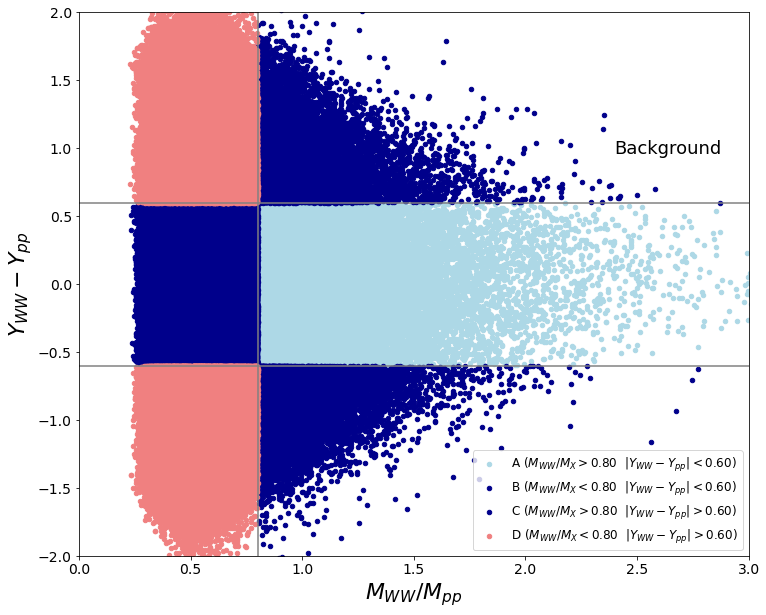

In [86]:
res_ = plot_regions_background( df_protons_multiRP_bkg_events_nTracks40 )
n_events_bkg_A_nTracks40, err_n_events_bkg_A_nTracks40 = res_[ 0 ]
n_events_bkg_B_nTracks40, err_n_events_bkg_B_nTracks40 = res_[ 1 ]
n_events_bkg_C_nTracks40, err_n_events_bkg_C_nTracks40 = res_[ 2 ]
n_events_bkg_D_nTracks40, err_n_events_bkg_D_nTracks40 = res_[ 3 ]

Number of events: 40.08 +/- 0.8953211714239758
Number of events (A): 6.4799999999999995 +/- 0.36000000000000004
Number of events (B): 12.26 +/- 0.4951767361255979
Number of events (C): 3.5 +/- 0.2645751311064591
Number of events (D): 17.839999999999996 +/- 0.5973273809227232


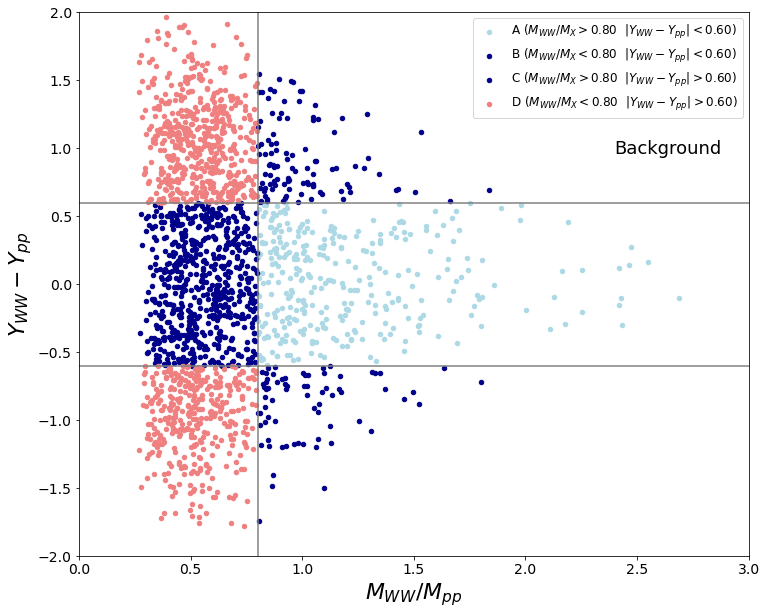

In [87]:
res_ = plot_regions_background( df_protons_multiRP_bkg_events )
n_events_bkg_A, err_n_events_bkg_A = res_[ 0 ]
n_events_bkg_B, err_n_events_bkg_B = res_[ 1 ]
n_events_bkg_C, err_n_events_bkg_C = res_[ 2 ]
n_events_bkg_D, err_n_events_bkg_D = res_[ 3 ]

### Data

In [88]:
# label_data = ""
# if lepton_type == 'muon':
#     label_data = "data-single-arm"
# elif lepton_type == 'electron':
#     label_data = "data-single-arm-electron"

labels_data = []
fileNames_data = {}
if data_sample == '2017':
    if lepton_type == 'muon':
        labels_data = [ "data-single-arm" ]
        fileNames_data = {
            "data-single-arm": "data-store-data-single-arm.h5"
        }
    elif lepton_type == 'electron':
        labels_data = [ "data-single-arm-electron" ]
        fileNames_data = {
            "data-single-arm-electron": "data-store-data-single-arm-electron.h5"
        }
elif data_sample == '2018':
    if lepton_type == 'muon':
        labels_data = [
            "data-2018-muon-2018A",
            "data-2018-muon-2018B",
            "data-2018-muon-2018C",
            "data-2018-muon-2018D"
        ]
        fileNames_data = {
            "data-2018-muon-2018A": "data-store-data-2018-muon-2018A.h5",
            "data-2018-muon-2018B": "data-store-data-2018-muon-2018B.h5",
            "data-2018-muon-2018C": "data-store-data-2018-muon-2018C.h5",
            "data-2018-muon-2018D": "data-store-data-2018-muon-2018D.h5"
        }
    elif lepton_type == 'electron':
        labels_data = [
            "data-2018-electron-2018A",
            "data-2018-electron-2018B",
            "data-2018-electron-2018C",
            "data-2018-electron-2018D"
        ]
        fileNames_data = {
            "data-2018-electron-2018A": "data-store-data-2018-electron-2018A.h5",
            "data-2018-electron-2018B": "data-store-data-2018-electron-2018B.h5",
            "data-2018-electron-2018C": "data-store-data-2018-electron-2018C.h5",
            "data-2018-electron-2018D": "data-store-data-2018-electron-2018D.h5"
        }

base_path_ = 'output'
# file_path_ = "{}/data-store-{}.h5".format( base_path_, label_data )
for label_ in fileNames_data:
    fileNames_data[ label_ ] = "{}/{}".format( base_path_, fileNames_data[ label_ ] )
print ( fileNames_data )

# df_counts_data = None
# # df_protons_multiRP_data_index = None
# df_protons_multiRP_data_events = None
# with pd.HDFStore( file_path_, 'r' ) as store_:
#     print ( list( store_ ) )
#     df_counts_data = store_[ "counts" ]
# #     df_protons_multiRP_data_index = store_[ "protons_multiRP" ]
#     df_protons_multiRP_data_events = store_[ "events_multiRP" ]

df_counts_data = None
# df_protons_multiRP_data_index = None
df_protons_multiRP_data_events = None

df_counts_data_list_ = []
# df_protons_multiRP_data_index_list_ = []
df_protons_multiRP_data_events_list_ = []
for label_ in labels_data:
    print ( label_ )
    file_path_ = fileNames_data[ label_ ]
    print ( file_path_ )
    with pd.HDFStore( file_path_, 'r' ) as store_:
        print ( list( store_ ) )
        
        df_counts_data__ = store_[ "counts" ]
#         df_protons_multiRP_data_index__  = store_[ "protons_multiRP" ]
        df_protons_multiRP_data_events__ = store_[ "events_multiRP" ]
        df_counts_data_list_.append( df_counts_data__ )
#         df_protons_multiRP_data_index_list_.append( df_protons_multiRP_data_index__ )
        df_protons_multiRP_data_events_list_.append( df_protons_multiRP_data_events__ )

df_counts_data = df_counts_data_list_[0]
for idx_ in range( 1, len( df_counts_data_list_ ) ):
    df_counts_data = df_counts_data.add( df_counts_data_list_[ idx_ ] )

# df_protons_multiRP_data_index = pd.concat( df_protons_multiRP_data_index_list_ )
df_protons_multiRP_data_events = pd.concat( df_protons_multiRP_data_events_list_ )

{'data-2018-electron-2018A': 'output/data-store-data-2018-electron-2018A.h5', 'data-2018-electron-2018B': 'output/data-store-data-2018-electron-2018B.h5', 'data-2018-electron-2018C': 'output/data-store-data-2018-electron-2018C.h5', 'data-2018-electron-2018D': 'output/data-store-data-2018-electron-2018D.h5'}
data-2018-electron-2018A
output/data-store-data-2018-electron-2018A.h5
['/counts', '/events_multiRP', '/protons_multiRP']
data-2018-electron-2018B
output/data-store-data-2018-electron-2018B.h5
['/counts', '/events_multiRP', '/protons_multiRP']
data-2018-electron-2018C
output/data-store-data-2018-electron-2018C.h5
['/counts', '/events_multiRP', '/protons_multiRP']
data-2018-electron-2018D
output/data-store-data-2018-electron-2018D.h5
['/counts', '/events_multiRP', '/protons_multiRP']


In [89]:
df_counts_data

All         1864682
Jet         1864682
Electron    1814957
Proton      1229462
dtype: int64

In [90]:
df_protons_multiRP_data_events

crossingAngle  betaStar  instLumi  \
run    lumiblock event     slice                                      
315322 844       547247168 0              150.0      0.30  5.297016   
       987       620129472 0              140.0      0.30  5.112836   
       1014      633582144 0              140.0      0.30  5.045363   
       1044      648192512 0              140.0      0.30  4.969756   
315257 13        8749721   0              150.0      0.30  4.006450   
...                                         ...       ...       ...   
325172 135       211531984 0              130.0      0.25  6.757077   
       139       218285120 0              130.0      0.25  6.748895   
       286       436151328 0              130.0      0.25  6.226847   
                 435233856 0              130.0      0.25  6.226847   
       433       636147584 0              130.0      0.25  5.741558   

                                     jet0_pt  jet0_eta  jet0_phi  jet0_energy  \
run    lumiblock event     slice                                                
315322 844       547247168 0      237.519760  0.001462 -3.011025   245.029419   
       987       620129472 0      275.293854 -0.246348 -2.162374   287.751312   
       1014      633582144 0      200.982956  0.128592  2.677537   210.928528   
       1044      648192512 0      311.584869 -1.917988  1.185926  1084.896973   
315257 13        8749721   0      206.891022 -0.034074 -0.705356   213.148438   
...                                      ...       ...       ...          ...   
325172 135       211531984 0      409.456879  1.692853  1.587608  1153.715454   
       139       218285120 0      234.258514  0.061932  2.094093   238.343826   
       286       436151328 0      263.166901 -0.744003  1.843283   342.881622   
                 435233856 0      285.507996 -0.430046 -1.230755   316.024445   
       433       636147584 0      302.799347 -0.079498  0.079990   308.318146   

                                  jet0_mass  jet0_corrmass  jet0_tau1  ...  \
run    lumiblock event     slice                                       ...   
315322 844       547247168 0      16.612514      17.651703   0.189852  ...   
       987       620129472 0      16.833248      17.842026   0.107463  ...   
       1014      633582144 0      33.131710      35.229256   0.204147  ...   
       1044      648192512 0      15.149824      16.633526   0.097129  ...   
315257 13        8749721   0      25.448692      27.029955   0.169144  ...   
...                                     ...            ...        ...  ...   
325172 135       211531984 0      34.785805      38.041805   0.168737  ...   
       139       218285120 0      17.095684      18.437765   0.091887  ...   
       286       436151328 0      11.436591      12.326020   0.093277  ...   
                 435233856 0       7.005364       7.554590   0.068882  ...   
       433       636147584 0       6.103240       6.569646   0.074973  ...   

                                           MX        YX  diffMWW_MX  \
run    lumiblock event     slice                                      
315322 844       547247168 0       687.891235 -0.204690 -207.488098   
       987       620129472 0       726.871582 -0.174319 -243.494324   
       1014      633582144 0       969.303772  0.205680 -600.132690   
       1044      648192512 0       984.322266  0.026096 -526.201111   
315257 13        8749721   0       914.544250 -0.341820 -367.738281   
...                                       ...       ...         ...   
325172 135       211531984 0      1000.605713 -0.637589   91.552490   
       139       218285120 0       970.370605 -0.112585 -491.782288   
       286       436151328 0      1437.931030 -0.065507 -752.847412   
                 435233856 0       881.819519  0.085866 -421.590210   
       433       636147584 0      1013.677307 -0.437018 -403.226440   

                                  ratioMWW_MX  shiftedRatioMWW_MX  diffYWW_YX  \
run    lumiblock event     slice    

### Select events

In [91]:
print ( df_protons_multiRP_data_events.shape[0] )
df_protons_multiRP_data_events_nTracks40, selection_keys_, selections_ = select_events( df_protons_multiRP_data_events, lepton_type, max_num_tracks=40 )
print ( df_protons_multiRP_data_events_nTracks40.shape[0] )
print ( selection_keys_ )
print ( selections_ )
df_protons_multiRP_data_events__, selection_keys_, selections_ = select_events( df_protons_multiRP_data_events, lepton_type )
df_protons_multiRP_data_events = df_protons_multiRP_data_events__
print ( df_protons_multiRP_data_events.shape[0] )
print ( selection_keys_ )
print ( selections_ )

293525
5512
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 293525, 'Electron': 293383, 'Jet': 211291, 'Jet_Electron': 208848, 'MET': 150877, 'Jet_MET': 129925, 'PrunedMass': 35710, 'Tau21': 23673, 'BJet_Veto': 19439, 'Xi_CMS': 17072, 'WLeptonic': 11457, 'Jet_WLeptonic': 11230, 'MWW': 10625, 'ExtraTracks': 5512}
50
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 293525, 'Electron': 293383, 'Jet': 211291, 'Jet_Electron': 208848, 'MET': 150877, 'Jet_MET': 129925, 'PrunedMass': 35710, 'Tau21': 23673, 'BJet_Veto': 19439, 'Xi_CMS': 17072, 'WLeptonic': 11457, 'Jet_WLeptonic': 11230, 'MWW': 10625, 'ExtraTracks': 50}


In [92]:
def plot_regions_data( df_protons_multiRP_data_events ):
    df__ = df_protons_multiRP_data_events
    var1__ = ( "R_MWW_MX" + "_nom" )
    var2__ = ( "Diff_YWW_YX" + "_nom" )

    msk_data_cut1 = ( df__[ var1__ ] >= 0.80  )
    msk_data_cut2 = ( np.abs( df__[ var2__ ] ) <= 0.60 )
    # msk_data_A =  msk_data_cut1 &  msk_data_cut2
    msk_data_B = ~msk_data_cut1 &  msk_data_cut2
    msk_data_C =  msk_data_cut1 & ~msk_data_cut2
    msk_data_D = ~msk_data_cut1 & ~msk_data_cut2

    # n_events_data = df__.shape[0]
    # n_events_data_A = df__[ msk_data_A ].shape[0]
    n_events_data_B = df__[ msk_data_B ].shape[0]
    n_events_data_C = df__[ msk_data_C ].shape[0]
    n_events_data_D = df__[ msk_data_D ].shape[0]

    # print ( "Number of events: {} - Ratio: {}".format( n_events_data, ( n_events_data / ( n_events_bkg ) ) ) )
    # print ( "Number of events (A): {} - Ratio: {}".format( n_events_data_A, ( n_events_data_A / ( n_events_bkg_A ) ) ) )
    # print ( "Number of events (B): {} - Ratio: {}".format( n_events_data_B, ( n_events_data_B / ( n_events_bkg_B ) ) ) )
    # print ( "Number of events (C): {} - Ratio: {}".format( n_events_data_C, ( n_events_data_C / ( n_events_bkg_C ) ) ) )
    # print ( "Number of events (D): {} - Ratio: {}".format( n_events_data_D, ( n_events_data_D / ( n_events_bkg_D ) ) ) )
    print ( "Number of events (B): {}".format( n_events_data_B ) )
    print ( "Number of events (C): {}".format( n_events_data_C ) )
    print ( "Number of events (D): {}".format( n_events_data_D ) )

    x_min =  0.
    x_max =  3.0
    y_min = -2.0
    y_max =  2.0
    x_cut = 0.80
    y_cut = 0.60

    fig = plt.figure( figsize=(12,10) )
    plt.plot( (x_min,x_max), (-y_cut,-y_cut), color='gray' )
    plt.plot( (x_min,x_max), (y_cut,y_cut), color='gray' )
    plt.plot( (x_cut,x_cut), (y_min,y_max), color='gray' )
    ax = plt.gca()
    # label_str_ = "A (Data/Background: {:.2f})".format( ( n_events_data_A / ( n_events_bkg_A ) ) )
    # label_str_ = r"{}".format( label_str_ )
    # df__[ msk_data_A ].plot( var1__, var2__, 'scatter', ax=ax, color='lightblue', label=label_str_ )
    # label_str_ = "B (Data/Background: {:.2f})".format( ( n_events_data_B / ( n_events_bkg_B ) ) )
    label_str_ = "B (Data)"
    label_str_ = r"{}".format( label_str_ )
    df__[ msk_data_B ].plot( var1__, var2__, 'scatter', ax=ax, color='darkblue', label=label_str_ )
    # label_str_ = "C (Data/Background: {:.2f})".format( ( n_events_data_C / ( n_events_bkg_C ) ) )
    label_str_ = "C (Data)"
    label_str_ = r"{}".format( label_str_ )
    df__[ msk_data_C ].plot( var1__, var2__, 'scatter', ax=ax, color='darkblue', label=label_str_ )
    # label_str_ = "D (Data/Background: {:.2f})".format( ( n_events_data_D / ( n_events_bkg_D ) ) )
    label_str_ = "D (Data)"
    label_str_ = r"{}".format( label_str_ )
    df__[ msk_data_D ].plot( var1__, var2__, 'scatter', ax=ax, color='lightcoral', label=label_str_ )
    plt.legend( loc='best', fontsize=16 )
    # leg_ = plt.legend( loc='best', fontsize=16 )
    # leg_.set_title( title_str_, prop={'size': 16} )
    # leg_._legend_box.align = "right"
    ax.text( 0.85, 0.75, "Data", horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize=18 )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel( r"$M_{WW} / M_{pp}$", fontsize=22 )
    plt.ylabel( r"$Y_{WW} - Y_{pp}$", fontsize=22 )
    
    return ( n_events_data_B, n_events_data_C, n_events_data_D )

Number of events (B): 2134
Number of events (C): 427
Number of events (D): 2269


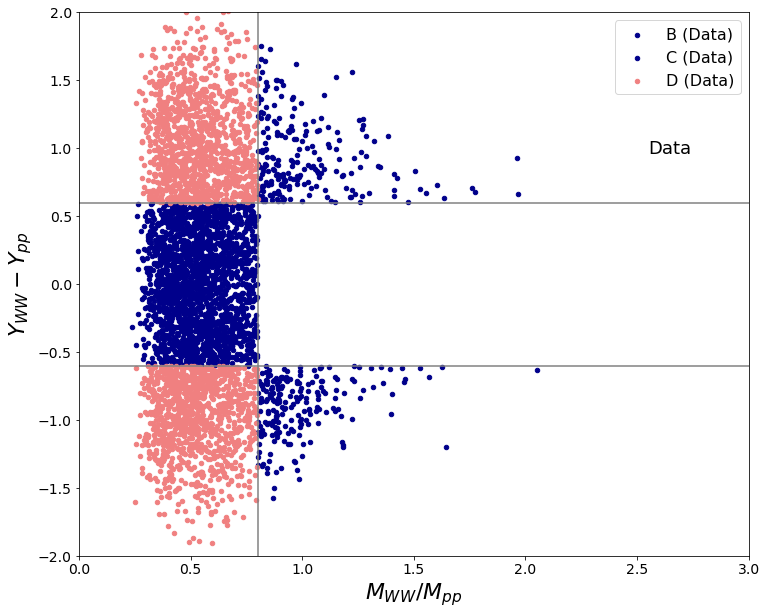

In [93]:
res_ = plot_regions_data( df_protons_multiRP_data_events_nTracks40 )
n_events_data_B_nTracks40 = res_[ 0 ]
n_events_data_C_nTracks40 = res_[ 1 ]
n_events_data_D_nTracks40 = res_[ 2 ]

Number of events (B): 13
Number of events (C): 7
Number of events (D): 23


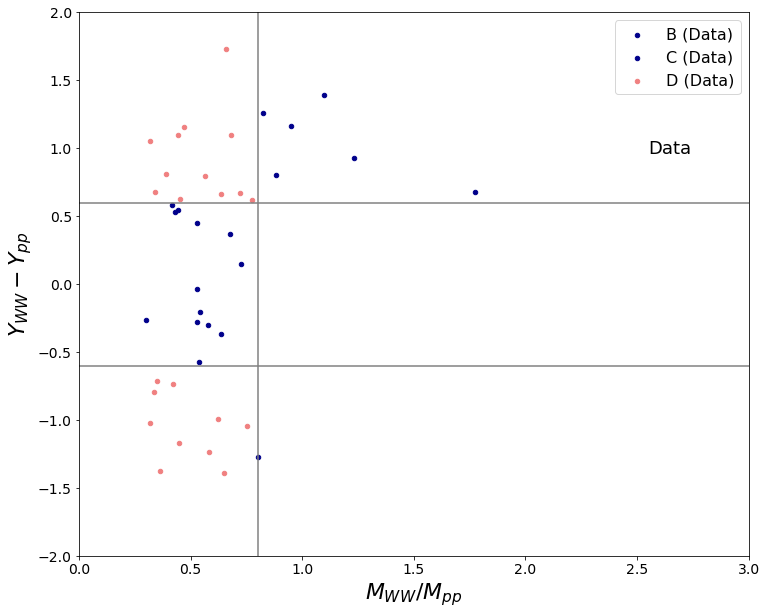

In [94]:
res_ = plot_regions_data( df_protons_multiRP_data_events )
n_events_data_B = res_[ 0 ]
n_events_data_C = res_[ 1 ]
n_events_data_D = res_[ 2 ]

In [95]:
ratio_ = ( n_events_data_B_nTracks40 / n_events_bkg_B_nTracks40 )
err_ratio_ = ratio_ * np.sqrt( ( 1. / n_events_data_B_nTracks40 ) + ( err_n_events_bkg_B_nTracks40 / n_events_bkg_B_nTracks40 ) ** 2 )
print ( ratio_, err_ratio_ )
ratio_ = ( n_events_data_C_nTracks40 / n_events_bkg_C_nTracks40 )
err_ratio_ = ratio_ * np.sqrt( ( 1. / n_events_data_C_nTracks40 ) + ( err_n_events_bkg_C_nTracks40 / n_events_bkg_C_nTracks40 ) ** 2 )
print ( ratio_, err_ratio_ )
ratio_ = ( n_events_data_D_nTracks40 / n_events_bkg_D_nTracks40 )
err_ratio_ = ratio_ * np.sqrt( ( 1. / n_events_data_D_nTracks40 ) + ( err_n_events_bkg_D_nTracks40 / n_events_bkg_D_nTracks40 ) ** 2 )
print ( ratio_, err_ratio_ )

1.011873150747288 0.022124807371605108
1.009074581718499 0.0493228370371983
1.0423940607887097 0.022110328555879456


In [96]:
n_events_data_B_D_nTracks40 = ( n_events_data_B_nTracks40 + n_events_data_D_nTracks40 )
# err_n_events_data_B_D_nTracks40 = np.sqrt( n_events_data_B_D_nTracks40 )
n_events_bkg_B_D_nTracks40 = ( n_events_bkg_B_nTracks40 + n_events_bkg_D_nTracks40 )
err_n_events_bkg_B_D_nTracks40 = np.sqrt( err_n_events_bkg_B_nTracks40 ** 2 + err_n_events_bkg_D_nTracks40 ** 2 )
ratio_ = ( n_events_data_B_D_nTracks40 / n_events_bkg_B_D_nTracks40 )
err_ratio_ = ratio_ * np.sqrt( ( 1. / n_events_data_B_D_nTracks40 ) + ( err_n_events_bkg_B_D_nTracks40 / n_events_bkg_B_D_nTracks40 ) ** 2 )
print ( ratio_, err_ratio_ )

1.027374885665752 0.015641241209358656


GGToWW-AQGC-2018-electron-A0W5e-6
R_MWW_MX
0      0.173113
1      0.165967
2      0.160010
3      0.155003
4      0.150765
         ...   
195    0.241967
196    0.255715
197    0.270932
198    0.287832
199    0.306672
Length: 200, dtype: float64 0.13626801291333634
0     -0.124330
1     -0.133485
2     -0.141227
3     -0.147845
4     -0.153554
         ...   
195   -0.182007
196   -0.179160
197   -0.175805
198   -0.171872
199   -0.167274
Length: 200, dtype: float64 -0.14576401622081428
Diff_YWW_YX
0      0.092869
1      0.090712
2      0.088726
3      0.086893
4      0.085195
         ...   
195    0.065809
196    0.066326
197    0.066867
198    0.067434
199    0.068029
Length: 200, dtype: float64 0.059344127017486585
0     -0.105422
1     -0.102365
2     -0.099551
3     -0.096953
4     -0.094548
         ...   
195   -0.070393
196   -0.071217
197   -0.072079
198   -0.072981
199   -0.073927
Length: 200, dtype: float64 -0.05875856513403267
GGToWW-AQGC-2018-electron-A0W2e-6
R_MWW_MX
0  

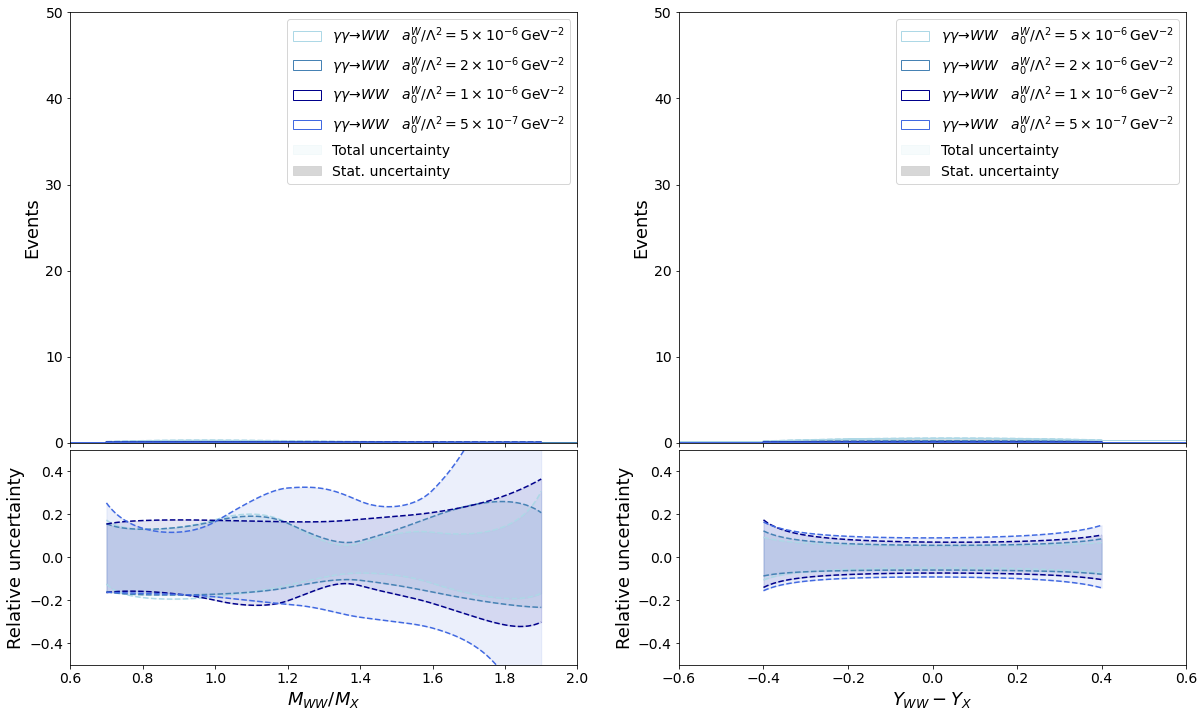

In [97]:
relative_uncertainty_ = True

# ylim_ = (0.,5.)
# ylim_ = (0.,3.)
# ylim_ = (0.,0.60)
ylim_ = (0.,50.)
ylim_ratio_ = (-0.50,0.50)

yscale_=None
# yscale_='log'

colors = [ "lightblue", "steelblue", "darkblue", "royalblue"  ]

# fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )
fig, axes_ = plt.subplots( 1, 2, figsize=( 2*10,( 1.5*8 ) ) )

class Obj2D:
    def __init__( self ):
        self.obj_ = [ [], [] ]
    def __getitem__( self, idx ):
        if isinstance( idx, tuple ): return self.obj_[ idx[0] ][ idx[1] ]
        else : return self.obj_[ idx ]

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider0_ = make_axes_locatable( axes_[ 0 ] )
divider1_ = make_axes_locatable( axes_[ 1 ] )
axes = Obj2D()
axes.obj_[0].append( axes_[ 0 ] )
axes.obj_[0].append( axes_[ 1 ] )
axes.obj_[1].append( divider0_.append_axes( "bottom", size="50%", pad=0.10 ) )
axes.obj_[1].append( divider1_.append_axes( "bottom", size="50%", pad=0.10 ) )

def plot_signal( axes ):
    for idx_label_, label_ in enumerate( labels_signals[::-1] ):
        print ( label_ )
        color_ = colors[ idx_label_ ]

        spline_nom_ = {}
        spline_max_ = {}
        spline_min_ = {}
        spline_max_err_ = {}
        spline_min_err_ = {}
        spline_nom_arr_ = {}
        spline_max_arr_ = {}
        spline_min_arr_ = {}
        spline_max_err_arr_ = {}
        spline_min_err_arr_ = {}

        idx_row_ = 0
        idx_col_ = 0
        for var__ in vars_:
            print ( var__ )
            idx_row_ = 0
            counts_ = counts[ label_ ][ var__ ]
            err_ = err[ label_ ][ var__ ]
            bins_ = bins[ label_ ][ var__ ]
            __max_err__ = ( counts_ + err_ )
            __min_err__ = ( counts_ - err_ )
            __max__ = max_variations_total[ label_ ][ var__ ]
            __min__ = min_variations_total[ label_ ][ var__ ]

            bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

            axes[idx_row_,idx_col_].hist( bin_centers_, weights=counts_,
                                          histtype='step', color=color_, linestyle="-", label=labels_samples[ label_ ],
                                          bins=bins_ )

            spline_nom_[ var__ ] = make_interp_spline( bin_centers_, counts_, k=2 )
            spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
            spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
            spline_max_err_[ var__ ] = make_interp_spline( bin_centers_, __max_err__, k=2 )
            spline_min_err_[ var__ ] = make_interp_spline( bin_centers_, __min_err__, k=2 )
            x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
            spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
            spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
            spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
            spline_max_err_arr_[ var__ ] = spline_max_err_[ var__ ]( x_plot__ )
            spline_min_err_arr_[ var__ ] = spline_min_err_[ var__ ]( x_plot__ )

            axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
            axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
            __label_0 = None
            __label_1 = None
            if idx_label_ == 0:
                __label_0 = "Total uncertainty"
                __label_1 = "Stat. uncertainty"
            axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10, label=__label_0 )
            axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_err_arr_[ var__ ], spline_max_err_arr_[ var__ ], color='lightgrey', alpha=0.90, label=__label_1 )
            axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
            axes[idx_row_,idx_col_].set_ylim( ylim_ )
    #         axes[idx_row_,idx_col_].set_xlabel( vars_[ var__ ][ "xtitle" ], fontsize=18 )
            axes[idx_row_,idx_col_].get_xaxis().set_ticklabels( [] )
            axes[idx_row_,idx_col_].set_ylabel( "Events", fontsize=18 )
            if yscale_:
                axes[idx_row_,idx_col_].set_ylim( bottom=0.01 )
                axes[idx_row_,idx_col_].set_yscale( yscale_ )
            axes[idx_row_,idx_col_].legend( loc='best', fontsize=14 )

            idx_row_ = 1
            if relative_uncertainty_:
                ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
                ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
                ratio_max_sel_ = pd.Series( ratio_max_ )
                ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
                ratio_min_sel_ = pd.Series( ratio_min_ )
                ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
                print ( ratio_max_sel_, ratio_max_sel_.mean() )
                print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
                axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
                axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
                axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
                axes[idx_row_,idx_col_].set_ylabel( "Relative uncertainty", fontsize=18 )
            else:
                diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
                diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
                axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
                axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
                axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
                axes[idx_row_,idx_col_].set_ylabel( "Uncertainty", fontsize=18 )
        #     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
            axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
            axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
            axes[idx_row_,idx_col_].set_xlabel( vars_[ var__ ][ "xtitle" ], fontsize=18 )
            idx_col_ += 1

plot_signal( axes=axes )

if save_figures:
    if yscale_:
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics-log.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics-log.png", bbox_inches='tight' )
    else:
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics.png", bbox_inches='tight' )

GGToWW-AQGC-2018-electron-A0W5e-6
R_MWW_MX
0      0.173113
1      0.165967
2      0.160010
3      0.155003
4      0.150765
         ...   
195    0.241967
196    0.255715
197    0.270932
198    0.287832
199    0.306672
Length: 200, dtype: float64 0.13626801291333634
0     -0.124330
1     -0.133485
2     -0.141227
3     -0.147845
4     -0.153554
         ...   
195   -0.182007
196   -0.179160
197   -0.175805
198   -0.171872
199   -0.167274
Length: 200, dtype: float64 -0.14576401622081428
Diff_YWW_YX
0      0.092869
1      0.090712
2      0.088726
3      0.086893
4      0.085195
         ...   
195    0.065809
196    0.066326
197    0.066867
198    0.067434
199    0.068029
Length: 200, dtype: float64 0.059344127017486585
0     -0.105422
1     -0.102365
2     -0.099551
3     -0.096953
4     -0.094548
         ...   
195   -0.070393
196   -0.071217
197   -0.072079
198   -0.072981
199   -0.073927
Length: 200, dtype: float64 -0.05875856513403267
GGToWW-AQGC-2018-electron-A0W2e-6
R_MWW_MX
0  

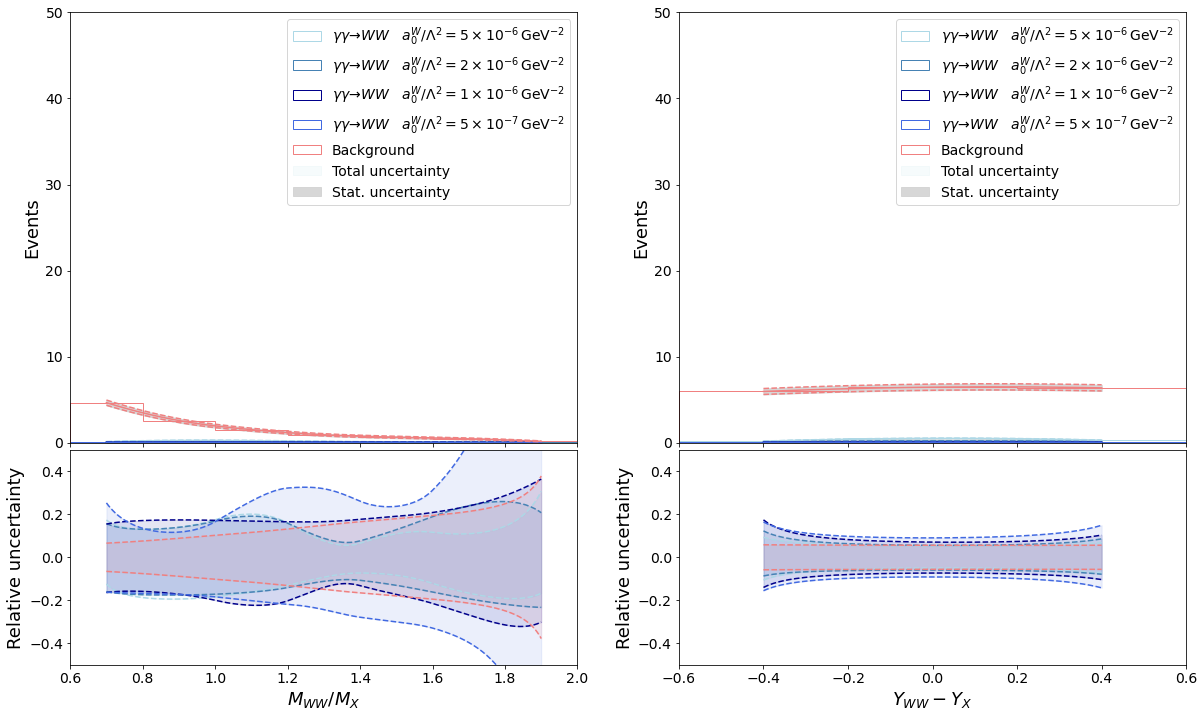

In [98]:
fig, axes_ = plt.subplots( 1, 2, figsize=( 2*10,( 1.5*8 ) ) )

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider0_ = make_axes_locatable( axes_[ 0 ] )
divider1_ = make_axes_locatable( axes_[ 1 ] )
axes = Obj2D()
axes.obj_[0].append( axes_[ 0 ] )
axes.obj_[0].append( axes_[ 1 ] )
axes.obj_[1].append( divider0_.append_axes( "bottom", size="50%", pad=0.10 ) )
axes.obj_[1].append( divider1_.append_axes( "bottom", size="50%", pad=0.10 ) )

plot_signal( axes=axes )

color_ = 'lightcoral'

# counts__ = None
# err__ = None
# bins__ = None
# max_variations_total__ = None
# min_variations_total__ = None
idx_row_ = 0
idx_col_ = 0
for var__ in vars_:
    print ( var__ )
    idx_row_ = 0
    df__ = df_protons_multiRP_bkg_events
    weights__ = ( df_protons_multiRP_bkg_events[ "norm" ] )
    arr__ = df__[ var__ + "_nom" ]

    arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
    msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
    arr__ = arr__.loc[ msk__ ]
    weights__ = weights__.loc[ msk__ ]
    sum_w_, bins_ = np.histogram( arr__, weights=weights__,
                                  bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
    sum_w2_, __ = np.histogram( arr__, weights=( weights__ ** 2 ),
                                bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )

    __max_err__ = ( sum_w_ + np.sqrt( sum_w2_ ) )
    __min_err__ = ( sum_w_ - np.sqrt( sum_w2_ ) )

    __max__ = ( sum_w_ + np.sqrt( sum_w2_ ) ) 
    __min__ = ( sum_w_ - np.sqrt( sum_w2_ ) )
    
    print ( sum_w_ )
    print ( __max_err__ )
    print ( __min_err__ )
    print ( __max__ )
    print ( __min__ )
#     counts__[ var__ ] = sum_w_
#     err__[ var__ ] = np.sqrt( sum_w2_ )
#     bins__[ var__ ] = bins_
#     max_variations_total__[ var__ ] = __max__
#     min_variations_total__[ var__ ] = __min__

    bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

    axes[idx_row_,idx_col_].hist( bin_centers_, weights=sum_w_,
                                  histtype='step', color=color_, linestyle="-",
                                  bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ], label="Background" )

    spline_nom_[ var__ ] = make_interp_spline( bin_centers_, sum_w_, k=2 )
    spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
    spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
    spline_max_err_[ var__ ] = make_interp_spline( bin_centers_, __max_err__, k=2 )
    spline_min_err_[ var__ ] = make_interp_spline( bin_centers_, __min_err__, k=2 )
    x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
    spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
    spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
    spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
    spline_max_err_arr_[ var__ ] = spline_max_err_[ var__ ]( x_plot__ )
    spline_min_err_arr_[ var__ ] = spline_min_err_[ var__ ]( x_plot__ )

    axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
    axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
    axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
#     axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10, label="Background" )
    axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
    axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_err_arr_[ var__ ], spline_max_err_arr_[ var__ ], color='lightgrey', alpha=0.90 )
#     axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
#     axes[idx_row_,idx_col_].set_ylim( ylim_ )
#     axes[idx_row_,idx_col_].set_xlabel( vars_[ var__ ][ "xtitle" ], fontsize=18 )
#     axes[idx_row_,idx_col_].set_ylabel( "Events", fontsize=18 )
    axes[idx_row_,idx_col_].legend( loc='best', fontsize=14 )
    
    idx_row_ = 1
    if relative_uncertainty_:
        ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
        ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
        ratio_max_sel_ = pd.Series( ratio_max_ )
        ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
        ratio_min_sel_ = pd.Series( ratio_min_ )
        ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
        print ( ratio_max_sel_, ratio_max_sel_.mean() )
        print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
        axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
#         axes[idx_row_,idx_col_].set_ylabel( "Relative uncertainty", fontsize=18 )
    else:
        diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
        diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
        axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
#         axes[idx_row_,idx_col_].set_ylabel( "Uncertainty", fontsize=18 )
#     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
#     axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
#     axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
#     axes[idx_row_,idx_col_].set_xlabel( vars_[ var__ ][ "xtitle" ], fontsize=18 )
    idx_col_ += 1
    
if save_figures:
    if yscale_:
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics-log.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics-log.png", bbox_inches='tight' )
    else:
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics.png", bbox_inches='tight' )

In [99]:
# axes[0,0].set_xlim( 0.6, 2.0 )
# axes[1,0].set_xlim( 0.6, 2.0 )
# axes[0,1].set_xlim( -1., 1. )
# axes[1,1].set_xlim( -1., 1. )
# axes[0,1].set_xlim( -0.60, 0.60 )
# axes[1,1].set_xlim( -0.60, 0.60 )
# axes[0,0].set_ylim( 0., 5. )
# axes[0,0].set_ylim( 0., 9. )
# axes[0,1].set_ylim( 0., 5. )
# axes[0,1].set_ylim( 0., 8. )
# axes[0,1].set_ylim( 0., 9. )
# axes[0,0].set_ylim( 0., 1. )
# axes[0,1].set_ylim( 0., 1. )
# axes[0,0].set_yscale( 'log' )
# axes[0,1].set_yscale( 'log' )
# axes[0,0].set_ylim( 0.01, 5. )
# # axes[0,1].set_ylim( 0.01, 5. )
# axes[0,1].set_ylim( 0.01, 8. )
# fig

In [100]:
# if save_figures:
#     plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics.pdf", bbox_inches='tight' )
#     plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics.png", bbox_inches='tight' )

In [101]:
# var_name_lepton_id_up_ = ""
# var_name_lepton_id_dw_ = ""
# if lepton_type == 'muon':
#     var_name_lepton_id_up_ = "syst_up_sf_muon_id"
#     var_name_lepton_id_dw_ = "syst_dw_sf_muon_id"
# elif lepton_type == 'electron':
#     var_name_lepton_id_up_ = "syst_up_sf_electron_id"
#     var_name_lepton_id_dw_ = "syst_dw_sf_electron_id"
var_name_lepton_id_ = ""
if lepton_type == 'muon':
    var_name_lepton_id_ = "sf_muon_id"
elif lepton_type == 'electron':
    var_name_lepton_id_ = "sf_electron_id"

uncertainties_ = [ 'jes', 'jer', var_name_lepton_id_, 'proton_scale', 'proton_eff' ]

for label__ in labels_signals:
    for unc__ in uncertainties_:
        label_unc__ = "syst_up_{}".format( unc__ )
        if sum_weights[ label__ ][ label_unc__ ] < 0.: sum_weights[ label__ ][ label_unc__ ] = np.float64( 0. )
        label_unc__ = "syst_dw_{}".format( unc__ )
        if sum_weights[ label__ ][ label_unc__ ] > 0.: sum_weights[ label__ ][ label_unc__ ] = np.float64( 0. )

    var_name_lepton_id_up__ = "syst_up_{}".format( var_name_lepton_id_ )
    sum_weights[ label__ ][ "syst_up_total" ]    =  np.sqrt( sum_weights[ label__ ][ "syst_up_jes" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_up_jer" ] ** 2 +
                                                             sum_weights[ label__ ][ var_name_lepton_id_up__ ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_up_proton_scale" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_up_proton_eff" ] ** 2
                                                          )
    var_name_lepton_id_dw__ = "syst_dw_{}".format( var_name_lepton_id_ )
    sum_weights[ label__ ][ "syst_dw_total" ]    = -np.sqrt( sum_weights[ label__ ][ "syst_dw_jes" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_dw_jer" ] ** 2 +
                                                             sum_weights[ label__ ][ var_name_lepton_id_dw__ ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_dw_proton_scale" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_dw_proton_eff" ] ** 2
                                                          )
print ( sum_weights )

{'GGToWW-AQGC-2018-electron-A0W5e-7': {'central': 0.035582566666728654, 'stat': 0.002536173327733353, 'syst_up_jes': 0.0, 'syst_dw_jes': -0.00017719652081783777, 'syst_up_jer': 0.0, 'syst_dw_jer': 0.0, 'syst_up_sf_electron_id': 0.0016100697388013313, 'syst_dw_sf_electron_id': -0.0016100697388013313, 'syst_up_proton_scale_arm0': 0.0009061497935030707, 'syst_dw_proton_scale_arm0': -0.001960389024695891, 'syst_up_proton_scale_arm1': 0.0005471583175068739, 'syst_dw_proton_scale_arm1': -0.0014073509160480724, 'syst_up_proton_scale': 0.0010585318477413, 'syst_dw_proton_scale': -0.002413247133852945, 'syst_up_proton_eff': 0.0006383782932503912, 'syst_dw_proton_eff': -0.0006383782932503912, 'syst_up_total': 0.002029862330745531, 'syst_dw_total': -0.002975737176757462}, 'GGToWW-AQGC-2018-electron-A0W1e-6': {'central': 0.1168906391507582, 'stat': 0.005137930527006755, 'syst_up_jes': 0.0008987156959492371, 'syst_dw_jes': 0.0, 'syst_up_jer': 0.0004573708626731121, 'syst_dw_jer': 0.0, 'syst_up_sf_e

In [102]:
df_sum_weights__ = pd.DataFrame( sum_weights )
df_sum_weights__

GGToWW-AQGC-2018-electron-A0W5e-7  \
central                                             0.035583   
stat                                                0.002536   
syst_up_jes                                         0.000000   
syst_dw_jes                                        -0.000177   
syst_up_jer                                         0.000000   
syst_dw_jer                                         0.000000   
syst_up_sf_electron_id                              0.001610   
syst_dw_sf_electron_id                             -0.001610   
syst_up_proton_scale_arm0                           0.000906   
syst_dw_proton_scale_arm0                          -0.001960   
syst_up_proton_scale_arm1                           0.000547   
syst_dw_proton_scale_arm1                          -0.001407   
syst_up_proton_scale                                0.001059   
syst_dw_proton_scale                               -0.002413   
syst_up_proton_eff                                  0.000638   
syst_dw_proton_eff                                 -0.000638   
syst_up_total                                       0.002030   
syst_dw_total                                      -0.002976   

                           GGToWW-AQGC-2018-electron-A0W1e-6  \
central                                             0.116891   
stat                                                0.005138   
syst_up_jes                                         0.000899   
syst_dw_jes                                         0.000000   
syst_up_jer                                         0.000457   
syst_dw_jer                                         0.000000   
syst_up_sf_electron_id                              0.004372   
syst_dw_sf_electron_id                             -0.004372   
syst_up_proton_scale_arm0                           0.002470   
syst_dw_proton_scale_arm0                          -0.003414   
syst_up_proton_scale_arm1                           0.002487   
syst_dw_proton_scale_arm1                          -0.002975   
syst_up_proton_scale                                0.003505   
syst_dw_proton_scale                               -0.004528   
syst_up_proton_eff                                  0.002116   
syst_dw_proton_eff                                 -0.002116   
syst_up_total                                       0.006074   
syst_dw_total                                      -0.006640   

                           GGToWW-AQGC-2018-electron-A0W2e-6  \
central                                             0.266621   
stat                                                0.006950   
syst_up_jes                                         0.001613   
syst_dw_jes                                        -0.001090   
syst_up_jer                                         0.000718   
syst_dw_jer                                        -0.000549   
syst_up_sf_electron_id                              0.011834   
syst_dw_sf_electron_id                             -0.011834   
syst_up_proton_scale_arm0                           0.005064   
syst_dw_proton_scale_arm0                          -0.005968   
syst_up_proton_scale_arm1                           0.005990   
syst_dw_proton_scale_arm1                          -0.006123   
syst_up_proton_scale                                0.007844   
syst_dw_proton_scale                               -0.008551   
syst_up_proton_eff                                  0.004546   
syst_dw_proton_eff                                 -0.004546   
syst_up_total                                       0.015011   
syst_dw_total                                      -0.015340   

                           GGToWW-AQGC-2018-electron-A0W5e-6  
central                                             0.791181  
stat                                                0.013550  
syst_up_jes                                         0.001908  
syst_dw_jes                                        -0.002336  
syst_up_jer                                         0.000000 

In [103]:
# df_sum_weights__.iloc[ 1:, : ].divide( df_sum_weights__.iloc[ 0 ] ) * 100.

In [104]:
symmetrize_uncertainties = True
if symmetrize_uncertainties:
    var_name_lepton_id_ = ""
    if lepton_type == 'muon':
        var_name_lepton_id_ = "sf_muon_id"
    elif lepton_type == 'electron':
        var_name_lepton_id_ = "sf_electron_id"

    uncertainties_ = [ 'jes', 'jer', var_name_lepton_id_, 'proton_scale', 'proton_eff' ]
    
    for label__ in labels_signals:
        for unc__ in uncertainties_:
            label_unc_up__ = "syst_up_{}".format( unc__ )
            label_unc_dw__ = "syst_dw_{}".format( unc__ )
            unc_max__ = np.max( [ np.abs( sum_weights[ label__ ][ label_unc_up__ ] ) , np.abs( sum_weights[ label__ ][ label_unc_dw__ ] ) ] )
            sum_weights[ label__ ][ label_unc_up__ ] =  unc_max__
            sum_weights[ label__ ][ label_unc_dw__ ] = -unc_max__

        var_name_lepton_id_up__ = "syst_up_{}".format( var_name_lepton_id_ )
        sum_weights[ label__ ][ "syst_up_total" ]    =  np.sqrt( sum_weights[ label__ ][ "syst_up_jes" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_up_jer" ] ** 2 +
                                                                 sum_weights[ label__ ][ var_name_lepton_id_up__ ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_up_proton_scale" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_up_proton_eff" ] ** 2
                                                              )
        var_name_lepton_id_dw__ = "syst_dw_{}".format( var_name_lepton_id_ )
        sum_weights[ label__ ][ "syst_dw_total" ]    = -np.sqrt( sum_weights[ label__ ][ "syst_dw_jes" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_dw_jer" ] ** 2 +
                                                                 sum_weights[ label__ ][ var_name_lepton_id_dw__ ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_dw_proton_scale" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_dw_proton_eff" ] ** 2
                                                              )
print ( sum_weights )

{'GGToWW-AQGC-2018-electron-A0W5e-7': {'central': 0.035582566666728654, 'stat': 0.002536173327733353, 'syst_up_jes': 0.00017719652081783777, 'syst_dw_jes': -0.00017719652081783777, 'syst_up_jer': 0.0, 'syst_dw_jer': -0.0, 'syst_up_sf_electron_id': 0.0016100697388013313, 'syst_dw_sf_electron_id': -0.0016100697388013313, 'syst_up_proton_scale_arm0': 0.0009061497935030707, 'syst_dw_proton_scale_arm0': -0.001960389024695891, 'syst_up_proton_scale_arm1': 0.0005471583175068739, 'syst_dw_proton_scale_arm1': -0.0014073509160480724, 'syst_up_proton_scale': 0.002413247133852945, 'syst_dw_proton_scale': -0.002413247133852945, 'syst_up_proton_eff': 0.0006383782932503912, 'syst_dw_proton_eff': -0.0006383782932503912, 'syst_up_total': 0.002975737176757462, 'syst_dw_total': -0.002975737176757462}, 'GGToWW-AQGC-2018-electron-A0W1e-6': {'central': 0.1168906391507582, 'stat': 0.005137930527006755, 'syst_up_jes': 0.0008987156959492371, 'syst_dw_jes': -0.0008987156959492371, 'syst_up_jer': 0.0004573708626

In [105]:
df_sum_weights__ = pd.DataFrame( sum_weights )
df_sum_weights__

GGToWW-AQGC-2018-electron-A0W5e-7  \
central                                             0.035583   
stat                                                0.002536   
syst_up_jes                                         0.000177   
syst_dw_jes                                        -0.000177   
syst_up_jer                                         0.000000   
syst_dw_jer                                        -0.000000   
syst_up_sf_electron_id                              0.001610   
syst_dw_sf_electron_id                             -0.001610   
syst_up_proton_scale_arm0                           0.000906   
syst_dw_proton_scale_arm0                          -0.001960   
syst_up_proton_scale_arm1                           0.000547   
syst_dw_proton_scale_arm1                          -0.001407   
syst_up_proton_scale                                0.002413   
syst_dw_proton_scale                               -0.002413   
syst_up_proton_eff                                  0.000638   
syst_dw_proton_eff                                 -0.000638   
syst_up_total                                       0.002976   
syst_dw_total                                      -0.002976   

                           GGToWW-AQGC-2018-electron-A0W1e-6  \
central                                             0.116891   
stat                                                0.005138   
syst_up_jes                                         0.000899   
syst_dw_jes                                        -0.000899   
syst_up_jer                                         0.000457   
syst_dw_jer                                        -0.000457   
syst_up_sf_electron_id                              0.004372   
syst_dw_sf_electron_id                             -0.004372   
syst_up_proton_scale_arm0                           0.002470   
syst_dw_proton_scale_arm0                          -0.003414   
syst_up_proton_scale_arm1                           0.002487   
syst_dw_proton_scale_arm1                          -0.002975   
syst_up_proton_scale                                0.004528   
syst_dw_proton_scale                               -0.004528   
syst_up_proton_eff                                  0.002116   
syst_dw_proton_eff                                 -0.002116   
syst_up_total                                       0.006716   
syst_dw_total                                      -0.006716   

                           GGToWW-AQGC-2018-electron-A0W2e-6  \
central                                             0.266621   
stat                                                0.006950   
syst_up_jes                                         0.001613   
syst_dw_jes                                        -0.001613   
syst_up_jer                                         0.000718   
syst_dw_jer                                        -0.000718   
syst_up_sf_electron_id                              0.011834   
syst_dw_sf_electron_id                             -0.011834   
syst_up_proton_scale_arm0                           0.005064   
syst_dw_proton_scale_arm0                          -0.005968   
syst_up_proton_scale_arm1                           0.005990   
syst_dw_proton_scale_arm1                          -0.006123   
syst_up_proton_scale                                0.008551   
syst_dw_proton_scale                               -0.008551   
syst_up_proton_eff                                  0.004546   
syst_dw_proton_eff                                 -0.004546   
syst_up_total                                       0.015393   
syst_dw_total                                      -0.015393   

                           GGToWW-AQGC-2018-electron-A0W5e-6  
central                                             0.791181  
stat                                                0.013550  
syst_up_jes                                         0.002336  
syst_dw_jes                                        -0.002336  
syst_up_jer                                         0.000667 

In [106]:
df__ = df_protons_multiRP_bkg_events
weights__ = ( df_protons_multiRP_bkg_events[ "norm" ] )
weights_squared__ = ( weights__ ** 2 )
arr_R_MWW_MX__ = df__.loc[ :, "R_MWW_MX" + "_nom" ]
arr_Diff_YWW_YX__ = df__.loc[ :, "Diff_YWW_YX" + "_nom" ]
msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) & ( arr_R_MWW_MX__ >= 0.80 ) )
sum_weights_cut__ = np.sum( weights__.loc[ msk__ ] )
sum_weights_squared_cut__ = np.sum( weights_squared__.loc[ msk__ ] )
print ( "{} ± {}".format( sum_weights_cut__, np.sqrt( sum_weights_squared_cut__ ) ) )

6.4799999999999995 ± 0.36000000000000004


In [107]:
df_sum_weights__[ "Background" ] = -1.
df_sum_weights__[ "Background" ][ "central" ] = sum_weights_cut__
df_sum_weights__[ "Background" ][ "stat" ] = np.sqrt( sum_weights_squared_cut__ )
df_sum_weights__

GGToWW-AQGC-2018-electron-A0W5e-7  \
central                                             0.035583   
stat                                                0.002536   
syst_up_jes                                         0.000177   
syst_dw_jes                                        -0.000177   
syst_up_jer                                         0.000000   
syst_dw_jer                                        -0.000000   
syst_up_sf_electron_id                              0.001610   
syst_dw_sf_electron_id                             -0.001610   
syst_up_proton_scale_arm0                           0.000906   
syst_dw_proton_scale_arm0                          -0.001960   
syst_up_proton_scale_arm1                           0.000547   
syst_dw_proton_scale_arm1                          -0.001407   
syst_up_proton_scale                                0.002413   
syst_dw_proton_scale                               -0.002413   
syst_up_proton_eff                                  0.000638   
syst_dw_proton_eff                                 -0.000638   
syst_up_total                                       0.002976   
syst_dw_total                                      -0.002976   

                           GGToWW-AQGC-2018-electron-A0W1e-6  \
central                                             0.116891   
stat                                                0.005138   
syst_up_jes                                         0.000899   
syst_dw_jes                                        -0.000899   
syst_up_jer                                         0.000457   
syst_dw_jer                                        -0.000457   
syst_up_sf_electron_id                              0.004372   
syst_dw_sf_electron_id                             -0.004372   
syst_up_proton_scale_arm0                           0.002470   
syst_dw_proton_scale_arm0                          -0.003414   
syst_up_proton_scale_arm1                           0.002487   
syst_dw_proton_scale_arm1                          -0.002975   
syst_up_proton_scale                                0.004528   
syst_dw_proton_scale                               -0.004528   
syst_up_proton_eff                                  0.002116   
syst_dw_proton_eff                                 -0.002116   
syst_up_total                                       0.006716   
syst_dw_total                                      -0.006716   

                           GGToWW-AQGC-2018-electron-A0W2e-6  \
central                                             0.266621   
stat                                                0.006950   
syst_up_jes                                         0.001613   
syst_dw_jes                                        -0.001613   
syst_up_jer                                         0.000718   
syst_dw_jer                                        -0.000718   
syst_up_sf_electron_id                              0.011834   
syst_dw_sf_electron_id                             -0.011834   
syst_up_proton_scale_arm0                           0.005064   
syst_dw_proton_scale_arm0                          -0.005968   
syst_up_proton_scale_arm1                           0.005990   
syst_dw_proton_scale_arm1                          -0.006123   
syst_up_proton_scale                                0.008551   
syst_dw_proton_scale                               -0.008551   
syst_up_proton_eff                                  0.004546   
syst_dw_proton_eff                                 -0.004546   
syst_up_total                                       0.015393   
syst_dw_total                                      -0.015393   

                           GGToWW-AQGC-2018-electron-A0W5e-6  Background  
central                                             0.791181        6.48  
stat                                                0.013550        0.36  
syst_up_jes                                         0.002336       -1.00  
syst_dw_jes                                        -0.002336       -1.00  
s

In [108]:
df_sum_weights__.iloc[ 1:, : ].where( ~( df_sum_weights__.iloc[ 1:, : ] != -1. ) , df_sum_weights__.iloc[ 1:, : ].divide( df_sum_weights__.iloc[ 0 ] ) * 100. )

GGToWW-AQGC-2018-electron-A0W5e-7  \
stat                                                7.127573   
syst_up_jes                                         0.497987   
syst_dw_jes                                        -0.497987   
syst_up_jer                                         0.000000   
syst_dw_jer                                        -0.000000   
syst_up_sf_electron_id                              4.524884   
syst_dw_sf_electron_id                             -4.524884   
syst_up_proton_scale_arm0                           2.546612   
syst_dw_proton_scale_arm0                          -5.509409   
syst_up_proton_scale_arm1                           1.537715   
syst_dw_proton_scale_arm1                          -3.955170   
syst_up_proton_scale                                6.782105   
syst_dw_proton_scale                               -6.782105   
syst_up_proton_eff                                  1.794076   
syst_dw_proton_eff                                 -1.794076   
syst_up_total                                       8.362908   
syst_dw_total                                      -8.362908   

                           GGToWW-AQGC-2018-electron-A0W1e-6  \
stat                                                4.395502   
syst_up_jes                                         0.768852   
syst_dw_jes                                        -0.768852   
syst_up_jer                                         0.391281   
syst_dw_jer                                        -0.391281   
syst_up_sf_electron_id                              3.740204   
syst_dw_sf_electron_id                             -3.740204   
syst_up_proton_scale_arm0                           2.112821   
syst_dw_proton_scale_arm0                          -2.920272   
syst_up_proton_scale_arm1                           2.127277   
syst_dw_proton_scale_arm1                          -2.544805   
syst_up_proton_scale                                3.873503   
syst_dw_proton_scale                               -3.873503   
syst_up_proton_eff                                  1.809817   
syst_dw_proton_eff                                 -1.809817   
syst_up_total                                       5.745678   
syst_dw_total                                      -5.745678   

                           GGToWW-AQGC-2018-electron-A0W2e-6  \
stat                                                2.606660   
syst_up_jes                                         0.605106   
syst_dw_jes                                        -0.605106   
syst_up_jer                                         0.269141   
syst_dw_jer                                        -0.269141   
syst_up_sf_electron_id                              4.438352   
syst_dw_sf_electron_id                             -4.438352   
syst_up_proton_scale_arm0                           1.899478   
syst_dw_proton_scale_arm0                          -2.238515   
syst_up_proton_scale_arm1                           2.246546   
syst_dw_proton_scale_arm1                          -2.296588   
syst_up_proton_scale                                3.207065   
syst_dw_proton_scale                               -3.207065   
syst_up_proton_eff                                  1.704991   
syst_dw_proton_eff                                 -1.704991   
syst_up_total                                       5.773198   
syst_dw_total                                      -5.773198   

                           GGToWW-AQGC-2018-electron-A0W5e-6  Background  
stat                                                1.712685    5.555556  
syst_up_jes                                         0.295265   -1.000000  
syst_dw_jes                                        -0.295265   -1.000000  
syst_up_jer                                         0.084303   -1.000000  
syst_dw_jer                                        -0.084303   -1.000000  
syst_up_sf_electron_id                              3.763529   -1.000000  
syst_dw_sf_electron_id                     

In [109]:
file_path_ = ""
file_str_ = "table_systematics"
if norm_to_1fb:
    file_str_ += "-norm_to_1fb"
if data_sample == '2017':
    if lepton_type == 'muon':
        file_path_ = file_str_ + "-2017-muon" + ".h5"
    elif lepton_type == 'electron':
        file_path_ = file_str_ + "-2017-electron" + ".h5"
elif data_sample == '2018':
    if lepton_type == 'muon':
        file_path_ = file_str_ + "-2018-muon" + ".h5"
    elif lepton_type == 'electron':
        file_path_ = file_str_ + "-2018-electron" + ".h5"
    
with pd.HDFStore( file_path_, 'w' ) as store_:
    store_[ "table_systematics" ] = df_sum_weights__

In [110]:
with pd.HDFStore( file_path_, 'r' ) as store_:
    print ( list( store_ ) )

['/table_systematics']


In [111]:
# arrays = [
#     ["bar","bar","foo","foo","baz","baz"],
#     ["one","one","two","two","one","one"]
# ]
# index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
# df = pd.DataFrame( np.arange( 6*2 ).reshape( 6, 2 ), index=index, columns=['A','B'] )
# df_groupby = df.groupby( ["first","second"] )
# for name, group in df_groupby:
#     print ( name )
#     print ( group )
# df_groupby_apply_ = df_groupby.apply( lambda df__: ( df__['A'].iloc[0] * df__['B'].iloc[1] ) )
# print ( df_groupby_apply_ )
# df_nonduplicated = df[ ~df.index.duplicated(keep='first') ]
# df_nonduplicated.loc[ :, 'C' ] = df_groupby_apply_
# df_nonduplicated

In [112]:
# arrays = [
#     [ "bar", "bar", "bar", "foo", "foo", "foo", "baz" ],
#     [ "one", "two", "two", "one", "one", "two", "one" ]
# ]
# index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
# df = pd.DataFrame( np.arange( 7*2 ).reshape( 7, 2 ), index=index, columns=['A','B'] )
# df = df.reset_index().set_index( ["first"] )
# print ( df )
# df_groupby = df.groupby( [ "first", "second" ] )
# # df_groupby = df.groupby( [ "first" ] )
# for name, group in df_groupby:
#     print ( name )
#     print ( group )
# # df_groupby_A_min = df_groupby[ "A" ].min()
# # print ( df_groupby_A_min )
# # df_groupby_A_max = df_groupby[ "A" ].max()
# # print ( df_groupby_A_max )
# # df_groupby_A_min.loc[ ("foo", "two") ]
# msk__ = df_groupby[ 'A' ].transform( lambda s__: ( s__ == s__.min() ) )
# print ( msk__ )
# df[ msk__ ]

In [113]:
# help( df_groupby.transform )

In [114]:
# from scipy.interpolate import make_interp_spline
# np.info( make_interp_spline )

In [115]:
# import mpl_toolkits.axes_grid1
# dir( mpl_toolkits.axes_grid1 )
# fig_ = plt.figure()
# divider_ = mpl_toolkits.axes_grid1.make_axes_locatable( plt.gca() )
# divider_
# help( mpl_toolkits.axes_grid1.axes_divider.AxesDivider )